In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import statsmodels.api as sm
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [2]:
#df = pd.read_csv('D:/BRAC/Thesis/data/Heart_Disease_PredictionVJ.csv')
df = pd.read_csv('D:/BRAC/Thesis/data/recent/heart_rajniKant_11days.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
target_col = "ca"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

In [5]:
features = list(X_train.columns)

In [6]:
model_cb = CatBoostClassifier(  iterations=200, #300 0.15
                              random_state = 2021, learning_rate = 0.15, depth=12,
                              thread_count=-1,  
                               task_type='CPU',
                             #  verbose=True,
                              loss_function='MultiClass'#,
                            #  eval_metric="F1"
                             )


model_cb.fit(X_train, y_train) #eval_set=(X_test, y_test))
y_pred = model_cb.predict(X_test)
accuracy_score(y_test, y_pred)

0:	learn: 1.5168210	total: 272ms	remaining: 54.1s
1:	learn: 1.4023591	total: 322ms	remaining: 31.8s
2:	learn: 1.3144296	total: 532ms	remaining: 34.9s
3:	learn: 1.2225691	total: 737ms	remaining: 36.1s
4:	learn: 1.1514982	total: 940ms	remaining: 36.7s
5:	learn: 1.0906311	total: 1.14s	remaining: 36.7s
6:	learn: 1.0256967	total: 1.32s	remaining: 36.5s
7:	learn: 0.9638797	total: 1.51s	remaining: 36.3s
8:	learn: 0.9092360	total: 1.61s	remaining: 34.1s
9:	learn: 0.8630757	total: 1.79s	remaining: 34.1s
10:	learn: 0.8206759	total: 1.99s	remaining: 34.2s
11:	learn: 0.7812107	total: 2.2s	remaining: 34.4s
12:	learn: 0.7435208	total: 2.4s	remaining: 34.5s
13:	learn: 0.7105256	total: 2.58s	remaining: 34.3s
14:	learn: 0.6759140	total: 2.77s	remaining: 34.2s
15:	learn: 0.6437615	total: 2.87s	remaining: 33s
16:	learn: 0.6152149	total: 3.08s	remaining: 33.1s
17:	learn: 0.5858043	total: 3.29s	remaining: 33.3s
18:	learn: 0.5608320	total: 3.66s	remaining: 34.9s
19:	learn: 0.5371745	total: 3.89s	remaining: 

161:	learn: 0.0454407	total: 30.6s	remaining: 7.18s
162:	learn: 0.0450390	total: 30.8s	remaining: 6.99s
163:	learn: 0.0446728	total: 31.1s	remaining: 6.83s
164:	learn: 0.0443229	total: 31.3s	remaining: 6.64s
165:	learn: 0.0440177	total: 31.5s	remaining: 6.46s
166:	learn: 0.0436995	total: 31.8s	remaining: 6.28s
167:	learn: 0.0433861	total: 32s	remaining: 6.09s
168:	learn: 0.0430863	total: 32.2s	remaining: 5.9s
169:	learn: 0.0427538	total: 32.4s	remaining: 5.71s
170:	learn: 0.0424459	total: 32.6s	remaining: 5.52s
171:	learn: 0.0421196	total: 32.8s	remaining: 5.34s
172:	learn: 0.0418050	total: 33s	remaining: 5.15s
173:	learn: 0.0415304	total: 33.2s	remaining: 4.96s
174:	learn: 0.0412323	total: 33.4s	remaining: 4.78s
175:	learn: 0.0409538	total: 33.6s	remaining: 4.59s
176:	learn: 0.0405876	total: 33.7s	remaining: 4.38s
177:	learn: 0.0403111	total: 33.9s	remaining: 4.19s
178:	learn: 0.0400436	total: 34.1s	remaining: 4s
179:	learn: 0.0397511	total: 34.4s	remaining: 3.82s
180:	learn: 0.039494

0.9616519174041298

In [7]:
#model_cb.fit(X_train, y_train) #eval_set=(X_test, y_test))      .9439  .9498 @150,0.2,d=9


In [8]:
y_pred = model_cb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9616519174041298

In [9]:
#tune the hyperparameters
from sklearn.model_selection import GridSearchCV
LR= {'learning_rate': [0.15, 0.1, 0.10, 0.05, 0.2, 1],
     'n_estimators':[100,150,250,10, 300,500]}

tuning = GridSearchCV(estimator = CatBoostClassifier(),
                   param_grid = LR )
                   # scoring = 'F1')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_ 

0:	learn: 1.4664284	total: 4.72ms	remaining: 468ms
1:	learn: 1.3486424	total: 11.5ms	remaining: 562ms
2:	learn: 1.2614090	total: 18.4ms	remaining: 596ms
3:	learn: 1.1866558	total: 24.3ms	remaining: 582ms
4:	learn: 1.1220624	total: 29.7ms	remaining: 565ms
5:	learn: 1.0708866	total: 36ms	remaining: 564ms
6:	learn: 1.0199575	total: 42.5ms	remaining: 565ms
7:	learn: 0.9927363	total: 44.9ms	remaining: 516ms
8:	learn: 0.9611559	total: 51.3ms	remaining: 519ms
9:	learn: 0.9187865	total: 59.4ms	remaining: 535ms
10:	learn: 0.8920479	total: 65.8ms	remaining: 532ms
11:	learn: 0.8711633	total: 71.5ms	remaining: 524ms
12:	learn: 0.8473436	total: 77.9ms	remaining: 521ms
13:	learn: 0.8214272	total: 84.4ms	remaining: 518ms
14:	learn: 0.7963524	total: 92.3ms	remaining: 523ms
15:	learn: 0.7700622	total: 99.9ms	remaining: 525ms
16:	learn: 0.7499428	total: 106ms	remaining: 518ms
17:	learn: 0.7292438	total: 112ms	remaining: 511ms
18:	learn: 0.7087527	total: 118ms	remaining: 501ms
19:	learn: 0.6889402	total:

83:	learn: 0.2602290	total: 421ms	remaining: 80.2ms
84:	learn: 0.2587130	total: 425ms	remaining: 75.1ms
85:	learn: 0.2571586	total: 430ms	remaining: 70ms
86:	learn: 0.2541481	total: 434ms	remaining: 64.9ms
87:	learn: 0.2525225	total: 440ms	remaining: 60ms
88:	learn: 0.2494226	total: 445ms	remaining: 55ms
89:	learn: 0.2476862	total: 449ms	remaining: 49.9ms
90:	learn: 0.2452141	total: 458ms	remaining: 45.3ms
91:	learn: 0.2417984	total: 464ms	remaining: 40.4ms
92:	learn: 0.2382133	total: 468ms	remaining: 35.2ms
93:	learn: 0.2363610	total: 472ms	remaining: 30.1ms
94:	learn: 0.2342782	total: 475ms	remaining: 25ms
95:	learn: 0.2317999	total: 480ms	remaining: 20ms
96:	learn: 0.2284525	total: 484ms	remaining: 15ms
97:	learn: 0.2269864	total: 488ms	remaining: 9.96ms
98:	learn: 0.2252806	total: 491ms	remaining: 4.96ms
99:	learn: 0.2220143	total: 495ms	remaining: 0us
0:	learn: 1.4612120	total: 3.2ms	remaining: 317ms
1:	learn: 1.3503984	total: 7.33ms	remaining: 359ms
2:	learn: 1.2658706	total: 11.

54:	learn: 0.3783242	total: 276ms	remaining: 226ms
55:	learn: 0.3726172	total: 281ms	remaining: 221ms
56:	learn: 0.3662735	total: 285ms	remaining: 215ms
57:	learn: 0.3631342	total: 289ms	remaining: 209ms
58:	learn: 0.3577564	total: 295ms	remaining: 205ms
59:	learn: 0.3527852	total: 300ms	remaining: 200ms
60:	learn: 0.3476387	total: 304ms	remaining: 194ms
61:	learn: 0.3447299	total: 309ms	remaining: 189ms
62:	learn: 0.3389415	total: 313ms	remaining: 184ms
63:	learn: 0.3343077	total: 317ms	remaining: 178ms
64:	learn: 0.3307080	total: 322ms	remaining: 173ms
65:	learn: 0.3281511	total: 326ms	remaining: 168ms
66:	learn: 0.3266388	total: 330ms	remaining: 163ms
67:	learn: 0.3215407	total: 334ms	remaining: 157ms
68:	learn: 0.3167621	total: 339ms	remaining: 152ms
69:	learn: 0.3124554	total: 343ms	remaining: 147ms
70:	learn: 0.3070920	total: 347ms	remaining: 142ms
71:	learn: 0.3030681	total: 351ms	remaining: 137ms
72:	learn: 0.2993453	total: 355ms	remaining: 131ms
73:	learn: 0.2976150	total: 360

36:	learn: 0.4977720	total: 172ms	remaining: 524ms
37:	learn: 0.4854378	total: 177ms	remaining: 521ms
38:	learn: 0.4781819	total: 182ms	remaining: 517ms
39:	learn: 0.4723160	total: 187ms	remaining: 514ms
40:	learn: 0.4622719	total: 191ms	remaining: 509ms
41:	learn: 0.4561062	total: 196ms	remaining: 504ms
42:	learn: 0.4478858	total: 201ms	remaining: 499ms
43:	learn: 0.4388757	total: 205ms	remaining: 494ms
44:	learn: 0.4341954	total: 210ms	remaining: 489ms
45:	learn: 0.4306671	total: 214ms	remaining: 483ms
46:	learn: 0.4223509	total: 219ms	remaining: 479ms
47:	learn: 0.4173866	total: 224ms	remaining: 476ms
48:	learn: 0.4115034	total: 228ms	remaining: 470ms
49:	learn: 0.4053341	total: 233ms	remaining: 465ms
50:	learn: 0.3993841	total: 237ms	remaining: 460ms
51:	learn: 0.3943263	total: 241ms	remaining: 454ms
52:	learn: 0.3885639	total: 245ms	remaining: 449ms
53:	learn: 0.3805648	total: 249ms	remaining: 444ms
54:	learn: 0.3747481	total: 254ms	remaining: 438ms
55:	learn: 0.3721035	total: 258

67:	learn: 0.3059984	total: 340ms	remaining: 411ms
68:	learn: 0.3008851	total: 345ms	remaining: 405ms
69:	learn: 0.2972015	total: 351ms	remaining: 401ms
70:	learn: 0.2956122	total: 358ms	remaining: 398ms
71:	learn: 0.2935780	total: 363ms	remaining: 393ms
72:	learn: 0.2912229	total: 368ms	remaining: 388ms
73:	learn: 0.2859412	total: 372ms	remaining: 382ms
74:	learn: 0.2831616	total: 376ms	remaining: 376ms
75:	learn: 0.2802099	total: 380ms	remaining: 370ms
76:	learn: 0.2788412	total: 383ms	remaining: 363ms
77:	learn: 0.2775422	total: 387ms	remaining: 357ms
78:	learn: 0.2739940	total: 391ms	remaining: 352ms
79:	learn: 0.2705804	total: 395ms	remaining: 346ms
80:	learn: 0.2685290	total: 399ms	remaining: 340ms
81:	learn: 0.2663805	total: 402ms	remaining: 334ms
82:	learn: 0.2623777	total: 406ms	remaining: 328ms
83:	learn: 0.2602290	total: 411ms	remaining: 323ms
84:	learn: 0.2587130	total: 417ms	remaining: 319ms
85:	learn: 0.2571586	total: 423ms	remaining: 314ms
86:	learn: 0.2541481	total: 427

85:	learn: 0.2549844	total: 403ms	remaining: 300ms
86:	learn: 0.2520318	total: 407ms	remaining: 295ms
87:	learn: 0.2489683	total: 411ms	remaining: 290ms
88:	learn: 0.2449156	total: 415ms	remaining: 285ms
89:	learn: 0.2418291	total: 420ms	remaining: 280ms
90:	learn: 0.2407114	total: 425ms	remaining: 275ms
91:	learn: 0.2376414	total: 428ms	remaining: 270ms
92:	learn: 0.2340618	total: 432ms	remaining: 265ms
93:	learn: 0.2311977	total: 438ms	remaining: 261ms
94:	learn: 0.2300420	total: 442ms	remaining: 256ms
95:	learn: 0.2265220	total: 446ms	remaining: 251ms
96:	learn: 0.2241586	total: 451ms	remaining: 246ms
97:	learn: 0.2230995	total: 455ms	remaining: 242ms
98:	learn: 0.2201948	total: 459ms	remaining: 237ms
99:	learn: 0.2178583	total: 463ms	remaining: 232ms
100:	learn: 0.2154745	total: 467ms	remaining: 227ms
101:	learn: 0.2127613	total: 471ms	remaining: 221ms
102:	learn: 0.2112398	total: 474ms	remaining: 216ms
103:	learn: 0.2075301	total: 478ms	remaining: 211ms
104:	learn: 0.2056810	total

112:	learn: 0.1996842	total: 495ms	remaining: 162ms
113:	learn: 0.1976070	total: 499ms	remaining: 158ms
114:	learn: 0.1952683	total: 503ms	remaining: 153ms
115:	learn: 0.1929426	total: 507ms	remaining: 149ms
116:	learn: 0.1925626	total: 511ms	remaining: 144ms
117:	learn: 0.1913723	total: 515ms	remaining: 140ms
118:	learn: 0.1908163	total: 521ms	remaining: 136ms
119:	learn: 0.1892319	total: 526ms	remaining: 131ms
120:	learn: 0.1865740	total: 530ms	remaining: 127ms
121:	learn: 0.1845958	total: 534ms	remaining: 122ms
122:	learn: 0.1818611	total: 538ms	remaining: 118ms
123:	learn: 0.1806153	total: 543ms	remaining: 114ms
124:	learn: 0.1790426	total: 547ms	remaining: 109ms
125:	learn: 0.1764103	total: 551ms	remaining: 105ms
126:	learn: 0.1749285	total: 555ms	remaining: 101ms
127:	learn: 0.1729735	total: 559ms	remaining: 96.1ms
128:	learn: 0.1706075	total: 563ms	remaining: 91.7ms
129:	learn: 0.1693728	total: 567ms	remaining: 87.2ms
130:	learn: 0.1676522	total: 571ms	remaining: 82.8ms
131:	lea

1:	learn: 1.3486424	total: 7.45ms	remaining: 924ms
2:	learn: 1.2614090	total: 11.7ms	remaining: 964ms
3:	learn: 1.1866558	total: 16ms	remaining: 986ms
4:	learn: 1.1220624	total: 20.2ms	remaining: 990ms
5:	learn: 1.0708866	total: 24.2ms	remaining: 986ms
6:	learn: 1.0199575	total: 30.2ms	remaining: 1.05s
7:	learn: 0.9927363	total: 31.6ms	remaining: 957ms
8:	learn: 0.9611559	total: 35.7ms	remaining: 956ms
9:	learn: 0.9187865	total: 39.9ms	remaining: 957ms
10:	learn: 0.8920479	total: 43.6ms	remaining: 948ms
11:	learn: 0.8711633	total: 47.5ms	remaining: 942ms
12:	learn: 0.8473436	total: 51.5ms	remaining: 939ms
13:	learn: 0.8214272	total: 56.2ms	remaining: 948ms
14:	learn: 0.7963524	total: 59.9ms	remaining: 938ms
15:	learn: 0.7700622	total: 63.8ms	remaining: 934ms
16:	learn: 0.7499428	total: 67.8ms	remaining: 930ms
17:	learn: 0.7292438	total: 71.8ms	remaining: 926ms
18:	learn: 0.7087527	total: 75.7ms	remaining: 920ms
19:	learn: 0.6889402	total: 79.8ms	remaining: 918ms
20:	learn: 0.6754063	to

177:	learn: 0.1203803	total: 657ms	remaining: 266ms
178:	learn: 0.1197832	total: 660ms	remaining: 262ms
179:	learn: 0.1190918	total: 664ms	remaining: 258ms
180:	learn: 0.1179123	total: 667ms	remaining: 254ms
181:	learn: 0.1174421	total: 670ms	remaining: 250ms
182:	learn: 0.1167877	total: 673ms	remaining: 247ms
183:	learn: 0.1157938	total: 677ms	remaining: 243ms
184:	learn: 0.1151127	total: 681ms	remaining: 239ms
185:	learn: 0.1141023	total: 684ms	remaining: 235ms
186:	learn: 0.1133129	total: 688ms	remaining: 232ms
187:	learn: 0.1125570	total: 691ms	remaining: 228ms
188:	learn: 0.1118560	total: 695ms	remaining: 224ms
189:	learn: 0.1108438	total: 698ms	remaining: 220ms
190:	learn: 0.1103413	total: 701ms	remaining: 216ms
191:	learn: 0.1095176	total: 704ms	remaining: 213ms
192:	learn: 0.1089862	total: 707ms	remaining: 209ms
193:	learn: 0.1081599	total: 710ms	remaining: 205ms
194:	learn: 0.1075381	total: 713ms	remaining: 201ms
195:	learn: 0.1069125	total: 717ms	remaining: 198ms
196:	learn: 

101:	learn: 0.2176436	total: 365ms	remaining: 530ms
102:	learn: 0.2156419	total: 370ms	remaining: 527ms
103:	learn: 0.2150048	total: 371ms	remaining: 521ms
104:	learn: 0.2126017	total: 375ms	remaining: 517ms
105:	learn: 0.2110192	total: 379ms	remaining: 514ms
106:	learn: 0.2071412	total: 383ms	remaining: 512ms
107:	learn: 0.2057248	total: 387ms	remaining: 509ms
108:	learn: 0.2030608	total: 391ms	remaining: 506ms
109:	learn: 0.2002931	total: 395ms	remaining: 503ms
110:	learn: 0.1988301	total: 401ms	remaining: 502ms
111:	learn: 0.1974945	total: 406ms	remaining: 500ms
112:	learn: 0.1952699	total: 410ms	remaining: 497ms
113:	learn: 0.1935205	total: 414ms	remaining: 494ms
114:	learn: 0.1925397	total: 418ms	remaining: 490ms
115:	learn: 0.1909388	total: 421ms	remaining: 486ms
116:	learn: 0.1891904	total: 424ms	remaining: 482ms
117:	learn: 0.1878055	total: 428ms	remaining: 478ms
118:	learn: 0.1862925	total: 431ms	remaining: 474ms
119:	learn: 0.1851767	total: 435ms	remaining: 471ms
120:	learn: 

KeyboardInterrupt: 

In [37]:
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(Pool(X, y))
#shap.summary_plot(shap_values, X_test)

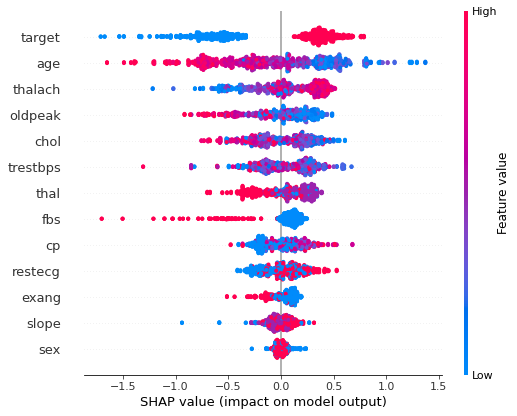

In [38]:
shap.summary_plot(shap_values[0], X)

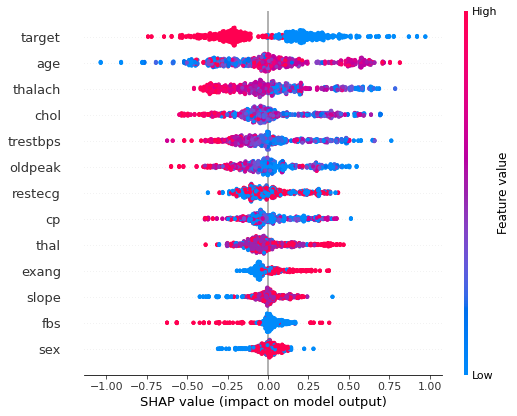

In [39]:
shap.summary_plot(shap_values[1], X)

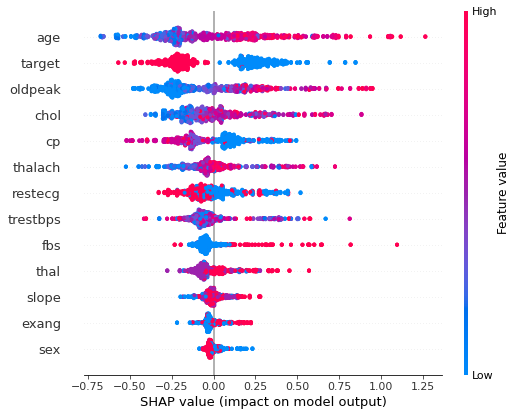

In [40]:
shap.summary_plot(shap_values[2], X)

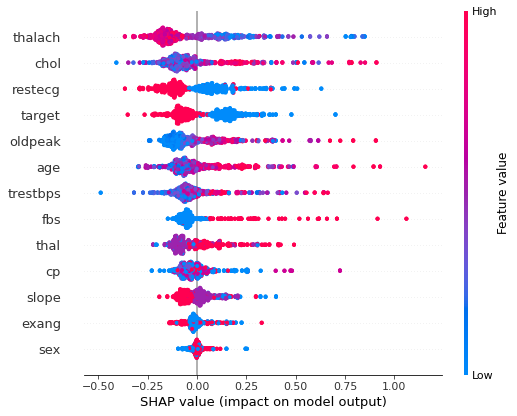

In [41]:
shap.summary_plot(shap_values[3], X)

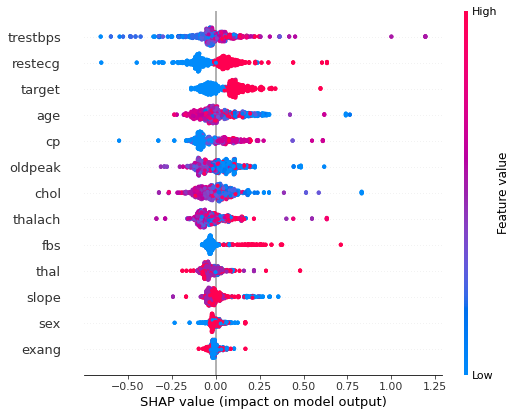

In [42]:
shap.summary_plot(shap_values[4], X)


Confusion matrix:
 [[189   0   0   0   0]
 [  6  79   0   0   0]
 [  7   0  35   0   0]
 [  0   0   0  19   0]
 [  0   0   0   0   4]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       1.00      0.93      0.96        85
           2       1.00      0.83      0.91        42
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         4

    accuracy                           0.96       339
   macro avg       0.99      0.95      0.97       339
weighted avg       0.96      0.96      0.96       339



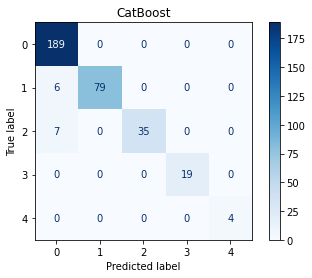

In [10]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',confusion_matrix)
print('\nClassification report:\n',metrics.classification_report(y_test, y_pred))
# plot confusion matrix
disp = metrics.plot_confusion_matrix(model_cb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('CatBoost')
plt.savefig('Confusion Matrix')

In [44]:
accuracy= accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate     #classification error

0.03834808259587019

In [22]:
#tune the hyperparameters
from sklearn.model_selection import GridSearchCV
LR= {'learning_rate': [0.15, 0.1, 0.10, 0.05, 0.2],
     'n_estimators':[100,150,200,250,10, 300]}

tuning = GridSearchCV(estimator = CatBoostClassifier(),
                   param_grid = LR )
                   # scoring = 'F1')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_ 

0:	learn: 1.4664284	total: 2.36ms	remaining: 233ms
1:	learn: 1.3486424	total: 7.74ms	remaining: 379ms
2:	learn: 1.2614090	total: 13.1ms	remaining: 423ms
3:	learn: 1.1866558	total: 18ms	remaining: 433ms
4:	learn: 1.1220624	total: 24.2ms	remaining: 459ms
5:	learn: 1.0708866	total: 30.3ms	remaining: 475ms
6:	learn: 1.0199575	total: 34.4ms	remaining: 457ms
7:	learn: 0.9927363	total: 35.6ms	remaining: 410ms
8:	learn: 0.9611559	total: 39.8ms	remaining: 403ms
9:	learn: 0.9187865	total: 44.7ms	remaining: 402ms
10:	learn: 0.8920479	total: 50.4ms	remaining: 408ms
11:	learn: 0.8711633	total: 57.4ms	remaining: 421ms
12:	learn: 0.8473436	total: 62.5ms	remaining: 418ms
13:	learn: 0.8214272	total: 66.8ms	remaining: 410ms
14:	learn: 0.7963524	total: 71.7ms	remaining: 406ms
15:	learn: 0.7700622	total: 76.6ms	remaining: 402ms
16:	learn: 0.7499428	total: 81.9ms	remaining: 400ms
17:	learn: 0.7292438	total: 87.6ms	remaining: 399ms
18:	learn: 0.7087527	total: 91.4ms	remaining: 390ms
19:	learn: 0.6889402	tot

71:	learn: 0.2935780	total: 341ms	remaining: 133ms
72:	learn: 0.2912229	total: 345ms	remaining: 127ms
73:	learn: 0.2859412	total: 349ms	remaining: 122ms
74:	learn: 0.2831616	total: 352ms	remaining: 117ms
75:	learn: 0.2802099	total: 356ms	remaining: 113ms
76:	learn: 0.2788412	total: 359ms	remaining: 107ms
77:	learn: 0.2775422	total: 363ms	remaining: 102ms
78:	learn: 0.2739940	total: 366ms	remaining: 97.4ms
79:	learn: 0.2705804	total: 370ms	remaining: 92.6ms
80:	learn: 0.2685290	total: 376ms	remaining: 88.2ms
81:	learn: 0.2663805	total: 381ms	remaining: 83.7ms
82:	learn: 0.2623777	total: 385ms	remaining: 78.9ms
83:	learn: 0.2602290	total: 390ms	remaining: 74.2ms
84:	learn: 0.2587130	total: 393ms	remaining: 69.4ms
85:	learn: 0.2571586	total: 397ms	remaining: 64.6ms
86:	learn: 0.2541481	total: 401ms	remaining: 59.9ms
87:	learn: 0.2525225	total: 405ms	remaining: 55.2ms
88:	learn: 0.2494226	total: 408ms	remaining: 50.4ms
89:	learn: 0.2476862	total: 412ms	remaining: 45.7ms
90:	learn: 0.245214

39:	learn: 0.4725922	total: 160ms	remaining: 240ms
40:	learn: 0.4672593	total: 163ms	remaining: 235ms
41:	learn: 0.4618054	total: 167ms	remaining: 230ms
42:	learn: 0.4538500	total: 170ms	remaining: 225ms
43:	learn: 0.4434510	total: 174ms	remaining: 222ms
44:	learn: 0.4355795	total: 178ms	remaining: 217ms
45:	learn: 0.4303034	total: 181ms	remaining: 212ms
46:	learn: 0.4236377	total: 184ms	remaining: 207ms
47:	learn: 0.4140862	total: 188ms	remaining: 204ms
48:	learn: 0.4094235	total: 192ms	remaining: 200ms
49:	learn: 0.4028986	total: 195ms	remaining: 195ms
50:	learn: 0.3966471	total: 199ms	remaining: 191ms
51:	learn: 0.3924117	total: 202ms	remaining: 187ms
52:	learn: 0.3886428	total: 206ms	remaining: 182ms
53:	learn: 0.3828741	total: 209ms	remaining: 178ms
54:	learn: 0.3783242	total: 212ms	remaining: 173ms
55:	learn: 0.3726172	total: 216ms	remaining: 170ms
56:	learn: 0.3662735	total: 220ms	remaining: 166ms
57:	learn: 0.3631342	total: 223ms	remaining: 161ms
58:	learn: 0.3577564	total: 226

17:	learn: 0.7292438	total: 80.3ms	remaining: 589ms
18:	learn: 0.7087527	total: 84.3ms	remaining: 581ms
19:	learn: 0.6889402	total: 90.6ms	remaining: 589ms
20:	learn: 0.6754063	total: 94.7ms	remaining: 582ms
21:	learn: 0.6595281	total: 98.5ms	remaining: 573ms
22:	learn: 0.6419570	total: 103ms	remaining: 570ms
23:	learn: 0.6334694	total: 110ms	remaining: 577ms
24:	learn: 0.6188995	total: 116ms	remaining: 579ms
25:	learn: 0.6026322	total: 121ms	remaining: 576ms
26:	learn: 0.5899403	total: 124ms	remaining: 566ms
27:	learn: 0.5794268	total: 128ms	remaining: 558ms
28:	learn: 0.5689458	total: 134ms	remaining: 559ms
29:	learn: 0.5562955	total: 138ms	remaining: 551ms
30:	learn: 0.5437237	total: 142ms	remaining: 544ms
31:	learn: 0.5344123	total: 146ms	remaining: 537ms
32:	learn: 0.5263370	total: 150ms	remaining: 531ms
33:	learn: 0.5194162	total: 153ms	remaining: 523ms
34:	learn: 0.5130468	total: 156ms	remaining: 514ms
35:	learn: 0.5043689	total: 162ms	remaining: 512ms
36:	learn: 0.4977720	total

39:	learn: 0.4632655	total: 173ms	remaining: 476ms
40:	learn: 0.4567465	total: 178ms	remaining: 473ms
41:	learn: 0.4481805	total: 182ms	remaining: 467ms
42:	learn: 0.4389464	total: 185ms	remaining: 461ms
43:	learn: 0.4316418	total: 190ms	remaining: 457ms
44:	learn: 0.4225755	total: 194ms	remaining: 452ms
45:	learn: 0.4151214	total: 197ms	remaining: 446ms
46:	learn: 0.4094039	total: 201ms	remaining: 440ms
47:	learn: 0.4029698	total: 204ms	remaining: 434ms
48:	learn: 0.3962535	total: 209ms	remaining: 430ms
49:	learn: 0.3882100	total: 214ms	remaining: 429ms
50:	learn: 0.3831789	total: 220ms	remaining: 428ms
51:	learn: 0.3797230	total: 224ms	remaining: 422ms
52:	learn: 0.3735045	total: 227ms	remaining: 416ms
53:	learn: 0.3668027	total: 231ms	remaining: 411ms
54:	learn: 0.3626882	total: 236ms	remaining: 407ms
55:	learn: 0.3585169	total: 240ms	remaining: 402ms
56:	learn: 0.3550605	total: 243ms	remaining: 397ms
57:	learn: 0.3496819	total: 246ms	remaining: 391ms
58:	learn: 0.3469335	total: 250

74:	learn: 0.2925863	total: 332ms	remaining: 332ms
75:	learn: 0.2887272	total: 336ms	remaining: 327ms
76:	learn: 0.2848723	total: 341ms	remaining: 323ms
77:	learn: 0.2817922	total: 348ms	remaining: 321ms
78:	learn: 0.2810091	total: 350ms	remaining: 315ms
79:	learn: 0.2768840	total: 354ms	remaining: 310ms
80:	learn: 0.2726713	total: 358ms	remaining: 305ms
81:	learn: 0.2691316	total: 363ms	remaining: 301ms
82:	learn: 0.2662388	total: 367ms	remaining: 296ms
83:	learn: 0.2613835	total: 370ms	remaining: 291ms
84:	learn: 0.2591136	total: 374ms	remaining: 286ms
85:	learn: 0.2549844	total: 379ms	remaining: 282ms
86:	learn: 0.2520318	total: 382ms	remaining: 277ms
87:	learn: 0.2489683	total: 386ms	remaining: 272ms
88:	learn: 0.2449156	total: 390ms	remaining: 267ms
89:	learn: 0.2418291	total: 394ms	remaining: 262ms
90:	learn: 0.2407114	total: 397ms	remaining: 257ms
91:	learn: 0.2376414	total: 403ms	remaining: 254ms
92:	learn: 0.2340618	total: 409ms	remaining: 251ms
93:	learn: 0.2311977	total: 413

115:	learn: 0.1929426	total: 497ms	remaining: 146ms
116:	learn: 0.1925626	total: 500ms	remaining: 141ms
117:	learn: 0.1913723	total: 503ms	remaining: 136ms
118:	learn: 0.1908163	total: 507ms	remaining: 132ms
119:	learn: 0.1892319	total: 512ms	remaining: 128ms
120:	learn: 0.1865740	total: 515ms	remaining: 123ms
121:	learn: 0.1845958	total: 519ms	remaining: 119ms
122:	learn: 0.1818611	total: 523ms	remaining: 115ms
123:	learn: 0.1806153	total: 527ms	remaining: 111ms
124:	learn: 0.1790426	total: 531ms	remaining: 106ms
125:	learn: 0.1764103	total: 534ms	remaining: 102ms
126:	learn: 0.1749285	total: 539ms	remaining: 97.6ms
127:	learn: 0.1729735	total: 543ms	remaining: 93.3ms
128:	learn: 0.1706075	total: 546ms	remaining: 88.9ms
129:	learn: 0.1693728	total: 550ms	remaining: 84.6ms
130:	learn: 0.1676522	total: 554ms	remaining: 80.3ms
131:	learn: 0.1664101	total: 558ms	remaining: 76ms
132:	learn: 0.1644470	total: 561ms	remaining: 71.7ms
133:	learn: 0.1627407	total: 565ms	remaining: 67.4ms
134:	l

145:	learn: 0.1314801	total: 649ms	remaining: 17.8ms
146:	learn: 0.1308145	total: 654ms	remaining: 13.3ms
147:	learn: 0.1301790	total: 660ms	remaining: 8.92ms
148:	learn: 0.1286498	total: 664ms	remaining: 4.46ms
149:	learn: 0.1273915	total: 668ms	remaining: 0us
0:	learn: 1.4664284	total: 2.1ms	remaining: 418ms
1:	learn: 1.3486424	total: 6.31ms	remaining: 625ms
2:	learn: 1.2614090	total: 10.5ms	remaining: 689ms
3:	learn: 1.1866558	total: 15.7ms	remaining: 767ms
4:	learn: 1.1220624	total: 20.1ms	remaining: 785ms
5:	learn: 1.0708866	total: 24.1ms	remaining: 780ms
6:	learn: 1.0199575	total: 28.6ms	remaining: 788ms
7:	learn: 0.9927363	total: 30.1ms	remaining: 723ms
8:	learn: 0.9611559	total: 34.3ms	remaining: 729ms
9:	learn: 0.9187865	total: 39.7ms	remaining: 755ms
10:	learn: 0.8920479	total: 46.8ms	remaining: 804ms
11:	learn: 0.8711633	total: 51.1ms	remaining: 800ms
12:	learn: 0.8473436	total: 55.3ms	remaining: 795ms
13:	learn: 0.8214272	total: 60.3ms	remaining: 801ms
14:	learn: 0.7963524	

169:	learn: 0.1259440	total: 753ms	remaining: 133ms
170:	learn: 0.1253580	total: 756ms	remaining: 128ms
171:	learn: 0.1245936	total: 761ms	remaining: 124ms
172:	learn: 0.1239020	total: 764ms	remaining: 119ms
173:	learn: 0.1233930	total: 767ms	remaining: 115ms
174:	learn: 0.1225358	total: 771ms	remaining: 110ms
175:	learn: 0.1220168	total: 774ms	remaining: 106ms
176:	learn: 0.1212999	total: 778ms	remaining: 101ms
177:	learn: 0.1203803	total: 781ms	remaining: 96.5ms
178:	learn: 0.1197832	total: 785ms	remaining: 92.1ms
179:	learn: 0.1190918	total: 789ms	remaining: 87.7ms
180:	learn: 0.1179123	total: 793ms	remaining: 83.2ms
181:	learn: 0.1174421	total: 798ms	remaining: 78.9ms
182:	learn: 0.1167877	total: 804ms	remaining: 74.7ms
183:	learn: 0.1157938	total: 808ms	remaining: 70.3ms
184:	learn: 0.1151127	total: 812ms	remaining: 65.8ms
185:	learn: 0.1141023	total: 816ms	remaining: 61.4ms
186:	learn: 0.1133129	total: 820ms	remaining: 57ms
187:	learn: 0.1125570	total: 823ms	remaining: 52.6ms
188

160:	learn: 0.1335616	total: 660ms	remaining: 160ms
161:	learn: 0.1321650	total: 664ms	remaining: 156ms
162:	learn: 0.1310454	total: 668ms	remaining: 152ms
163:	learn: 0.1300697	total: 672ms	remaining: 147ms
164:	learn: 0.1292767	total: 675ms	remaining: 143ms
165:	learn: 0.1283753	total: 679ms	remaining: 139ms
166:	learn: 0.1271342	total: 682ms	remaining: 135ms
167:	learn: 0.1264441	total: 685ms	remaining: 131ms
168:	learn: 0.1254719	total: 689ms	remaining: 126ms
169:	learn: 0.1245811	total: 693ms	remaining: 122ms
170:	learn: 0.1237730	total: 697ms	remaining: 118ms
171:	learn: 0.1230663	total: 700ms	remaining: 114ms
172:	learn: 0.1222717	total: 704ms	remaining: 110ms
173:	learn: 0.1215019	total: 708ms	remaining: 106ms
174:	learn: 0.1211507	total: 711ms	remaining: 102ms
175:	learn: 0.1204876	total: 715ms	remaining: 97.5ms
176:	learn: 0.1197585	total: 719ms	remaining: 93.4ms
177:	learn: 0.1189141	total: 723ms	remaining: 89.3ms
178:	learn: 0.1179787	total: 726ms	remaining: 85.2ms
179:	lea

148:	learn: 0.1361245	total: 607ms	remaining: 208ms
149:	learn: 0.1353961	total: 611ms	remaining: 204ms
150:	learn: 0.1345921	total: 615ms	remaining: 200ms
151:	learn: 0.1335762	total: 620ms	remaining: 196ms
152:	learn: 0.1326803	total: 625ms	remaining: 192ms
153:	learn: 0.1319620	total: 631ms	remaining: 189ms
154:	learn: 0.1312002	total: 636ms	remaining: 185ms
155:	learn: 0.1298165	total: 640ms	remaining: 180ms
156:	learn: 0.1286086	total: 644ms	remaining: 176ms
157:	learn: 0.1277739	total: 649ms	remaining: 172ms
158:	learn: 0.1268590	total: 653ms	remaining: 168ms
159:	learn: 0.1260084	total: 656ms	remaining: 164ms
160:	learn: 0.1247434	total: 662ms	remaining: 160ms
161:	learn: 0.1242727	total: 666ms	remaining: 156ms
162:	learn: 0.1237974	total: 670ms	remaining: 152ms
163:	learn: 0.1229610	total: 674ms	remaining: 148ms
164:	learn: 0.1221247	total: 678ms	remaining: 144ms
165:	learn: 0.1212116	total: 682ms	remaining: 140ms
166:	learn: 0.1199605	total: 686ms	remaining: 136ms
167:	learn: 

130:	learn: 0.1676522	total: 730ms	remaining: 385ms
131:	learn: 0.1664101	total: 734ms	remaining: 378ms
132:	learn: 0.1644470	total: 738ms	remaining: 372ms
133:	learn: 0.1627407	total: 742ms	remaining: 366ms
134:	learn: 0.1620955	total: 747ms	remaining: 360ms
135:	learn: 0.1613664	total: 750ms	remaining: 353ms
136:	learn: 0.1604762	total: 754ms	remaining: 347ms
137:	learn: 0.1580414	total: 758ms	remaining: 341ms
138:	learn: 0.1573560	total: 762ms	remaining: 335ms
139:	learn: 0.1561046	total: 766ms	remaining: 328ms
140:	learn: 0.1552135	total: 770ms	remaining: 322ms
141:	learn: 0.1544102	total: 774ms	remaining: 316ms
142:	learn: 0.1533053	total: 779ms	remaining: 310ms
143:	learn: 0.1523111	total: 784ms	remaining: 305ms
144:	learn: 0.1514535	total: 790ms	remaining: 300ms
145:	learn: 0.1499701	total: 794ms	remaining: 294ms
146:	learn: 0.1488110	total: 798ms	remaining: 288ms
147:	learn: 0.1472845	total: 801ms	remaining: 281ms
148:	learn: 0.1458817	total: 806ms	remaining: 276ms
149:	learn: 

114:	learn: 0.1732220	total: 490ms	remaining: 362ms
115:	learn: 0.1714748	total: 495ms	remaining: 358ms
116:	learn: 0.1702546	total: 500ms	remaining: 355ms
117:	learn: 0.1692247	total: 506ms	remaining: 352ms
118:	learn: 0.1676319	total: 510ms	remaining: 347ms
119:	learn: 0.1646375	total: 514ms	remaining: 343ms
120:	learn: 0.1631478	total: 518ms	remaining: 338ms
121:	learn: 0.1620534	total: 522ms	remaining: 333ms
122:	learn: 0.1604380	total: 526ms	remaining: 329ms
123:	learn: 0.1592915	total: 529ms	remaining: 324ms
124:	learn: 0.1581032	total: 533ms	remaining: 320ms
125:	learn: 0.1567086	total: 537ms	remaining: 315ms
126:	learn: 0.1554960	total: 541ms	remaining: 311ms
127:	learn: 0.1549387	total: 544ms	remaining: 306ms
128:	learn: 0.1530133	total: 548ms	remaining: 302ms
129:	learn: 0.1518251	total: 552ms	remaining: 297ms
130:	learn: 0.1497636	total: 556ms	remaining: 293ms
131:	learn: 0.1484154	total: 562ms	remaining: 289ms
132:	learn: 0.1464469	total: 568ms	remaining: 286ms
133:	learn: 

80:	learn: 0.2697977	total: 270ms	remaining: 563ms
81:	learn: 0.2674351	total: 273ms	remaining: 560ms
82:	learn: 0.2652048	total: 276ms	remaining: 556ms
83:	learn: 0.2604612	total: 280ms	remaining: 552ms
84:	learn: 0.2575146	total: 283ms	remaining: 549ms
85:	learn: 0.2544404	total: 287ms	remaining: 547ms
86:	learn: 0.2534914	total: 290ms	remaining: 543ms
87:	learn: 0.2517951	total: 293ms	remaining: 539ms
88:	learn: 0.2490972	total: 296ms	remaining: 536ms
89:	learn: 0.2474108	total: 299ms	remaining: 532ms
90:	learn: 0.2443207	total: 303ms	remaining: 529ms
91:	learn: 0.2419476	total: 306ms	remaining: 525ms
92:	learn: 0.2400119	total: 309ms	remaining: 521ms
93:	learn: 0.2389519	total: 312ms	remaining: 518ms
94:	learn: 0.2356175	total: 317ms	remaining: 516ms
95:	learn: 0.2335420	total: 320ms	remaining: 513ms
96:	learn: 0.2317770	total: 323ms	remaining: 509ms
97:	learn: 0.2302618	total: 326ms	remaining: 505ms
98:	learn: 0.2280953	total: 330ms	remaining: 503ms
99:	learn: 0.2265330	total: 333

0:	learn: 1.4428040	total: 6.38ms	remaining: 1.59s
1:	learn: 1.3231646	total: 12.3ms	remaining: 1.53s
2:	learn: 1.2366967	total: 16.7ms	remaining: 1.37s
3:	learn: 1.1674305	total: 20.6ms	remaining: 1.27s
4:	learn: 1.1069470	total: 24.4ms	remaining: 1.19s
5:	learn: 1.0520331	total: 28.2ms	remaining: 1.15s
6:	learn: 1.0075371	total: 31.9ms	remaining: 1.11s
7:	learn: 0.9705957	total: 36.1ms	remaining: 1.09s
8:	learn: 0.9271764	total: 40ms	remaining: 1.07s
9:	learn: 0.8916694	total: 43.7ms	remaining: 1.05s
10:	learn: 0.8588838	total: 48.2ms	remaining: 1.05s
11:	learn: 0.8310038	total: 52.8ms	remaining: 1.05s
12:	learn: 0.7987298	total: 57.2ms	remaining: 1.04s
13:	learn: 0.7721720	total: 61ms	remaining: 1.03s
14:	learn: 0.7485802	total: 64.8ms	remaining: 1.01s
15:	learn: 0.7268725	total: 71.2ms	remaining: 1.04s
16:	learn: 0.7044179	total: 77.1ms	remaining: 1.06s
17:	learn: 0.6859642	total: 82.4ms	remaining: 1.06s
18:	learn: 0.6723193	total: 85.9ms	remaining: 1.04s
19:	learn: 0.6564438	total

198:	learn: 0.1033975	total: 821ms	remaining: 210ms
199:	learn: 0.1030390	total: 824ms	remaining: 206ms
200:	learn: 0.1027451	total: 828ms	remaining: 202ms
201:	learn: 0.1024053	total: 831ms	remaining: 198ms
202:	learn: 0.1020473	total: 835ms	remaining: 193ms
203:	learn: 0.1012949	total: 839ms	remaining: 189ms
204:	learn: 0.1009472	total: 843ms	remaining: 185ms
205:	learn: 0.1004459	total: 847ms	remaining: 181ms
206:	learn: 0.0998120	total: 852ms	remaining: 177ms
207:	learn: 0.0992407	total: 858ms	remaining: 173ms
208:	learn: 0.0983938	total: 863ms	remaining: 169ms
209:	learn: 0.0973602	total: 867ms	remaining: 165ms
210:	learn: 0.0969325	total: 871ms	remaining: 161ms
211:	learn: 0.0962600	total: 875ms	remaining: 157ms
212:	learn: 0.0956542	total: 879ms	remaining: 153ms
213:	learn: 0.0951252	total: 882ms	remaining: 148ms
214:	learn: 0.0946238	total: 886ms	remaining: 144ms
215:	learn: 0.0939425	total: 890ms	remaining: 140ms
216:	learn: 0.0935735	total: 895ms	remaining: 136ms
217:	learn: 

114:	learn: 0.1869993	total: 383ms	remaining: 450ms
115:	learn: 0.1864033	total: 387ms	remaining: 447ms
116:	learn: 0.1850413	total: 391ms	remaining: 445ms
117:	learn: 0.1840747	total: 395ms	remaining: 442ms
118:	learn: 0.1819990	total: 399ms	remaining: 439ms
119:	learn: 0.1800930	total: 403ms	remaining: 437ms
120:	learn: 0.1793212	total: 406ms	remaining: 433ms
121:	learn: 0.1768511	total: 411ms	remaining: 431ms
122:	learn: 0.1742989	total: 415ms	remaining: 428ms
123:	learn: 0.1722952	total: 419ms	remaining: 426ms
124:	learn: 0.1696082	total: 423ms	remaining: 423ms
125:	learn: 0.1682380	total: 427ms	remaining: 420ms
126:	learn: 0.1664675	total: 431ms	remaining: 417ms
127:	learn: 0.1642471	total: 435ms	remaining: 415ms
128:	learn: 0.1619825	total: 441ms	remaining: 413ms
129:	learn: 0.1608826	total: 446ms	remaining: 412ms
130:	learn: 0.1596033	total: 451ms	remaining: 409ms
131:	learn: 0.1575619	total: 455ms	remaining: 407ms
132:	learn: 0.1565253	total: 459ms	remaining: 404ms
133:	learn: 

59:	learn: 0.3527852	total: 233ms	remaining: 739ms
60:	learn: 0.3476387	total: 237ms	remaining: 734ms
61:	learn: 0.3447299	total: 241ms	remaining: 730ms
62:	learn: 0.3389415	total: 245ms	remaining: 726ms
63:	learn: 0.3343077	total: 248ms	remaining: 721ms
64:	learn: 0.3307080	total: 252ms	remaining: 717ms
65:	learn: 0.3281511	total: 256ms	remaining: 713ms
66:	learn: 0.3266388	total: 259ms	remaining: 708ms
67:	learn: 0.3215407	total: 263ms	remaining: 704ms
68:	learn: 0.3167621	total: 268ms	remaining: 703ms
69:	learn: 0.3124554	total: 275ms	remaining: 706ms
70:	learn: 0.3070920	total: 279ms	remaining: 702ms
71:	learn: 0.3030681	total: 282ms	remaining: 698ms
72:	learn: 0.2993453	total: 287ms	remaining: 695ms
73:	learn: 0.2976150	total: 290ms	remaining: 691ms
74:	learn: 0.2947512	total: 294ms	remaining: 686ms
75:	learn: 0.2931377	total: 298ms	remaining: 682ms
76:	learn: 0.2877142	total: 302ms	remaining: 678ms
77:	learn: 0.2866608	total: 305ms	remaining: 673ms
78:	learn: 0.2813427	total: 309

222:	learn: 0.0884657	total: 888ms	remaining: 108ms
223:	learn: 0.0874898	total: 895ms	remaining: 104ms
224:	learn: 0.0866968	total: 898ms	remaining: 99.8ms
225:	learn: 0.0862386	total: 902ms	remaining: 95.8ms
226:	learn: 0.0856945	total: 906ms	remaining: 91.8ms
227:	learn: 0.0853324	total: 910ms	remaining: 87.8ms
228:	learn: 0.0847756	total: 914ms	remaining: 83.8ms
229:	learn: 0.0844504	total: 918ms	remaining: 79.8ms
230:	learn: 0.0838062	total: 922ms	remaining: 75.8ms
231:	learn: 0.0830789	total: 926ms	remaining: 71.9ms
232:	learn: 0.0825471	total: 931ms	remaining: 67.9ms
233:	learn: 0.0821019	total: 934ms	remaining: 63.9ms
234:	learn: 0.0816549	total: 939ms	remaining: 59.9ms
235:	learn: 0.0811377	total: 943ms	remaining: 55.9ms
236:	learn: 0.0809306	total: 946ms	remaining: 51.9ms
237:	learn: 0.0807938	total: 952ms	remaining: 48ms
238:	learn: 0.0804520	total: 958ms	remaining: 44.1ms
239:	learn: 0.0799598	total: 961ms	remaining: 40.1ms
240:	learn: 0.0795423	total: 966ms	remaining: 36.1

153:	learn: 0.1246972	total: 651ms	remaining: 406ms
154:	learn: 0.1241181	total: 655ms	remaining: 401ms
155:	learn: 0.1231835	total: 659ms	remaining: 397ms
156:	learn: 0.1225726	total: 662ms	remaining: 392ms
157:	learn: 0.1220558	total: 667ms	remaining: 388ms
158:	learn: 0.1216907	total: 670ms	remaining: 384ms
159:	learn: 0.1205125	total: 674ms	remaining: 379ms
160:	learn: 0.1199590	total: 680ms	remaining: 376ms
161:	learn: 0.1193331	total: 684ms	remaining: 372ms
162:	learn: 0.1182818	total: 688ms	remaining: 367ms
163:	learn: 0.1172701	total: 692ms	remaining: 363ms
164:	learn: 0.1163306	total: 698ms	remaining: 359ms
165:	learn: 0.1155098	total: 702ms	remaining: 355ms
166:	learn: 0.1144833	total: 705ms	remaining: 350ms
167:	learn: 0.1130888	total: 710ms	remaining: 346ms
168:	learn: 0.1120861	total: 714ms	remaining: 342ms
169:	learn: 0.1115592	total: 717ms	remaining: 337ms
170:	learn: 0.1105210	total: 721ms	remaining: 333ms
171:	learn: 0.1101878	total: 724ms	remaining: 329ms
172:	learn: 

39:	learn: 0.4723160	total: 173ms	remaining: 1.12s
40:	learn: 0.4622719	total: 177ms	remaining: 1.12s
41:	learn: 0.4561062	total: 182ms	remaining: 1.12s
42:	learn: 0.4478858	total: 189ms	remaining: 1.13s
43:	learn: 0.4388757	total: 192ms	remaining: 1.12s
44:	learn: 0.4341954	total: 196ms	remaining: 1.11s
45:	learn: 0.4306671	total: 200ms	remaining: 1.1s
46:	learn: 0.4223509	total: 204ms	remaining: 1.1s
47:	learn: 0.4173866	total: 208ms	remaining: 1.09s
48:	learn: 0.4115034	total: 211ms	remaining: 1.08s
49:	learn: 0.4053341	total: 216ms	remaining: 1.08s
50:	learn: 0.3993841	total: 220ms	remaining: 1.07s
51:	learn: 0.3943263	total: 223ms	remaining: 1.06s
52:	learn: 0.3885639	total: 227ms	remaining: 1.06s
53:	learn: 0.3805648	total: 231ms	remaining: 1.05s
54:	learn: 0.3747481	total: 234ms	remaining: 1.04s
55:	learn: 0.3721035	total: 237ms	remaining: 1.03s
56:	learn: 0.3649010	total: 243ms	remaining: 1.04s
57:	learn: 0.3593465	total: 249ms	remaining: 1.04s
58:	learn: 0.3537629	total: 253ms

198:	learn: 0.1047339	total: 827ms	remaining: 420ms
199:	learn: 0.1042087	total: 831ms	remaining: 416ms
200:	learn: 0.1034733	total: 835ms	remaining: 411ms
201:	learn: 0.1029411	total: 839ms	remaining: 407ms
202:	learn: 0.1024926	total: 844ms	remaining: 403ms
203:	learn: 0.1016433	total: 847ms	remaining: 399ms
204:	learn: 0.1007962	total: 852ms	remaining: 395ms
205:	learn: 0.1002033	total: 857ms	remaining: 391ms
206:	learn: 0.0996098	total: 862ms	remaining: 387ms
207:	learn: 0.0993016	total: 867ms	remaining: 383ms
208:	learn: 0.0983257	total: 872ms	remaining: 380ms
209:	learn: 0.0975736	total: 877ms	remaining: 376ms
210:	learn: 0.0969775	total: 884ms	remaining: 373ms
211:	learn: 0.0966653	total: 890ms	remaining: 369ms
212:	learn: 0.0960206	total: 894ms	remaining: 365ms
213:	learn: 0.0956357	total: 898ms	remaining: 361ms
214:	learn: 0.0951136	total: 902ms	remaining: 357ms
215:	learn: 0.0948368	total: 906ms	remaining: 352ms
216:	learn: 0.0943261	total: 910ms	remaining: 348ms
217:	learn: 

80:	learn: 0.2685290	total: 351ms	remaining: 948ms
81:	learn: 0.2663805	total: 354ms	remaining: 942ms
82:	learn: 0.2623777	total: 358ms	remaining: 937ms
83:	learn: 0.2602290	total: 362ms	remaining: 931ms
84:	learn: 0.2587130	total: 365ms	remaining: 924ms
85:	learn: 0.2571586	total: 369ms	remaining: 919ms
86:	learn: 0.2541481	total: 374ms	remaining: 915ms
87:	learn: 0.2525225	total: 378ms	remaining: 910ms
88:	learn: 0.2494226	total: 381ms	remaining: 904ms
89:	learn: 0.2476862	total: 385ms	remaining: 899ms
90:	learn: 0.2452141	total: 390ms	remaining: 895ms
91:	learn: 0.2417984	total: 395ms	remaining: 893ms
92:	learn: 0.2382133	total: 401ms	remaining: 894ms
93:	learn: 0.2363610	total: 407ms	remaining: 891ms
94:	learn: 0.2342782	total: 411ms	remaining: 887ms
95:	learn: 0.2317999	total: 415ms	remaining: 882ms
96:	learn: 0.2284525	total: 420ms	remaining: 880ms
97:	learn: 0.2269864	total: 424ms	remaining: 875ms
98:	learn: 0.2252806	total: 428ms	remaining: 869ms
99:	learn: 0.2220143	total: 434

243:	learn: 0.0819841	total: 999ms	remaining: 229ms
244:	learn: 0.0809688	total: 1s	remaining: 225ms
245:	learn: 0.0808022	total: 1.01s	remaining: 221ms
246:	learn: 0.0804105	total: 1.01s	remaining: 217ms
247:	learn: 0.0802009	total: 1.01s	remaining: 213ms
248:	learn: 0.0798419	total: 1.02s	remaining: 209ms
249:	learn: 0.0796147	total: 1.02s	remaining: 205ms
250:	learn: 0.0792881	total: 1.03s	remaining: 201ms
251:	learn: 0.0789329	total: 1.03s	remaining: 197ms
252:	learn: 0.0784122	total: 1.04s	remaining: 193ms
253:	learn: 0.0779933	total: 1.04s	remaining: 189ms
254:	learn: 0.0774667	total: 1.04s	remaining: 184ms
255:	learn: 0.0771249	total: 1.05s	remaining: 180ms
256:	learn: 0.0770008	total: 1.05s	remaining: 176ms
257:	learn: 0.0767783	total: 1.05s	remaining: 172ms
258:	learn: 0.0763227	total: 1.06s	remaining: 168ms
259:	learn: 0.0756774	total: 1.06s	remaining: 163ms
260:	learn: 0.0753611	total: 1.07s	remaining: 159ms
261:	learn: 0.0753157	total: 1.07s	remaining: 155ms
262:	learn: 0.0

135:	learn: 0.1527935	total: 534ms	remaining: 644ms
136:	learn: 0.1515413	total: 538ms	remaining: 640ms
137:	learn: 0.1503129	total: 541ms	remaining: 635ms
138:	learn: 0.1483891	total: 544ms	remaining: 631ms
139:	learn: 0.1464739	total: 548ms	remaining: 626ms
140:	learn: 0.1454047	total: 552ms	remaining: 622ms
141:	learn: 0.1444307	total: 555ms	remaining: 618ms
142:	learn: 0.1435120	total: 558ms	remaining: 613ms
143:	learn: 0.1421267	total: 562ms	remaining: 609ms
144:	learn: 0.1406499	total: 566ms	remaining: 605ms
145:	learn: 0.1396562	total: 569ms	remaining: 601ms
146:	learn: 0.1388271	total: 572ms	remaining: 596ms
147:	learn: 0.1373385	total: 576ms	remaining: 592ms
148:	learn: 0.1361245	total: 580ms	remaining: 588ms
149:	learn: 0.1353961	total: 583ms	remaining: 583ms
150:	learn: 0.1345921	total: 587ms	remaining: 579ms
151:	learn: 0.1335762	total: 590ms	remaining: 575ms
152:	learn: 0.1326803	total: 594ms	remaining: 571ms
153:	learn: 0.1319620	total: 597ms	remaining: 566ms
154:	learn: 

0:	learn: 1.4667071	total: 2.76ms	remaining: 825ms
1:	learn: 1.3513589	total: 7.33ms	remaining: 1.09s
2:	learn: 1.2714544	total: 12ms	remaining: 1.19s
3:	learn: 1.1980890	total: 17.1ms	remaining: 1.27s
4:	learn: 1.1368269	total: 20.5ms	remaining: 1.21s
5:	learn: 1.0781779	total: 25.3ms	remaining: 1.24s
6:	learn: 1.0345856	total: 30.8ms	remaining: 1.29s
7:	learn: 1.0086324	total: 32.2ms	remaining: 1.18s
8:	learn: 0.9670886	total: 36.3ms	remaining: 1.17s
9:	learn: 0.9312458	total: 40.5ms	remaining: 1.18s
10:	learn: 0.8990711	total: 45.4ms	remaining: 1.19s
11:	learn: 0.8734705	total: 49.7ms	remaining: 1.19s
12:	learn: 0.8437729	total: 53.8ms	remaining: 1.19s
13:	learn: 0.8174107	total: 59.2ms	remaining: 1.21s
14:	learn: 0.7922796	total: 65ms	remaining: 1.24s
15:	learn: 0.7625195	total: 71.1ms	remaining: 1.26s
16:	learn: 0.7398020	total: 76.5ms	remaining: 1.27s
17:	learn: 0.7204709	total: 81ms	remaining: 1.27s
18:	learn: 0.7078192	total: 85.9ms	remaining: 1.27s
19:	learn: 0.6917281	total: 

185:	learn: 0.1110492	total: 817ms	remaining: 501ms
186:	learn: 0.1101094	total: 821ms	remaining: 496ms
187:	learn: 0.1094756	total: 825ms	remaining: 492ms
188:	learn: 0.1081964	total: 830ms	remaining: 487ms
189:	learn: 0.1075141	total: 833ms	remaining: 482ms
190:	learn: 0.1068486	total: 836ms	remaining: 477ms
191:	learn: 0.1060165	total: 841ms	remaining: 473ms
192:	learn: 0.1054615	total: 845ms	remaining: 469ms
193:	learn: 0.1046512	total: 850ms	remaining: 464ms
194:	learn: 0.1039970	total: 854ms	remaining: 460ms
195:	learn: 0.1030943	total: 858ms	remaining: 455ms
196:	learn: 0.1026494	total: 862ms	remaining: 451ms
197:	learn: 0.1020220	total: 866ms	remaining: 446ms
198:	learn: 0.1014175	total: 870ms	remaining: 441ms
199:	learn: 0.1007538	total: 875ms	remaining: 438ms
200:	learn: 0.1006636	total: 879ms	remaining: 433ms
201:	learn: 0.0996646	total: 883ms	remaining: 428ms
202:	learn: 0.0992318	total: 887ms	remaining: 424ms
203:	learn: 0.0984090	total: 890ms	remaining: 419ms
204:	learn: 

82:	learn: 0.2367390	total: 344ms	remaining: 900ms
83:	learn: 0.2325637	total: 348ms	remaining: 894ms
84:	learn: 0.2318658	total: 351ms	remaining: 888ms
85:	learn: 0.2289635	total: 355ms	remaining: 883ms
86:	learn: 0.2247579	total: 359ms	remaining: 878ms
87:	learn: 0.2232253	total: 362ms	remaining: 872ms
88:	learn: 0.2203979	total: 366ms	remaining: 867ms
89:	learn: 0.2184816	total: 370ms	remaining: 863ms
90:	learn: 0.2171940	total: 373ms	remaining: 858ms
91:	learn: 0.2146621	total: 377ms	remaining: 852ms
92:	learn: 0.2137156	total: 381ms	remaining: 849ms
93:	learn: 0.2122567	total: 385ms	remaining: 844ms
94:	learn: 0.2100085	total: 388ms	remaining: 838ms
95:	learn: 0.2071515	total: 392ms	remaining: 833ms
96:	learn: 0.2056713	total: 396ms	remaining: 828ms
97:	learn: 0.2046276	total: 399ms	remaining: 822ms
98:	learn: 0.2028117	total: 402ms	remaining: 817ms
99:	learn: 0.1995391	total: 406ms	remaining: 811ms
100:	learn: 0.1973475	total: 410ms	remaining: 807ms
101:	learn: 0.1966724	total: 4

240:	learn: 0.0752006	total: 990ms	remaining: 242ms
241:	learn: 0.0746890	total: 995ms	remaining: 238ms
242:	learn: 0.0742359	total: 1000ms	remaining: 234ms
243:	learn: 0.0739466	total: 1s	remaining: 230ms
244:	learn: 0.0733019	total: 1.01s	remaining: 226ms
245:	learn: 0.0728381	total: 1.01s	remaining: 222ms
246:	learn: 0.0725834	total: 1.02s	remaining: 218ms
247:	learn: 0.0723459	total: 1.02s	remaining: 214ms
248:	learn: 0.0721681	total: 1.02s	remaining: 210ms
249:	learn: 0.0717897	total: 1.03s	remaining: 206ms
250:	learn: 0.0714587	total: 1.03s	remaining: 202ms
251:	learn: 0.0710676	total: 1.04s	remaining: 198ms
252:	learn: 0.0709427	total: 1.04s	remaining: 194ms
253:	learn: 0.0705028	total: 1.05s	remaining: 190ms
254:	learn: 0.0700118	total: 1.05s	remaining: 186ms
255:	learn: 0.0696087	total: 1.05s	remaining: 181ms
256:	learn: 0.0692975	total: 1.06s	remaining: 177ms
257:	learn: 0.0689065	total: 1.06s	remaining: 173ms
258:	learn: 0.0684641	total: 1.07s	remaining: 169ms
259:	learn: 0.

13:	learn: 0.9155469	total: 51ms	remaining: 314ms
14:	learn: 0.8925774	total: 54.9ms	remaining: 311ms
15:	learn: 0.8724118	total: 58.8ms	remaining: 309ms
16:	learn: 0.8491566	total: 61.9ms	remaining: 302ms
17:	learn: 0.8306050	total: 64.9ms	remaining: 296ms
18:	learn: 0.8121660	total: 68.2ms	remaining: 291ms
19:	learn: 0.7960939	total: 71.9ms	remaining: 288ms
20:	learn: 0.7824307	total: 75.3ms	remaining: 283ms
21:	learn: 0.7683500	total: 78.4ms	remaining: 278ms
22:	learn: 0.7574463	total: 81.7ms	remaining: 273ms
23:	learn: 0.7461780	total: 85.3ms	remaining: 270ms
24:	learn: 0.7325520	total: 88.6ms	remaining: 266ms
25:	learn: 0.7224700	total: 92ms	remaining: 262ms
26:	learn: 0.7124420	total: 94.9ms	remaining: 257ms
27:	learn: 0.7016330	total: 98.6ms	remaining: 253ms
28:	learn: 0.6886836	total: 102ms	remaining: 249ms
29:	learn: 0.6770148	total: 105ms	remaining: 245ms
30:	learn: 0.6682524	total: 108ms	remaining: 240ms
31:	learn: 0.6623533	total: 112ms	remaining: 238ms
32:	learn: 0.6538023

96:	learn: 0.3361493	total: 330ms	remaining: 10.2ms
97:	learn: 0.3346120	total: 333ms	remaining: 6.79ms
98:	learn: 0.3313105	total: 337ms	remaining: 3.41ms
99:	learn: 0.3276436	total: 341ms	remaining: 0us
0:	learn: 1.5116689	total: 1.78ms	remaining: 177ms
1:	learn: 1.4247606	total: 5.78ms	remaining: 283ms
2:	learn: 1.3616464	total: 10.6ms	remaining: 342ms
3:	learn: 1.2989132	total: 14.7ms	remaining: 354ms
4:	learn: 1.2472311	total: 19ms	remaining: 361ms
5:	learn: 1.1978060	total: 22.9ms	remaining: 359ms
6:	learn: 1.1526463	total: 26.5ms	remaining: 352ms
7:	learn: 1.1115380	total: 30.9ms	remaining: 355ms
8:	learn: 1.0739311	total: 34.1ms	remaining: 345ms
9:	learn: 1.0467578	total: 38.2ms	remaining: 344ms
10:	learn: 1.0164682	total: 41.6ms	remaining: 336ms
11:	learn: 0.9850476	total: 44.6ms	remaining: 327ms
12:	learn: 0.9603386	total: 48ms	remaining: 321ms
13:	learn: 0.9406223	total: 51.3ms	remaining: 315ms
14:	learn: 0.9152531	total: 55.3ms	remaining: 313ms
15:	learn: 0.9009241	total: 5

69:	learn: 0.3984944	total: 279ms	remaining: 119ms
70:	learn: 0.3947260	total: 283ms	remaining: 115ms
71:	learn: 0.3903621	total: 286ms	remaining: 111ms
72:	learn: 0.3858163	total: 290ms	remaining: 107ms
73:	learn: 0.3836568	total: 295ms	remaining: 104ms
74:	learn: 0.3810738	total: 301ms	remaining: 100ms
75:	learn: 0.3790979	total: 305ms	remaining: 96.2ms
76:	learn: 0.3750871	total: 309ms	remaining: 92.2ms
77:	learn: 0.3712123	total: 313ms	remaining: 88.2ms
78:	learn: 0.3671524	total: 317ms	remaining: 84.2ms
79:	learn: 0.3620583	total: 321ms	remaining: 80.2ms
80:	learn: 0.3597234	total: 325ms	remaining: 76.4ms
81:	learn: 0.3549743	total: 329ms	remaining: 72.3ms
82:	learn: 0.3510155	total: 333ms	remaining: 68.2ms
83:	learn: 0.3459642	total: 336ms	remaining: 64.1ms
84:	learn: 0.3438560	total: 340ms	remaining: 60.1ms
85:	learn: 0.3405685	total: 344ms	remaining: 56ms
86:	learn: 0.3357883	total: 347ms	remaining: 51.9ms
87:	learn: 0.3310623	total: 351ms	remaining: 47.9ms
88:	learn: 0.3259068

145:	learn: 0.2315739	total: 661ms	remaining: 18.1ms
146:	learn: 0.2296177	total: 665ms	remaining: 13.6ms
147:	learn: 0.2279681	total: 668ms	remaining: 9.03ms
148:	learn: 0.2277576	total: 670ms	remaining: 4.5ms
149:	learn: 0.2271821	total: 674ms	remaining: 0us
0:	learn: 1.4962412	total: 7.16ms	remaining: 1.07s
1:	learn: 1.4054541	total: 11.4ms	remaining: 840ms
2:	learn: 1.3351742	total: 15.5ms	remaining: 761ms
3:	learn: 1.2786616	total: 19.9ms	remaining: 726ms
4:	learn: 1.2282603	total: 23.9ms	remaining: 693ms
5:	learn: 1.1831007	total: 27.3ms	remaining: 656ms
6:	learn: 1.1433607	total: 31ms	remaining: 632ms
7:	learn: 1.1060221	total: 34.1ms	remaining: 605ms
8:	learn: 1.0664281	total: 37.1ms	remaining: 582ms
9:	learn: 1.0305616	total: 40.2ms	remaining: 563ms
10:	learn: 0.9996020	total: 43.7ms	remaining: 553ms
11:	learn: 0.9710310	total: 47.3ms	remaining: 544ms
12:	learn: 0.9407191	total: 50.6ms	remaining: 533ms
13:	learn: 0.9155469	total: 54.9ms	remaining: 534ms
14:	learn: 0.8925774	to

39:	learn: 0.6019475	total: 194ms	remaining: 533ms
40:	learn: 0.5968943	total: 198ms	remaining: 525ms
41:	learn: 0.5879020	total: 202ms	remaining: 519ms
42:	learn: 0.5789124	total: 205ms	remaining: 511ms
43:	learn: 0.5701726	total: 209ms	remaining: 503ms
44:	learn: 0.5635172	total: 212ms	remaining: 495ms
45:	learn: 0.5581380	total: 216ms	remaining: 489ms
46:	learn: 0.5521389	total: 220ms	remaining: 482ms
47:	learn: 0.5450503	total: 224ms	remaining: 475ms
48:	learn: 0.5387597	total: 229ms	remaining: 472ms
49:	learn: 0.5330389	total: 235ms	remaining: 470ms
50:	learn: 0.5288917	total: 239ms	remaining: 463ms
51:	learn: 0.5220678	total: 242ms	remaining: 457ms
52:	learn: 0.5153774	total: 246ms	remaining: 450ms
53:	learn: 0.5099092	total: 250ms	remaining: 444ms
54:	learn: 0.5033373	total: 253ms	remaining: 437ms
55:	learn: 0.4986673	total: 257ms	remaining: 431ms
56:	learn: 0.4952827	total: 260ms	remaining: 425ms
57:	learn: 0.4897616	total: 264ms	remaining: 418ms
58:	learn: 0.4846964	total: 267

75:	learn: 0.4079506	total: 336ms	remaining: 327ms
76:	learn: 0.4037587	total: 340ms	remaining: 322ms
77:	learn: 0.3997596	total: 343ms	remaining: 317ms
78:	learn: 0.3973680	total: 347ms	remaining: 312ms
79:	learn: 0.3932651	total: 353ms	remaining: 308ms
80:	learn: 0.3883042	total: 358ms	remaining: 305ms
81:	learn: 0.3865151	total: 362ms	remaining: 300ms
82:	learn: 0.3810119	total: 366ms	remaining: 295ms
83:	learn: 0.3783482	total: 369ms	remaining: 290ms
84:	learn: 0.3738314	total: 373ms	remaining: 285ms
85:	learn: 0.3710691	total: 377ms	remaining: 280ms
86:	learn: 0.3658311	total: 380ms	remaining: 275ms
87:	learn: 0.3623984	total: 384ms	remaining: 270ms
88:	learn: 0.3581466	total: 388ms	remaining: 266ms
89:	learn: 0.3537459	total: 392ms	remaining: 261ms
90:	learn: 0.3527024	total: 395ms	remaining: 256ms
91:	learn: 0.3479964	total: 399ms	remaining: 251ms
92:	learn: 0.3435788	total: 403ms	remaining: 247ms
93:	learn: 0.3390274	total: 407ms	remaining: 242ms
94:	learn: 0.3359787	total: 410

119:	learn: 0.2487648	total: 487ms	remaining: 122ms
120:	learn: 0.2466946	total: 491ms	remaining: 118ms
121:	learn: 0.2437920	total: 495ms	remaining: 114ms
122:	learn: 0.2416869	total: 499ms	remaining: 110ms
123:	learn: 0.2403328	total: 503ms	remaining: 105ms
124:	learn: 0.2372291	total: 507ms	remaining: 101ms
125:	learn: 0.2357233	total: 511ms	remaining: 97.3ms
126:	learn: 0.2344104	total: 515ms	remaining: 93.3ms
127:	learn: 0.2322220	total: 519ms	remaining: 89.2ms
128:	learn: 0.2303111	total: 523ms	remaining: 85.1ms
129:	learn: 0.2281876	total: 527ms	remaining: 81.1ms
130:	learn: 0.2270086	total: 531ms	remaining: 77ms
131:	learn: 0.2242892	total: 534ms	remaining: 72.8ms
132:	learn: 0.2232275	total: 539ms	remaining: 68.9ms
133:	learn: 0.2229201	total: 541ms	remaining: 64.6ms
134:	learn: 0.2202035	total: 545ms	remaining: 60.5ms
135:	learn: 0.2187714	total: 549ms	remaining: 56.6ms
136:	learn: 0.2165442	total: 553ms	remaining: 52.5ms
137:	learn: 0.2155041	total: 557ms	remaining: 48.4ms
1

148:	learn: 0.2277576	total: 662ms	remaining: 227ms
149:	learn: 0.2271821	total: 668ms	remaining: 223ms
150:	learn: 0.2253551	total: 672ms	remaining: 218ms
151:	learn: 0.2228010	total: 677ms	remaining: 214ms
152:	learn: 0.2209376	total: 682ms	remaining: 209ms
153:	learn: 0.2189586	total: 686ms	remaining: 205ms
154:	learn: 0.2181670	total: 690ms	remaining: 200ms
155:	learn: 0.2164089	total: 694ms	remaining: 196ms
156:	learn: 0.2142185	total: 699ms	remaining: 191ms
157:	learn: 0.2130349	total: 702ms	remaining: 187ms
158:	learn: 0.2109723	total: 706ms	remaining: 182ms
159:	learn: 0.2103582	total: 710ms	remaining: 178ms
160:	learn: 0.2084625	total: 715ms	remaining: 173ms
161:	learn: 0.2080697	total: 719ms	remaining: 169ms
162:	learn: 0.2075895	total: 721ms	remaining: 164ms
163:	learn: 0.2068762	total: 725ms	remaining: 159ms
164:	learn: 0.2056265	total: 729ms	remaining: 155ms
165:	learn: 0.2052029	total: 732ms	remaining: 150ms
166:	learn: 0.2034324	total: 736ms	remaining: 145ms
167:	learn: 

125:	learn: 0.2729634	total: 525ms	remaining: 308ms
126:	learn: 0.2714862	total: 528ms	remaining: 303ms
127:	learn: 0.2688475	total: 531ms	remaining: 298ms
128:	learn: 0.2673456	total: 534ms	remaining: 294ms
129:	learn: 0.2659718	total: 537ms	remaining: 289ms
130:	learn: 0.2655199	total: 539ms	remaining: 284ms
131:	learn: 0.2640897	total: 543ms	remaining: 280ms
132:	learn: 0.2609639	total: 546ms	remaining: 275ms
133:	learn: 0.2581364	total: 549ms	remaining: 270ms
134:	learn: 0.2555856	total: 552ms	remaining: 266ms
135:	learn: 0.2537608	total: 555ms	remaining: 261ms
136:	learn: 0.2520754	total: 558ms	remaining: 257ms
137:	learn: 0.2504226	total: 562ms	remaining: 252ms
138:	learn: 0.2478188	total: 565ms	remaining: 248ms
139:	learn: 0.2461867	total: 568ms	remaining: 243ms
140:	learn: 0.2451123	total: 571ms	remaining: 239ms
141:	learn: 0.2427464	total: 574ms	remaining: 235ms
142:	learn: 0.2397757	total: 578ms	remaining: 230ms
143:	learn: 0.2388188	total: 582ms	remaining: 226ms
144:	learn: 

96:	learn: 0.3361493	total: 345ms	remaining: 367ms
97:	learn: 0.3346120	total: 348ms	remaining: 362ms
98:	learn: 0.3313105	total: 351ms	remaining: 358ms
99:	learn: 0.3276436	total: 355ms	remaining: 355ms
100:	learn: 0.3256432	total: 358ms	remaining: 351ms
101:	learn: 0.3238356	total: 361ms	remaining: 347ms
102:	learn: 0.3209012	total: 364ms	remaining: 343ms
103:	learn: 0.3183685	total: 367ms	remaining: 339ms
104:	learn: 0.3143784	total: 370ms	remaining: 335ms
105:	learn: 0.3102312	total: 374ms	remaining: 331ms
106:	learn: 0.3076685	total: 377ms	remaining: 327ms
107:	learn: 0.3056657	total: 380ms	remaining: 323ms
108:	learn: 0.3030668	total: 383ms	remaining: 320ms
109:	learn: 0.3020170	total: 386ms	remaining: 316ms
110:	learn: 0.2989865	total: 389ms	remaining: 312ms
111:	learn: 0.2966713	total: 392ms	remaining: 308ms
112:	learn: 0.2943399	total: 395ms	remaining: 304ms
113:	learn: 0.2931402	total: 398ms	remaining: 301ms
114:	learn: 0.2911433	total: 403ms	remaining: 298ms
115:	learn: 0.28

63:	learn: 0.4564523	total: 252ms	remaining: 536ms
64:	learn: 0.4510753	total: 256ms	remaining: 532ms
65:	learn: 0.4460180	total: 260ms	remaining: 529ms
66:	learn: 0.4400145	total: 265ms	remaining: 525ms
67:	learn: 0.4374992	total: 269ms	remaining: 523ms
68:	learn: 0.4354189	total: 274ms	remaining: 520ms
69:	learn: 0.4310514	total: 279ms	remaining: 518ms
70:	learn: 0.4292330	total: 283ms	remaining: 514ms
71:	learn: 0.4226734	total: 287ms	remaining: 510ms
72:	learn: 0.4185656	total: 291ms	remaining: 505ms
73:	learn: 0.4143931	total: 294ms	remaining: 501ms
74:	learn: 0.4108979	total: 298ms	remaining: 497ms
75:	learn: 0.4079506	total: 303ms	remaining: 495ms
76:	learn: 0.4037587	total: 308ms	remaining: 493ms
77:	learn: 0.3997596	total: 320ms	remaining: 500ms
78:	learn: 0.3973680	total: 327ms	remaining: 500ms
79:	learn: 0.3932651	total: 332ms	remaining: 497ms
80:	learn: 0.3883042	total: 337ms	remaining: 495ms
81:	learn: 0.3865151	total: 341ms	remaining: 491ms
82:	learn: 0.3810119	total: 346

44:	learn: 0.5290502	total: 197ms	remaining: 680ms
45:	learn: 0.5221227	total: 201ms	remaining: 673ms
46:	learn: 0.5167709	total: 205ms	remaining: 667ms
47:	learn: 0.5095873	total: 209ms	remaining: 663ms
48:	learn: 0.5063792	total: 212ms	remaining: 653ms
49:	learn: 0.4995696	total: 215ms	remaining: 646ms
50:	learn: 0.4928553	total: 219ms	remaining: 640ms
51:	learn: 0.4882352	total: 223ms	remaining: 634ms
52:	learn: 0.4828657	total: 227ms	remaining: 629ms
53:	learn: 0.4766133	total: 230ms	remaining: 622ms
54:	learn: 0.4712216	total: 234ms	remaining: 617ms
55:	learn: 0.4654141	total: 238ms	remaining: 613ms
56:	learn: 0.4586628	total: 242ms	remaining: 607ms
57:	learn: 0.4515785	total: 245ms	remaining: 601ms
58:	learn: 0.4475303	total: 249ms	remaining: 595ms
59:	learn: 0.4434181	total: 253ms	remaining: 590ms
60:	learn: 0.4395383	total: 257ms	remaining: 585ms
61:	learn: 0.4353804	total: 260ms	remaining: 579ms
62:	learn: 0.4325244	total: 264ms	remaining: 573ms
63:	learn: 0.4276549	total: 268

41:	learn: 0.5835476	total: 173ms	remaining: 858ms
42:	learn: 0.5767335	total: 177ms	remaining: 852ms
43:	learn: 0.5697047	total: 181ms	remaining: 849ms
44:	learn: 0.5621872	total: 185ms	remaining: 843ms
45:	learn: 0.5572433	total: 189ms	remaining: 837ms
46:	learn: 0.5498697	total: 192ms	remaining: 830ms
47:	learn: 0.5421660	total: 196ms	remaining: 824ms
48:	learn: 0.5337986	total: 200ms	remaining: 820ms
49:	learn: 0.5269878	total: 204ms	remaining: 815ms
50:	learn: 0.5211336	total: 208ms	remaining: 811ms
51:	learn: 0.5175738	total: 211ms	remaining: 805ms
52:	learn: 0.5141147	total: 217ms	remaining: 807ms
53:	learn: 0.5068708	total: 223ms	remaining: 810ms
54:	learn: 0.5031327	total: 227ms	remaining: 804ms
55:	learn: 0.4976486	total: 230ms	remaining: 797ms
56:	learn: 0.4899178	total: 234ms	remaining: 791ms
57:	learn: 0.4836671	total: 238ms	remaining: 787ms
58:	learn: 0.4768543	total: 241ms	remaining: 782ms
59:	learn: 0.4706597	total: 246ms	remaining: 777ms
60:	learn: 0.4632349	total: 249

216:	learn: 0.1536537	total: 828ms	remaining: 126ms
217:	learn: 0.1527878	total: 832ms	remaining: 122ms
218:	learn: 0.1520507	total: 835ms	remaining: 118ms
219:	learn: 0.1515713	total: 838ms	remaining: 114ms
220:	learn: 0.1507901	total: 841ms	remaining: 110ms
221:	learn: 0.1499411	total: 845ms	remaining: 107ms
222:	learn: 0.1492545	total: 849ms	remaining: 103ms
223:	learn: 0.1486168	total: 853ms	remaining: 99.1ms
224:	learn: 0.1480449	total: 859ms	remaining: 95.4ms
225:	learn: 0.1474982	total: 863ms	remaining: 91.6ms
226:	learn: 0.1471291	total: 866ms	remaining: 87.7ms
227:	learn: 0.1464485	total: 869ms	remaining: 83.9ms
228:	learn: 0.1458450	total: 873ms	remaining: 80ms
229:	learn: 0.1444804	total: 876ms	remaining: 76.2ms
230:	learn: 0.1433828	total: 880ms	remaining: 72.4ms
231:	learn: 0.1424491	total: 883ms	remaining: 68.5ms
232:	learn: 0.1420987	total: 887ms	remaining: 64.7ms
233:	learn: 0.1417675	total: 891ms	remaining: 60.9ms
234:	learn: 0.1409097	total: 895ms	remaining: 57.1ms
23

126:	learn: 0.2714862	total: 504ms	remaining: 488ms
127:	learn: 0.2688475	total: 508ms	remaining: 484ms
128:	learn: 0.2673456	total: 512ms	remaining: 480ms
129:	learn: 0.2659718	total: 516ms	remaining: 476ms
130:	learn: 0.2655199	total: 518ms	remaining: 470ms
131:	learn: 0.2640897	total: 523ms	remaining: 468ms
132:	learn: 0.2609639	total: 529ms	remaining: 465ms
133:	learn: 0.2581364	total: 532ms	remaining: 461ms
134:	learn: 0.2555856	total: 536ms	remaining: 456ms
135:	learn: 0.2537608	total: 539ms	remaining: 452ms
136:	learn: 0.2520754	total: 543ms	remaining: 448ms
137:	learn: 0.2504226	total: 546ms	remaining: 443ms
138:	learn: 0.2478188	total: 549ms	remaining: 438ms
139:	learn: 0.2461867	total: 553ms	remaining: 434ms
140:	learn: 0.2451123	total: 556ms	remaining: 430ms
141:	learn: 0.2427464	total: 559ms	remaining: 425ms
142:	learn: 0.2397757	total: 563ms	remaining: 421ms
143:	learn: 0.2388188	total: 566ms	remaining: 417ms
144:	learn: 0.2371462	total: 570ms	remaining: 412ms
145:	learn: 

39:	learn: 0.6019475	total: 172ms	remaining: 903ms
40:	learn: 0.5968943	total: 177ms	remaining: 901ms
41:	learn: 0.5879020	total: 180ms	remaining: 894ms
42:	learn: 0.5789124	total: 185ms	remaining: 889ms
43:	learn: 0.5701726	total: 188ms	remaining: 881ms
44:	learn: 0.5635172	total: 193ms	remaining: 878ms
45:	learn: 0.5581380	total: 196ms	remaining: 871ms
46:	learn: 0.5521389	total: 200ms	remaining: 866ms
47:	learn: 0.5450503	total: 207ms	remaining: 869ms
48:	learn: 0.5387597	total: 213ms	remaining: 874ms
49:	learn: 0.5330389	total: 217ms	remaining: 869ms
50:	learn: 0.5288917	total: 222ms	remaining: 865ms
51:	learn: 0.5220678	total: 226ms	remaining: 859ms
52:	learn: 0.5153774	total: 229ms	remaining: 852ms
53:	learn: 0.5099092	total: 233ms	remaining: 847ms
54:	learn: 0.5033373	total: 238ms	remaining: 842ms
55:	learn: 0.4986673	total: 241ms	remaining: 835ms
56:	learn: 0.4952827	total: 245ms	remaining: 830ms
57:	learn: 0.4897616	total: 249ms	remaining: 825ms
58:	learn: 0.4846964	total: 253

209:	learn: 0.1570560	total: 824ms	remaining: 157ms
210:	learn: 0.1563617	total: 827ms	remaining: 153ms
211:	learn: 0.1555475	total: 831ms	remaining: 149ms
212:	learn: 0.1549031	total: 834ms	remaining: 145ms
213:	learn: 0.1541223	total: 837ms	remaining: 141ms
214:	learn: 0.1531081	total: 841ms	remaining: 137ms
215:	learn: 0.1521211	total: 844ms	remaining: 133ms
216:	learn: 0.1508256	total: 848ms	remaining: 129ms
217:	learn: 0.1500300	total: 851ms	remaining: 125ms
218:	learn: 0.1488902	total: 854ms	remaining: 121ms
219:	learn: 0.1481025	total: 858ms	remaining: 117ms
220:	learn: 0.1474803	total: 861ms	remaining: 113ms
221:	learn: 0.1466550	total: 864ms	remaining: 109ms
222:	learn: 0.1464687	total: 866ms	remaining: 105ms
223:	learn: 0.1462173	total: 869ms	remaining: 101ms
224:	learn: 0.1457432	total: 873ms	remaining: 97ms
225:	learn: 0.1451669	total: 876ms	remaining: 93.1ms
226:	learn: 0.1447578	total: 880ms	remaining: 89.2ms
227:	learn: 0.1437678	total: 884ms	remaining: 85.3ms
228:	learn

142:	learn: 0.2313092	total: 499ms	remaining: 373ms
143:	learn: 0.2300414	total: 502ms	remaining: 369ms
144:	learn: 0.2282557	total: 504ms	remaining: 365ms
145:	learn: 0.2265832	total: 507ms	remaining: 361ms
146:	learn: 0.2251468	total: 511ms	remaining: 358ms
147:	learn: 0.2236608	total: 514ms	remaining: 354ms
148:	learn: 0.2212270	total: 517ms	remaining: 351ms
149:	learn: 0.2187512	total: 520ms	remaining: 347ms
150:	learn: 0.2179370	total: 523ms	remaining: 343ms
151:	learn: 0.2162607	total: 526ms	remaining: 339ms
152:	learn: 0.2146315	total: 529ms	remaining: 335ms
153:	learn: 0.2125388	total: 532ms	remaining: 331ms
154:	learn: 0.2115584	total: 534ms	remaining: 327ms
155:	learn: 0.2111749	total: 537ms	remaining: 324ms
156:	learn: 0.2097865	total: 540ms	remaining: 320ms
157:	learn: 0.2086605	total: 543ms	remaining: 316ms
158:	learn: 0.2080478	total: 547ms	remaining: 313ms
159:	learn: 0.2073754	total: 551ms	remaining: 310ms
160:	learn: 0.2054029	total: 554ms	remaining: 306ms
161:	learn: 

84:	learn: 0.3438560	total: 407ms	remaining: 790ms
85:	learn: 0.3405685	total: 411ms	remaining: 784ms
86:	learn: 0.3357883	total: 416ms	remaining: 780ms
87:	learn: 0.3310623	total: 425ms	remaining: 782ms
88:	learn: 0.3259068	total: 429ms	remaining: 776ms
89:	learn: 0.3230233	total: 433ms	remaining: 770ms
90:	learn: 0.3185742	total: 438ms	remaining: 765ms
91:	learn: 0.3144484	total: 442ms	remaining: 759ms
92:	learn: 0.3108815	total: 447ms	remaining: 755ms
93:	learn: 0.3086570	total: 453ms	remaining: 752ms
94:	learn: 0.3071502	total: 457ms	remaining: 746ms
95:	learn: 0.3041291	total: 463ms	remaining: 743ms
96:	learn: 0.3003866	total: 467ms	remaining: 736ms
97:	learn: 0.2993827	total: 471ms	remaining: 731ms
98:	learn: 0.2965077	total: 476ms	remaining: 726ms
99:	learn: 0.2947451	total: 481ms	remaining: 722ms
100:	learn: 0.2910542	total: 485ms	remaining: 716ms
101:	learn: 0.2882095	total: 489ms	remaining: 710ms
102:	learn: 0.2858030	total: 493ms	remaining: 703ms
103:	learn: 0.2842722	total:

0:	learn: 1.4962412	total: 5.3ms	remaining: 47.7ms
1:	learn: 1.4054541	total: 9.26ms	remaining: 37ms
2:	learn: 1.3351742	total: 12.4ms	remaining: 29ms
3:	learn: 1.2786616	total: 16.1ms	remaining: 24.2ms
4:	learn: 1.2282603	total: 19.6ms	remaining: 19.6ms
5:	learn: 1.1831007	total: 22.8ms	remaining: 15.2ms
6:	learn: 1.1433607	total: 26ms	remaining: 11.2ms
7:	learn: 1.1060221	total: 29.6ms	remaining: 7.4ms
8:	learn: 1.0664281	total: 33.2ms	remaining: 3.69ms
9:	learn: 1.0305616	total: 36.4ms	remaining: 0us
0:	learn: 1.5078929	total: 2.18ms	remaining: 19.6ms
1:	learn: 1.4276207	total: 5.73ms	remaining: 22.9ms
2:	learn: 1.3607106	total: 9.29ms	remaining: 21.7ms
3:	learn: 1.2980203	total: 13.2ms	remaining: 19.8ms
4:	learn: 1.2454883	total: 17.3ms	remaining: 17.3ms
5:	learn: 1.1935300	total: 22.2ms	remaining: 14.8ms
6:	learn: 1.1530588	total: 25.8ms	remaining: 11.1ms
7:	learn: 1.1179038	total: 29.9ms	remaining: 7.49ms
8:	learn: 1.0859841	total: 33.4ms	remaining: 3.71ms
9:	learn: 1.0567394	tot

138:	learn: 0.2413292	total: 533ms	remaining: 618ms
139:	learn: 0.2401058	total: 538ms	remaining: 615ms
140:	learn: 0.2380097	total: 544ms	remaining: 614ms
141:	learn: 0.2361775	total: 547ms	remaining: 609ms
142:	learn: 0.2345933	total: 551ms	remaining: 605ms
143:	learn: 0.2337102	total: 554ms	remaining: 601ms
144:	learn: 0.2325832	total: 558ms	remaining: 596ms
145:	learn: 0.2315739	total: 561ms	remaining: 592ms
146:	learn: 0.2296177	total: 565ms	remaining: 588ms
147:	learn: 0.2279681	total: 568ms	remaining: 584ms
148:	learn: 0.2277576	total: 570ms	remaining: 578ms
149:	learn: 0.2271821	total: 574ms	remaining: 574ms
150:	learn: 0.2253551	total: 577ms	remaining: 569ms
151:	learn: 0.2228010	total: 580ms	remaining: 565ms
152:	learn: 0.2209376	total: 584ms	remaining: 561ms
153:	learn: 0.2189586	total: 587ms	remaining: 557ms
154:	learn: 0.2181670	total: 592ms	remaining: 554ms
155:	learn: 0.2164089	total: 598ms	remaining: 552ms
156:	learn: 0.2142185	total: 602ms	remaining: 548ms
157:	learn: 

1:	learn: 1.4054541	total: 15.2ms	remaining: 2.26s
2:	learn: 1.3351742	total: 19.5ms	remaining: 1.94s
3:	learn: 1.2786616	total: 23.6ms	remaining: 1.74s
4:	learn: 1.2282603	total: 28.3ms	remaining: 1.67s
5:	learn: 1.1831007	total: 32.1ms	remaining: 1.57s
6:	learn: 1.1433607	total: 35.7ms	remaining: 1.49s
7:	learn: 1.1060221	total: 39.7ms	remaining: 1.45s
8:	learn: 1.0664281	total: 43.8ms	remaining: 1.41s
9:	learn: 1.0305616	total: 47.9ms	remaining: 1.39s
10:	learn: 0.9996020	total: 51.9ms	remaining: 1.36s
11:	learn: 0.9710310	total: 56.5ms	remaining: 1.35s
12:	learn: 0.9407191	total: 60.7ms	remaining: 1.34s
13:	learn: 0.9155469	total: 64.7ms	remaining: 1.32s
14:	learn: 0.8925774	total: 68.4ms	remaining: 1.3s
15:	learn: 0.8724118	total: 74.3ms	remaining: 1.32s
16:	learn: 0.8491566	total: 80ms	remaining: 1.33s
17:	learn: 0.8306050	total: 84.1ms	remaining: 1.32s
18:	learn: 0.8121660	total: 88ms	remaining: 1.3s
19:	learn: 0.7960939	total: 91.9ms	remaining: 1.29s
20:	learn: 0.7824307	total:

170:	learn: 0.2012843	total: 693ms	remaining: 523ms
171:	learn: 0.1998418	total: 696ms	remaining: 518ms
172:	learn: 0.1979932	total: 701ms	remaining: 514ms
173:	learn: 0.1962638	total: 704ms	remaining: 510ms
174:	learn: 0.1946477	total: 708ms	remaining: 506ms
175:	learn: 0.1935440	total: 711ms	remaining: 501ms
176:	learn: 0.1927001	total: 715ms	remaining: 497ms
177:	learn: 0.1915816	total: 719ms	remaining: 493ms
178:	learn: 0.1912019	total: 722ms	remaining: 488ms
179:	learn: 0.1900293	total: 728ms	remaining: 485ms
180:	learn: 0.1886742	total: 734ms	remaining: 482ms
181:	learn: 0.1875741	total: 738ms	remaining: 478ms
182:	learn: 0.1869827	total: 741ms	remaining: 474ms
183:	learn: 0.1858803	total: 746ms	remaining: 470ms
184:	learn: 0.1849456	total: 749ms	remaining: 466ms
185:	learn: 0.1835755	total: 753ms	remaining: 461ms
186:	learn: 0.1827710	total: 756ms	remaining: 457ms
187:	learn: 0.1823472	total: 760ms	remaining: 453ms
188:	learn: 0.1816566	total: 763ms	remaining: 448ms
189:	learn: 

37:	learn: 0.6210303	total: 168ms	remaining: 1.16s
38:	learn: 0.6121987	total: 172ms	remaining: 1.15s
39:	learn: 0.6019475	total: 176ms	remaining: 1.14s
40:	learn: 0.5968943	total: 180ms	remaining: 1.14s
41:	learn: 0.5879020	total: 184ms	remaining: 1.13s
42:	learn: 0.5789124	total: 188ms	remaining: 1.12s
43:	learn: 0.5701726	total: 192ms	remaining: 1.11s
44:	learn: 0.5635172	total: 196ms	remaining: 1.11s
45:	learn: 0.5581380	total: 199ms	remaining: 1.1s
46:	learn: 0.5521389	total: 203ms	remaining: 1.09s
47:	learn: 0.5450503	total: 207ms	remaining: 1.09s
48:	learn: 0.5387597	total: 212ms	remaining: 1.08s
49:	learn: 0.5330389	total: 216ms	remaining: 1.08s
50:	learn: 0.5288917	total: 220ms	remaining: 1.08s
51:	learn: 0.5220678	total: 225ms	remaining: 1.07s
52:	learn: 0.5153774	total: 229ms	remaining: 1.07s
53:	learn: 0.5099092	total: 233ms	remaining: 1.06s
54:	learn: 0.5033373	total: 237ms	remaining: 1.05s
55:	learn: 0.4986673	total: 241ms	remaining: 1.05s
56:	learn: 0.4952827	total: 244m

198:	learn: 0.1663379	total: 830ms	remaining: 421ms
199:	learn: 0.1651758	total: 833ms	remaining: 417ms
200:	learn: 0.1646426	total: 838ms	remaining: 413ms
201:	learn: 0.1635256	total: 841ms	remaining: 408ms
202:	learn: 0.1630251	total: 845ms	remaining: 404ms
203:	learn: 0.1619776	total: 849ms	remaining: 399ms
204:	learn: 0.1613962	total: 853ms	remaining: 395ms
205:	learn: 0.1605723	total: 856ms	remaining: 391ms
206:	learn: 0.1598208	total: 860ms	remaining: 386ms
207:	learn: 0.1594078	total: 863ms	remaining: 382ms
208:	learn: 0.1584560	total: 867ms	remaining: 378ms
209:	learn: 0.1570560	total: 871ms	remaining: 373ms
210:	learn: 0.1563617	total: 874ms	remaining: 369ms
211:	learn: 0.1555475	total: 880ms	remaining: 365ms
212:	learn: 0.1549031	total: 885ms	remaining: 361ms
213:	learn: 0.1541223	total: 888ms	remaining: 357ms
214:	learn: 0.1531081	total: 892ms	remaining: 353ms
215:	learn: 0.1521211	total: 896ms	remaining: 349ms
216:	learn: 0.1508256	total: 900ms	remaining: 344ms
217:	learn: 

94:	learn: 0.3359787	total: 397ms	remaining: 858ms
95:	learn: 0.3344925	total: 401ms	remaining: 853ms
96:	learn: 0.3324134	total: 405ms	remaining: 848ms
97:	learn: 0.3301923	total: 409ms	remaining: 842ms
98:	learn: 0.3259766	total: 412ms	remaining: 837ms
99:	learn: 0.3242381	total: 416ms	remaining: 831ms
100:	learn: 0.3228623	total: 419ms	remaining: 826ms
101:	learn: 0.3199509	total: 423ms	remaining: 821ms
102:	learn: 0.3173894	total: 426ms	remaining: 815ms
103:	learn: 0.3152837	total: 430ms	remaining: 810ms
104:	learn: 0.3117211	total: 435ms	remaining: 808ms
105:	learn: 0.3092567	total: 441ms	remaining: 807ms
106:	learn: 0.3071433	total: 445ms	remaining: 802ms
107:	learn: 0.3048015	total: 448ms	remaining: 797ms
108:	learn: 0.3034466	total: 451ms	remaining: 790ms
109:	learn: 0.3001251	total: 454ms	remaining: 784ms
110:	learn: 0.2989462	total: 457ms	remaining: 779ms
111:	learn: 0.2957879	total: 461ms	remaining: 774ms
112:	learn: 0.2930492	total: 464ms	remaining: 769ms
113:	learn: 0.2897

292:	learn: 0.1018076	total: 1.21s	remaining: 29ms
293:	learn: 0.1015956	total: 1.22s	remaining: 24.9ms
294:	learn: 0.1010731	total: 1.22s	remaining: 20.7ms
295:	learn: 0.1006041	total: 1.23s	remaining: 16.6ms
296:	learn: 0.1002234	total: 1.23s	remaining: 12.4ms
297:	learn: 0.0998206	total: 1.23s	remaining: 8.27ms
298:	learn: 0.0993371	total: 1.24s	remaining: 4.13ms
299:	learn: 0.0989470	total: 1.24s	remaining: 0us
0:	learn: 1.5067028	total: 2.48ms	remaining: 743ms
1:	learn: 1.4112299	total: 7.13ms	remaining: 1.06s
2:	learn: 1.3447460	total: 11.8ms	remaining: 1.17s
3:	learn: 1.2804262	total: 14.5ms	remaining: 1.07s
4:	learn: 1.2285236	total: 18ms	remaining: 1.06s
5:	learn: 1.1788743	total: 21.9ms	remaining: 1.07s
6:	learn: 1.1302244	total: 25.7ms	remaining: 1.08s
7:	learn: 1.0879328	total: 29.2ms	remaining: 1.06s
8:	learn: 1.0466251	total: 32.6ms	remaining: 1.05s
9:	learn: 1.0144168	total: 36.4ms	remaining: 1.05s
10:	learn: 0.9831275	total: 40.2ms	remaining: 1.05s
11:	learn: 0.9561435	

170:	learn: 0.1734309	total: 738ms	remaining: 557ms
171:	learn: 0.1720703	total: 743ms	remaining: 553ms
172:	learn: 0.1716522	total: 746ms	remaining: 548ms
173:	learn: 0.1707436	total: 751ms	remaining: 544ms
174:	learn: 0.1700280	total: 755ms	remaining: 539ms
175:	learn: 0.1686310	total: 758ms	remaining: 534ms
176:	learn: 0.1666862	total: 762ms	remaining: 530ms
177:	learn: 0.1662977	total: 766ms	remaining: 525ms
178:	learn: 0.1654197	total: 770ms	remaining: 521ms
179:	learn: 0.1642063	total: 776ms	remaining: 517ms
180:	learn: 0.1628623	total: 783ms	remaining: 515ms
181:	learn: 0.1613820	total: 787ms	remaining: 510ms
182:	learn: 0.1611188	total: 791ms	remaining: 505ms
183:	learn: 0.1604041	total: 795ms	remaining: 501ms
184:	learn: 0.1593862	total: 799ms	remaining: 497ms
185:	learn: 0.1583072	total: 803ms	remaining: 492ms
186:	learn: 0.1574004	total: 807ms	remaining: 488ms
187:	learn: 0.1564498	total: 811ms	remaining: 483ms
188:	learn: 0.1562070	total: 816ms	remaining: 479ms
189:	learn: 

48:	learn: 0.5337986	total: 195ms	remaining: 203ms
49:	learn: 0.5269878	total: 200ms	remaining: 200ms
50:	learn: 0.5211336	total: 206ms	remaining: 198ms
51:	learn: 0.5175738	total: 211ms	remaining: 194ms
52:	learn: 0.5141147	total: 214ms	remaining: 190ms
53:	learn: 0.5068708	total: 219ms	remaining: 187ms
54:	learn: 0.5031327	total: 224ms	remaining: 183ms
55:	learn: 0.4976486	total: 228ms	remaining: 179ms
56:	learn: 0.4899178	total: 231ms	remaining: 174ms
57:	learn: 0.4836671	total: 234ms	remaining: 170ms
58:	learn: 0.4768543	total: 238ms	remaining: 165ms
59:	learn: 0.4706597	total: 241ms	remaining: 161ms
60:	learn: 0.4632349	total: 245ms	remaining: 156ms
61:	learn: 0.4592367	total: 248ms	remaining: 152ms
62:	learn: 0.4554174	total: 251ms	remaining: 148ms
63:	learn: 0.4503632	total: 255ms	remaining: 143ms
64:	learn: 0.4453106	total: 258ms	remaining: 139ms
65:	learn: 0.4417119	total: 261ms	remaining: 135ms
66:	learn: 0.4383725	total: 264ms	remaining: 130ms
67:	learn: 0.4325867	total: 267

20:	learn: 0.8263597	total: 72.4ms	remaining: 273ms
21:	learn: 0.8090600	total: 75.7ms	remaining: 268ms
22:	learn: 0.7907522	total: 79.2ms	remaining: 265ms
23:	learn: 0.7763276	total: 82.7ms	remaining: 262ms
24:	learn: 0.7648222	total: 86ms	remaining: 258ms
25:	learn: 0.7514731	total: 89.5ms	remaining: 255ms
26:	learn: 0.7381227	total: 92.9ms	remaining: 251ms
27:	learn: 0.7284086	total: 96.1ms	remaining: 247ms
28:	learn: 0.7172482	total: 99.4ms	remaining: 243ms
29:	learn: 0.7027266	total: 103ms	remaining: 240ms
30:	learn: 0.6912794	total: 106ms	remaining: 235ms
31:	learn: 0.6764920	total: 109ms	remaining: 232ms
32:	learn: 0.6661619	total: 113ms	remaining: 229ms
33:	learn: 0.6517088	total: 116ms	remaining: 226ms
34:	learn: 0.6413562	total: 120ms	remaining: 222ms
35:	learn: 0.6341517	total: 124ms	remaining: 220ms
36:	learn: 0.6267050	total: 127ms	remaining: 217ms
37:	learn: 0.6210303	total: 132ms	remaining: 215ms
38:	learn: 0.6121987	total: 136ms	remaining: 212ms
39:	learn: 0.6019475	tot

82:	learn: 0.3810119	total: 354ms	remaining: 72.5ms
83:	learn: 0.3783482	total: 360ms	remaining: 68.6ms
84:	learn: 0.3738314	total: 364ms	remaining: 64.2ms
85:	learn: 0.3710691	total: 367ms	remaining: 59.8ms
86:	learn: 0.3658311	total: 371ms	remaining: 55.4ms
87:	learn: 0.3623984	total: 374ms	remaining: 51ms
88:	learn: 0.3581466	total: 378ms	remaining: 46.7ms
89:	learn: 0.3537459	total: 382ms	remaining: 42.4ms
90:	learn: 0.3527024	total: 385ms	remaining: 38.1ms
91:	learn: 0.3479964	total: 389ms	remaining: 33.8ms
92:	learn: 0.3435788	total: 392ms	remaining: 29.5ms
93:	learn: 0.3390274	total: 396ms	remaining: 25.2ms
94:	learn: 0.3359787	total: 399ms	remaining: 21ms
95:	learn: 0.3344925	total: 403ms	remaining: 16.8ms
96:	learn: 0.3324134	total: 406ms	remaining: 12.6ms
97:	learn: 0.3301923	total: 412ms	remaining: 8.4ms
98:	learn: 0.3259766	total: 418ms	remaining: 4.22ms
99:	learn: 0.3242381	total: 422ms	remaining: 0us
0:	learn: 1.5067028	total: 1.68ms	remaining: 166ms
1:	learn: 1.4112299	t

79:	learn: 0.3837289	total: 336ms	remaining: 294ms
80:	learn: 0.3789730	total: 340ms	remaining: 290ms
81:	learn: 0.3759211	total: 343ms	remaining: 285ms
82:	learn: 0.3713704	total: 347ms	remaining: 280ms
83:	learn: 0.3678346	total: 351ms	remaining: 276ms
84:	learn: 0.3647400	total: 356ms	remaining: 272ms
85:	learn: 0.3610627	total: 362ms	remaining: 269ms
86:	learn: 0.3565316	total: 367ms	remaining: 266ms
87:	learn: 0.3539166	total: 371ms	remaining: 261ms
88:	learn: 0.3521847	total: 375ms	remaining: 257ms
89:	learn: 0.3494142	total: 379ms	remaining: 253ms
90:	learn: 0.3447036	total: 383ms	remaining: 248ms
91:	learn: 0.3406130	total: 387ms	remaining: 244ms
92:	learn: 0.3383632	total: 390ms	remaining: 239ms
93:	learn: 0.3368368	total: 394ms	remaining: 235ms
94:	learn: 0.3332215	total: 398ms	remaining: 231ms
95:	learn: 0.3310001	total: 402ms	remaining: 226ms
96:	learn: 0.3286456	total: 406ms	remaining: 222ms
97:	learn: 0.3268416	total: 409ms	remaining: 217ms
98:	learn: 0.3243589	total: 413

119:	learn: 0.2851804	total: 503ms	remaining: 126ms
120:	learn: 0.2830045	total: 507ms	remaining: 122ms
121:	learn: 0.2811325	total: 511ms	remaining: 117ms
122:	learn: 0.2781781	total: 514ms	remaining: 113ms
123:	learn: 0.2769628	total: 518ms	remaining: 109ms
124:	learn: 0.2743785	total: 522ms	remaining: 104ms
125:	learn: 0.2729634	total: 525ms	remaining: 100ms
126:	learn: 0.2714862	total: 529ms	remaining: 95.8ms
127:	learn: 0.2688475	total: 532ms	remaining: 91.5ms
128:	learn: 0.2673456	total: 536ms	remaining: 87.3ms
129:	learn: 0.2659718	total: 540ms	remaining: 83ms
130:	learn: 0.2655199	total: 542ms	remaining: 78.6ms
131:	learn: 0.2640897	total: 545ms	remaining: 74.3ms
132:	learn: 0.2609639	total: 549ms	remaining: 70.2ms
133:	learn: 0.2581364	total: 553ms	remaining: 66ms
134:	learn: 0.2555856	total: 556ms	remaining: 61.8ms
135:	learn: 0.2537608	total: 559ms	remaining: 57.6ms
136:	learn: 0.2520754	total: 563ms	remaining: 53.4ms
137:	learn: 0.2504226	total: 566ms	remaining: 49.3ms
138:

0:	learn: 1.5116689	total: 1.83ms	remaining: 273ms
1:	learn: 1.4247606	total: 6.23ms	remaining: 461ms
2:	learn: 1.3616464	total: 12.1ms	remaining: 591ms
3:	learn: 1.2989132	total: 17.6ms	remaining: 643ms
4:	learn: 1.2472311	total: 23.4ms	remaining: 678ms
5:	learn: 1.1978060	total: 27.8ms	remaining: 668ms
6:	learn: 1.1526463	total: 33.5ms	remaining: 685ms
7:	learn: 1.1115380	total: 37.6ms	remaining: 668ms
8:	learn: 1.0739311	total: 41.6ms	remaining: 652ms
9:	learn: 1.0467578	total: 45.5ms	remaining: 636ms
10:	learn: 1.0164682	total: 49.1ms	remaining: 621ms
11:	learn: 0.9850476	total: 52.7ms	remaining: 606ms
12:	learn: 0.9603386	total: 56.8ms	remaining: 598ms
13:	learn: 0.9406223	total: 60.5ms	remaining: 588ms
14:	learn: 0.9152531	total: 64.2ms	remaining: 578ms
15:	learn: 0.9009241	total: 67.9ms	remaining: 568ms
16:	learn: 0.8816452	total: 72.1ms	remaining: 564ms
17:	learn: 0.8665442	total: 75.9ms	remaining: 556ms
18:	learn: 0.8473149	total: 81.8ms	remaining: 564ms
19:	learn: 0.8308687	t

36:	learn: 0.5883362	total: 168ms	remaining: 513ms
37:	learn: 0.5810180	total: 172ms	remaining: 507ms
38:	learn: 0.5726963	total: 176ms	remaining: 502ms
39:	learn: 0.5655225	total: 181ms	remaining: 497ms
40:	learn: 0.5573256	total: 185ms	remaining: 492ms
41:	learn: 0.5515209	total: 189ms	remaining: 486ms
42:	learn: 0.5460428	total: 193ms	remaining: 481ms
43:	learn: 0.5369945	total: 197ms	remaining: 475ms
44:	learn: 0.5290502	total: 201ms	remaining: 470ms
45:	learn: 0.5221227	total: 206ms	remaining: 465ms
46:	learn: 0.5167709	total: 210ms	remaining: 460ms
47:	learn: 0.5095873	total: 214ms	remaining: 454ms
48:	learn: 0.5063792	total: 217ms	remaining: 448ms
49:	learn: 0.4995696	total: 222ms	remaining: 444ms
50:	learn: 0.4928553	total: 226ms	remaining: 439ms
51:	learn: 0.4882352	total: 230ms	remaining: 434ms
52:	learn: 0.4828657	total: 234ms	remaining: 429ms
53:	learn: 0.4766133	total: 239ms	remaining: 424ms
54:	learn: 0.4712216	total: 243ms	remaining: 419ms
55:	learn: 0.4654141	total: 247

58:	learn: 0.4768543	total: 251ms	remaining: 601ms
59:	learn: 0.4706597	total: 256ms	remaining: 597ms
60:	learn: 0.4632349	total: 259ms	remaining: 591ms
61:	learn: 0.4592367	total: 263ms	remaining: 586ms
62:	learn: 0.4554174	total: 267ms	remaining: 581ms
63:	learn: 0.4503632	total: 271ms	remaining: 577ms
64:	learn: 0.4453106	total: 275ms	remaining: 571ms
65:	learn: 0.4417119	total: 279ms	remaining: 566ms
66:	learn: 0.4383725	total: 284ms	remaining: 563ms
67:	learn: 0.4325867	total: 288ms	remaining: 559ms
68:	learn: 0.4273800	total: 292ms	remaining: 555ms
69:	learn: 0.4258704	total: 297ms	remaining: 551ms
70:	learn: 0.4212870	total: 302ms	remaining: 548ms
71:	learn: 0.4168043	total: 305ms	remaining: 543ms
72:	learn: 0.4124790	total: 309ms	remaining: 537ms
73:	learn: 0.4088153	total: 314ms	remaining: 534ms
74:	learn: 0.4044930	total: 318ms	remaining: 529ms
75:	learn: 0.4015728	total: 322ms	remaining: 525ms
76:	learn: 0.3957223	total: 326ms	remaining: 521ms
77:	learn: 0.3908419	total: 332

48:	learn: 0.5323171	total: 205ms	remaining: 631ms
49:	learn: 0.5259311	total: 208ms	remaining: 625ms
50:	learn: 0.5205801	total: 212ms	remaining: 620ms
51:	learn: 0.5137618	total: 216ms	remaining: 613ms
52:	learn: 0.5099801	total: 220ms	remaining: 609ms
53:	learn: 0.5030479	total: 224ms	remaining: 605ms
54:	learn: 0.4968616	total: 227ms	remaining: 599ms
55:	learn: 0.4910646	total: 231ms	remaining: 594ms
56:	learn: 0.4883362	total: 235ms	remaining: 590ms
57:	learn: 0.4831597	total: 240ms	remaining: 588ms
58:	learn: 0.4780694	total: 247ms	remaining: 589ms
59:	learn: 0.4729320	total: 251ms	remaining: 585ms
60:	learn: 0.4686056	total: 254ms	remaining: 580ms
61:	learn: 0.4629558	total: 258ms	remaining: 574ms
62:	learn: 0.4610961	total: 262ms	remaining: 570ms
63:	learn: 0.4543814	total: 266ms	remaining: 565ms
64:	learn: 0.4524883	total: 270ms	remaining: 560ms
65:	learn: 0.4473638	total: 273ms	remaining: 555ms
66:	learn: 0.4409764	total: 277ms	remaining: 550ms
67:	learn: 0.4352436	total: 280

39:	learn: 0.6019475	total: 172ms	remaining: 686ms
40:	learn: 0.5968943	total: 175ms	remaining: 679ms
41:	learn: 0.5879020	total: 179ms	remaining: 673ms
42:	learn: 0.5789124	total: 183ms	remaining: 669ms
43:	learn: 0.5701726	total: 187ms	remaining: 663ms
44:	learn: 0.5635172	total: 191ms	remaining: 657ms
45:	learn: 0.5581380	total: 195ms	remaining: 652ms
46:	learn: 0.5521389	total: 200ms	remaining: 649ms
47:	learn: 0.5450503	total: 204ms	remaining: 645ms
48:	learn: 0.5387597	total: 208ms	remaining: 641ms
49:	learn: 0.5330389	total: 213ms	remaining: 640ms
50:	learn: 0.5288917	total: 218ms	remaining: 635ms
51:	learn: 0.5220678	total: 221ms	remaining: 630ms
52:	learn: 0.5153774	total: 226ms	remaining: 626ms
53:	learn: 0.5099092	total: 230ms	remaining: 621ms
54:	learn: 0.5033373	total: 234ms	remaining: 616ms
55:	learn: 0.4986673	total: 238ms	remaining: 612ms
56:	learn: 0.4952827	total: 242ms	remaining: 607ms
57:	learn: 0.4897616	total: 246ms	remaining: 601ms
58:	learn: 0.4846964	total: 249

7:	learn: 1.1115380	total: 34.6ms	remaining: 832ms
8:	learn: 1.0739311	total: 39ms	remaining: 828ms
9:	learn: 1.0467578	total: 45.1ms	remaining: 857ms
10:	learn: 1.0164682	total: 51.1ms	remaining: 879ms
11:	learn: 0.9850476	total: 55.9ms	remaining: 875ms
12:	learn: 0.9603386	total: 60.2ms	remaining: 866ms
13:	learn: 0.9406223	total: 64.5ms	remaining: 858ms
14:	learn: 0.9152531	total: 68.9ms	remaining: 849ms
15:	learn: 0.9009241	total: 73.9ms	remaining: 850ms
16:	learn: 0.8816452	total: 78.5ms	remaining: 845ms
17:	learn: 0.8665442	total: 82.9ms	remaining: 838ms
18:	learn: 0.8473149	total: 90.9ms	remaining: 866ms
19:	learn: 0.8308687	total: 96ms	remaining: 864ms
20:	learn: 0.8123649	total: 104ms	remaining: 884ms
21:	learn: 0.7946511	total: 112ms	remaining: 905ms
22:	learn: 0.7780964	total: 119ms	remaining: 913ms
23:	learn: 0.7624684	total: 124ms	remaining: 909ms
24:	learn: 0.7497246	total: 131ms	remaining: 920ms
25:	learn: 0.7370229	total: 138ms	remaining: 925ms
26:	learn: 0.7239825	tota

0:	learn: 1.5067028	total: 1.82ms	remaining: 362ms
1:	learn: 1.4112299	total: 6.61ms	remaining: 654ms
2:	learn: 1.3447460	total: 14.2ms	remaining: 931ms
3:	learn: 1.2804262	total: 17.6ms	remaining: 861ms
4:	learn: 1.2285236	total: 23.9ms	remaining: 933ms
5:	learn: 1.1788743	total: 28ms	remaining: 905ms
6:	learn: 1.1302244	total: 32.2ms	remaining: 889ms
7:	learn: 1.0879328	total: 36.7ms	remaining: 882ms
8:	learn: 1.0466251	total: 40.8ms	remaining: 865ms
9:	learn: 1.0144168	total: 44.8ms	remaining: 851ms
10:	learn: 0.9831275	total: 48.7ms	remaining: 837ms
11:	learn: 0.9561435	total: 52.6ms	remaining: 825ms
12:	learn: 0.9308968	total: 56.3ms	remaining: 810ms
13:	learn: 0.9084503	total: 59.9ms	remaining: 796ms
14:	learn: 0.8871404	total: 63.8ms	remaining: 786ms
15:	learn: 0.8645721	total: 68ms	remaining: 782ms
16:	learn: 0.8427298	total: 71.7ms	remaining: 772ms
17:	learn: 0.8242439	total: 75.6ms	remaining: 765ms
18:	learn: 0.8069350	total: 79.7ms	remaining: 759ms
19:	learn: 0.7889755	total

161:	learn: 0.1826053	total: 639ms	remaining: 150ms
162:	learn: 0.1809094	total: 643ms	remaining: 146ms
163:	learn: 0.1798621	total: 646ms	remaining: 142ms
164:	learn: 0.1781757	total: 650ms	remaining: 138ms
165:	learn: 0.1769483	total: 653ms	remaining: 134ms
166:	learn: 0.1764937	total: 657ms	remaining: 130ms
167:	learn: 0.1754199	total: 661ms	remaining: 126ms
168:	learn: 0.1746522	total: 664ms	remaining: 122ms
169:	learn: 0.1742948	total: 668ms	remaining: 118ms
170:	learn: 0.1734309	total: 672ms	remaining: 114ms
171:	learn: 0.1720703	total: 675ms	remaining: 110ms
172:	learn: 0.1716522	total: 680ms	remaining: 106ms
173:	learn: 0.1707436	total: 685ms	remaining: 102ms
174:	learn: 0.1700280	total: 689ms	remaining: 98.4ms
175:	learn: 0.1686310	total: 693ms	remaining: 94.5ms
176:	learn: 0.1666862	total: 697ms	remaining: 90.6ms
177:	learn: 0.1662977	total: 701ms	remaining: 86.7ms
178:	learn: 0.1654197	total: 705ms	remaining: 82.7ms
179:	learn: 0.1642063	total: 709ms	remaining: 78.8ms
180:	l

139:	learn: 0.2401058	total: 596ms	remaining: 468ms
140:	learn: 0.2380097	total: 599ms	remaining: 463ms
141:	learn: 0.2361775	total: 602ms	remaining: 458ms
142:	learn: 0.2345933	total: 605ms	remaining: 453ms
143:	learn: 0.2337102	total: 609ms	remaining: 448ms
144:	learn: 0.2325832	total: 612ms	remaining: 444ms
145:	learn: 0.2315739	total: 615ms	remaining: 438ms
146:	learn: 0.2296177	total: 619ms	remaining: 434ms
147:	learn: 0.2279681	total: 622ms	remaining: 429ms
148:	learn: 0.2277576	total: 624ms	remaining: 423ms
149:	learn: 0.2271821	total: 628ms	remaining: 419ms
150:	learn: 0.2253551	total: 632ms	remaining: 414ms
151:	learn: 0.2228010	total: 635ms	remaining: 409ms
152:	learn: 0.2209376	total: 638ms	remaining: 404ms
153:	learn: 0.2189586	total: 641ms	remaining: 400ms
154:	learn: 0.2181670	total: 645ms	remaining: 395ms
155:	learn: 0.2164089	total: 648ms	remaining: 390ms
156:	learn: 0.2142185	total: 651ms	remaining: 386ms
157:	learn: 0.2130349	total: 654ms	remaining: 381ms
158:	learn: 

65:	learn: 0.4473638	total: 216ms	remaining: 603ms
66:	learn: 0.4409764	total: 219ms	remaining: 599ms
67:	learn: 0.4352436	total: 222ms	remaining: 595ms
68:	learn: 0.4307720	total: 225ms	remaining: 591ms
69:	learn: 0.4264497	total: 228ms	remaining: 587ms
70:	learn: 0.4245726	total: 231ms	remaining: 583ms
71:	learn: 0.4209621	total: 234ms	remaining: 579ms
72:	learn: 0.4182944	total: 238ms	remaining: 576ms
73:	learn: 0.4124647	total: 241ms	remaining: 573ms
74:	learn: 0.4071593	total: 244ms	remaining: 569ms
75:	learn: 0.4038729	total: 247ms	remaining: 567ms
76:	learn: 0.4006623	total: 251ms	remaining: 564ms
77:	learn: 0.3984808	total: 254ms	remaining: 561ms
78:	learn: 0.3948565	total: 257ms	remaining: 557ms
79:	learn: 0.3903193	total: 261ms	remaining: 554ms
80:	learn: 0.3876303	total: 264ms	remaining: 550ms
81:	learn: 0.3834474	total: 267ms	remaining: 547ms
82:	learn: 0.3805910	total: 270ms	remaining: 544ms
83:	learn: 0.3781055	total: 273ms	remaining: 540ms
84:	learn: 0.3747478	total: 277

240:	learn: 0.1366695	total: 871ms	remaining: 32.5ms
241:	learn: 0.1358779	total: 875ms	remaining: 28.9ms
242:	learn: 0.1351328	total: 878ms	remaining: 25.3ms
243:	learn: 0.1347771	total: 882ms	remaining: 21.7ms
244:	learn: 0.1340365	total: 885ms	remaining: 18.1ms
245:	learn: 0.1330240	total: 889ms	remaining: 14.4ms
246:	learn: 0.1318955	total: 892ms	remaining: 10.8ms
247:	learn: 0.1308896	total: 895ms	remaining: 7.22ms
248:	learn: 0.1302784	total: 899ms	remaining: 3.61ms
249:	learn: 0.1299556	total: 902ms	remaining: 0us
0:	learn: 1.5078929	total: 2.96ms	remaining: 738ms
1:	learn: 1.4276207	total: 6.78ms	remaining: 841ms
2:	learn: 1.3607106	total: 12.8ms	remaining: 1.06s
3:	learn: 1.2980203	total: 18.9ms	remaining: 1.16s
4:	learn: 1.2454883	total: 24.8ms	remaining: 1.21s
5:	learn: 1.1935300	total: 29.7ms	remaining: 1.21s
6:	learn: 1.1530588	total: 33.7ms	remaining: 1.17s
7:	learn: 1.1179038	total: 38.1ms	remaining: 1.15s
8:	learn: 1.0859841	total: 42.3ms	remaining: 1.13s
9:	learn: 1.05

190:	learn: 0.1753896	total: 753ms	remaining: 233ms
191:	learn: 0.1742161	total: 757ms	remaining: 229ms
192:	learn: 0.1728893	total: 760ms	remaining: 225ms
193:	learn: 0.1717901	total: 764ms	remaining: 221ms
194:	learn: 0.1709346	total: 767ms	remaining: 216ms
195:	learn: 0.1696538	total: 771ms	remaining: 212ms
196:	learn: 0.1683193	total: 774ms	remaining: 208ms
197:	learn: 0.1670556	total: 778ms	remaining: 204ms
198:	learn: 0.1663379	total: 781ms	remaining: 200ms
199:	learn: 0.1651758	total: 785ms	remaining: 196ms
200:	learn: 0.1646426	total: 788ms	remaining: 192ms
201:	learn: 0.1635256	total: 792ms	remaining: 188ms
202:	learn: 0.1630251	total: 796ms	remaining: 184ms
203:	learn: 0.1619776	total: 799ms	remaining: 180ms
204:	learn: 0.1613962	total: 803ms	remaining: 176ms
205:	learn: 0.1605723	total: 807ms	remaining: 172ms
206:	learn: 0.1598208	total: 812ms	remaining: 169ms
207:	learn: 0.1594078	total: 815ms	remaining: 165ms
208:	learn: 0.1584560	total: 818ms	remaining: 161ms
209:	learn: 

135:	learn: 0.2448866	total: 558ms	remaining: 468ms
136:	learn: 0.2423738	total: 562ms	remaining: 463ms
137:	learn: 0.2410159	total: 566ms	remaining: 459ms
138:	learn: 0.2376888	total: 569ms	remaining: 454ms
139:	learn: 0.2362628	total: 572ms	remaining: 450ms
140:	learn: 0.2340656	total: 576ms	remaining: 445ms
141:	learn: 0.2325093	total: 580ms	remaining: 441ms
142:	learn: 0.2313092	total: 583ms	remaining: 436ms
143:	learn: 0.2300414	total: 586ms	remaining: 432ms
144:	learn: 0.2282557	total: 590ms	remaining: 427ms
145:	learn: 0.2265832	total: 594ms	remaining: 423ms
146:	learn: 0.2251468	total: 598ms	remaining: 419ms
147:	learn: 0.2236608	total: 603ms	remaining: 415ms
148:	learn: 0.2212270	total: 609ms	remaining: 413ms
149:	learn: 0.2187512	total: 614ms	remaining: 410ms
150:	learn: 0.2179370	total: 618ms	remaining: 405ms
151:	learn: 0.2162607	total: 622ms	remaining: 401ms
152:	learn: 0.2146315	total: 625ms	remaining: 396ms
153:	learn: 0.2125388	total: 629ms	remaining: 392ms
154:	learn: 

54:	learn: 0.4712216	total: 167ms	remaining: 591ms
55:	learn: 0.4654141	total: 170ms	remaining: 588ms
56:	learn: 0.4586628	total: 173ms	remaining: 585ms
57:	learn: 0.4515785	total: 176ms	remaining: 581ms
58:	learn: 0.4475303	total: 179ms	remaining: 578ms
59:	learn: 0.4434181	total: 181ms	remaining: 575ms
60:	learn: 0.4395383	total: 184ms	remaining: 571ms
61:	learn: 0.4353804	total: 188ms	remaining: 569ms
62:	learn: 0.4325244	total: 190ms	remaining: 565ms
63:	learn: 0.4276549	total: 193ms	remaining: 561ms
64:	learn: 0.4237041	total: 196ms	remaining: 558ms
65:	learn: 0.4173518	total: 199ms	remaining: 555ms
66:	learn: 0.4164109	total: 200ms	remaining: 547ms
67:	learn: 0.4094534	total: 203ms	remaining: 544ms
68:	learn: 0.4038513	total: 206ms	remaining: 541ms
69:	learn: 0.3984944	total: 209ms	remaining: 537ms
70:	learn: 0.3947260	total: 212ms	remaining: 534ms
71:	learn: 0.3903621	total: 215ms	remaining: 531ms
72:	learn: 0.3858163	total: 218ms	remaining: 528ms
73:	learn: 0.3836568	total: 221

0:	learn: 1.5115001	total: 2.4ms	remaining: 21.6ms
1:	learn: 1.4213234	total: 7.31ms	remaining: 29.2ms
2:	learn: 1.3505863	total: 11.7ms	remaining: 27.4ms
3:	learn: 1.2916803	total: 16.3ms	remaining: 24.4ms
4:	learn: 1.2355614	total: 20.7ms	remaining: 20.7ms
5:	learn: 1.1899435	total: 24.6ms	remaining: 16.4ms
6:	learn: 1.1498536	total: 28.9ms	remaining: 12.4ms
7:	learn: 1.1209168	total: 30.3ms	remaining: 7.58ms
8:	learn: 1.0847247	total: 34.4ms	remaining: 3.82ms
9:	learn: 1.0467854	total: 40.4ms	remaining: 0us
0:	learn: 1.4962412	total: 6.2ms	remaining: 55.8ms
1:	learn: 1.4054541	total: 10.5ms	remaining: 42ms
2:	learn: 1.3351742	total: 14.8ms	remaining: 34.6ms
3:	learn: 1.2786616	total: 18.8ms	remaining: 28.2ms
4:	learn: 1.2282603	total: 22.1ms	remaining: 22.1ms
5:	learn: 1.1831007	total: 26.5ms	remaining: 17.7ms
6:	learn: 1.1433607	total: 32.5ms	remaining: 13.9ms
7:	learn: 1.1060221	total: 38.6ms	remaining: 9.66ms
8:	learn: 1.0664281	total: 43.9ms	remaining: 4.88ms
9:	learn: 1.0305616

151:	learn: 0.2228010	total: 590ms	remaining: 574ms
152:	learn: 0.2209376	total: 593ms	remaining: 570ms
153:	learn: 0.2189586	total: 597ms	remaining: 566ms
154:	learn: 0.2181670	total: 600ms	remaining: 562ms
155:	learn: 0.2164089	total: 604ms	remaining: 557ms
156:	learn: 0.2142185	total: 608ms	remaining: 553ms
157:	learn: 0.2130349	total: 611ms	remaining: 549ms
158:	learn: 0.2109723	total: 616ms	remaining: 546ms
159:	learn: 0.2103582	total: 620ms	remaining: 542ms
160:	learn: 0.2084625	total: 623ms	remaining: 538ms
161:	learn: 0.2080697	total: 626ms	remaining: 534ms
162:	learn: 0.2075895	total: 628ms	remaining: 528ms
163:	learn: 0.2068762	total: 632ms	remaining: 524ms
164:	learn: 0.2056265	total: 635ms	remaining: 520ms
165:	learn: 0.2052029	total: 639ms	remaining: 516ms
166:	learn: 0.2034324	total: 642ms	remaining: 511ms
167:	learn: 0.2018061	total: 645ms	remaining: 507ms
168:	learn: 0.2008887	total: 649ms	remaining: 503ms
169:	learn: 0.1998309	total: 652ms	remaining: 499ms
170:	learn: 

9:	learn: 1.0305616	total: 52.3ms	remaining: 1.52s
10:	learn: 0.9996020	total: 60.3ms	remaining: 1.58s
11:	learn: 0.9710310	total: 64.9ms	remaining: 1.56s
12:	learn: 0.9407191	total: 69.3ms	remaining: 1.53s
13:	learn: 0.9155469	total: 73.5ms	remaining: 1.5s
14:	learn: 0.8925774	total: 78ms	remaining: 1.48s
15:	learn: 0.8724118	total: 82.6ms	remaining: 1.47s
16:	learn: 0.8491566	total: 87ms	remaining: 1.45s
17:	learn: 0.8306050	total: 91.7ms	remaining: 1.44s
18:	learn: 0.8121660	total: 96.8ms	remaining: 1.43s
19:	learn: 0.7960939	total: 102ms	remaining: 1.43s
20:	learn: 0.7824307	total: 107ms	remaining: 1.42s
21:	learn: 0.7683500	total: 111ms	remaining: 1.41s
22:	learn: 0.7574463	total: 119ms	remaining: 1.43s
23:	learn: 0.7461780	total: 125ms	remaining: 1.44s
24:	learn: 0.7325520	total: 130ms	remaining: 1.43s
25:	learn: 0.7224700	total: 134ms	remaining: 1.41s
26:	learn: 0.7124420	total: 140ms	remaining: 1.41s
27:	learn: 0.7016330	total: 144ms	remaining: 1.4s
28:	learn: 0.6886836	total: 

202:	learn: 0.1657028	total: 900ms	remaining: 430ms
203:	learn: 0.1647423	total: 904ms	remaining: 425ms
204:	learn: 0.1641231	total: 907ms	remaining: 420ms
205:	learn: 0.1628332	total: 913ms	remaining: 416ms
206:	learn: 0.1621295	total: 916ms	remaining: 412ms
207:	learn: 0.1618832	total: 920ms	remaining: 407ms
208:	learn: 0.1606741	total: 923ms	remaining: 402ms
209:	learn: 0.1601873	total: 927ms	remaining: 397ms
210:	learn: 0.1595112	total: 930ms	remaining: 392ms
211:	learn: 0.1592410	total: 934ms	remaining: 388ms
212:	learn: 0.1579015	total: 937ms	remaining: 383ms
213:	learn: 0.1574723	total: 941ms	remaining: 378ms
214:	learn: 0.1564593	total: 944ms	remaining: 373ms
215:	learn: 0.1560914	total: 948ms	remaining: 369ms
216:	learn: 0.1557677	total: 952ms	remaining: 364ms
217:	learn: 0.1545713	total: 956ms	remaining: 360ms
218:	learn: 0.1537385	total: 960ms	remaining: 355ms
219:	learn: 0.1534345	total: 966ms	remaining: 351ms
220:	learn: 0.1522360	total: 969ms	remaining: 346ms
221:	learn: 

65:	learn: 0.4518291	total: 253ms	remaining: 896ms
66:	learn: 0.4477074	total: 257ms	remaining: 893ms
67:	learn: 0.4416078	total: 260ms	remaining: 889ms
68:	learn: 0.4380932	total: 264ms	remaining: 884ms
69:	learn: 0.4323387	total: 267ms	remaining: 878ms
70:	learn: 0.4298912	total: 271ms	remaining: 874ms
71:	learn: 0.4249659	total: 274ms	remaining: 868ms
72:	learn: 0.4208642	total: 278ms	remaining: 863ms
73:	learn: 0.4155398	total: 281ms	remaining: 858ms
74:	learn: 0.4119013	total: 284ms	remaining: 853ms
75:	learn: 0.4082156	total: 289ms	remaining: 852ms
76:	learn: 0.4050695	total: 292ms	remaining: 846ms
77:	learn: 0.4007261	total: 296ms	remaining: 843ms
78:	learn: 0.3992652	total: 303ms	remaining: 847ms
79:	learn: 0.3947453	total: 308ms	remaining: 847ms
80:	learn: 0.3924193	total: 311ms	remaining: 842ms
81:	learn: 0.3901774	total: 315ms	remaining: 838ms
82:	learn: 0.3857559	total: 319ms	remaining: 834ms
83:	learn: 0.3831902	total: 322ms	remaining: 829ms
84:	learn: 0.3789132	total: 326

238:	learn: 0.1356723	total: 904ms	remaining: 231ms
239:	learn: 0.1351595	total: 910ms	remaining: 227ms
240:	learn: 0.1342627	total: 915ms	remaining: 224ms
241:	learn: 0.1336335	total: 919ms	remaining: 220ms
242:	learn: 0.1330149	total: 922ms	remaining: 216ms
243:	learn: 0.1324087	total: 926ms	remaining: 213ms
244:	learn: 0.1319841	total: 930ms	remaining: 209ms
245:	learn: 0.1316913	total: 933ms	remaining: 205ms
246:	learn: 0.1309038	total: 937ms	remaining: 201ms
247:	learn: 0.1302318	total: 940ms	remaining: 197ms
248:	learn: 0.1295433	total: 944ms	remaining: 193ms
249:	learn: 0.1290819	total: 948ms	remaining: 190ms
250:	learn: 0.1287884	total: 951ms	remaining: 186ms
251:	learn: 0.1282170	total: 955ms	remaining: 182ms
252:	learn: 0.1276523	total: 958ms	remaining: 178ms
253:	learn: 0.1269658	total: 962ms	remaining: 174ms
254:	learn: 0.1261647	total: 967ms	remaining: 171ms
255:	learn: 0.1254066	total: 973ms	remaining: 167ms
256:	learn: 0.1246720	total: 977ms	remaining: 163ms
257:	learn: 

117:	learn: 0.2821487	total: 551ms	remaining: 849ms
118:	learn: 0.2798720	total: 556ms	remaining: 846ms
119:	learn: 0.2777886	total: 561ms	remaining: 841ms
120:	learn: 0.2755289	total: 565ms	remaining: 837ms
121:	learn: 0.2740396	total: 570ms	remaining: 831ms
122:	learn: 0.2730954	total: 574ms	remaining: 826ms
123:	learn: 0.2715794	total: 580ms	remaining: 823ms
124:	learn: 0.2691696	total: 584ms	remaining: 818ms
125:	learn: 0.2659751	total: 588ms	remaining: 812ms
126:	learn: 0.2640544	total: 592ms	remaining: 806ms
127:	learn: 0.2616931	total: 596ms	remaining: 800ms
128:	learn: 0.2599719	total: 599ms	remaining: 795ms
129:	learn: 0.2584249	total: 606ms	remaining: 792ms
130:	learn: 0.2567966	total: 610ms	remaining: 787ms
131:	learn: 0.2551748	total: 615ms	remaining: 782ms
132:	learn: 0.2530007	total: 619ms	remaining: 777ms
133:	learn: 0.2500481	total: 623ms	remaining: 772ms
134:	learn: 0.2481883	total: 628ms	remaining: 768ms
135:	learn: 0.2448866	total: 633ms	remaining: 763ms
136:	learn: 

299:	learn: 0.0989470	total: 1.37s	remaining: 0us
0:	learn: 1.5067028	total: 1.54ms	remaining: 459ms
1:	learn: 1.4112299	total: 5.61ms	remaining: 835ms
2:	learn: 1.3447460	total: 9.08ms	remaining: 899ms
3:	learn: 1.2804262	total: 11.1ms	remaining: 821ms
4:	learn: 1.2285236	total: 14.5ms	remaining: 856ms
5:	learn: 1.1788743	total: 18.3ms	remaining: 897ms
6:	learn: 1.1302244	total: 22ms	remaining: 920ms
7:	learn: 1.0879328	total: 25.7ms	remaining: 937ms
8:	learn: 1.0466251	total: 31ms	remaining: 1s
9:	learn: 1.0144168	total: 36.1ms	remaining: 1.05s
10:	learn: 0.9831275	total: 40.2ms	remaining: 1.06s
11:	learn: 0.9561435	total: 43.5ms	remaining: 1.04s
12:	learn: 0.9308968	total: 47.5ms	remaining: 1.05s
13:	learn: 0.9084503	total: 50.8ms	remaining: 1.04s
14:	learn: 0.8871404	total: 54.3ms	remaining: 1.03s
15:	learn: 0.8645721	total: 57.7ms	remaining: 1.02s
16:	learn: 0.8427298	total: 61.3ms	remaining: 1.02s
17:	learn: 0.8242439	total: 64.7ms	remaining: 1.01s
18:	learn: 0.8069350	total: 67.

166:	learn: 0.1764937	total: 603ms	remaining: 480ms
167:	learn: 0.1754199	total: 605ms	remaining: 476ms
168:	learn: 0.1746522	total: 608ms	remaining: 471ms
169:	learn: 0.1742948	total: 611ms	remaining: 467ms
170:	learn: 0.1734309	total: 614ms	remaining: 463ms
171:	learn: 0.1720703	total: 617ms	remaining: 459ms
172:	learn: 0.1716522	total: 620ms	remaining: 455ms
173:	learn: 0.1707436	total: 623ms	remaining: 451ms
174:	learn: 0.1700280	total: 626ms	remaining: 447ms
175:	learn: 0.1686310	total: 629ms	remaining: 443ms
176:	learn: 0.1666862	total: 632ms	remaining: 439ms
177:	learn: 0.1662977	total: 635ms	remaining: 435ms
178:	learn: 0.1654197	total: 637ms	remaining: 431ms
179:	learn: 0.1642063	total: 640ms	remaining: 427ms
180:	learn: 0.1628623	total: 643ms	remaining: 423ms
181:	learn: 0.1613820	total: 646ms	remaining: 419ms
182:	learn: 0.1611188	total: 649ms	remaining: 415ms
183:	learn: 0.1604041	total: 652ms	remaining: 411ms
184:	learn: 0.1593862	total: 655ms	remaining: 407ms
185:	learn: 

61:	learn: 0.6854816	total: 197ms	remaining: 121ms
62:	learn: 0.6807370	total: 202ms	remaining: 118ms
63:	learn: 0.6755055	total: 206ms	remaining: 116ms
64:	learn: 0.6702187	total: 211ms	remaining: 113ms
65:	learn: 0.6650444	total: 215ms	remaining: 111ms
66:	learn: 0.6594120	total: 219ms	remaining: 108ms
67:	learn: 0.6564809	total: 223ms	remaining: 105ms
68:	learn: 0.6539436	total: 227ms	remaining: 102ms
69:	learn: 0.6486426	total: 231ms	remaining: 98.9ms
70:	learn: 0.6434235	total: 235ms	remaining: 96ms
71:	learn: 0.6384474	total: 239ms	remaining: 92.9ms
72:	learn: 0.6337057	total: 243ms	remaining: 89.8ms
73:	learn: 0.6306385	total: 247ms	remaining: 86.7ms
74:	learn: 0.6259620	total: 251ms	remaining: 83.7ms
75:	learn: 0.6214775	total: 257ms	remaining: 81.1ms
76:	learn: 0.6177842	total: 263ms	remaining: 78.6ms
77:	learn: 0.6121861	total: 267ms	remaining: 75.4ms
78:	learn: 0.6084371	total: 272ms	remaining: 72.2ms
79:	learn: 0.6059445	total: 276ms	remaining: 68.9ms
80:	learn: 0.6019806	t

46:	learn: 0.7754789	total: 178ms	remaining: 201ms
47:	learn: 0.7693476	total: 183ms	remaining: 198ms
48:	learn: 0.7626819	total: 186ms	remaining: 194ms
49:	learn: 0.7580647	total: 188ms	remaining: 188ms
50:	learn: 0.7514557	total: 192ms	remaining: 184ms
51:	learn: 0.7447331	total: 196ms	remaining: 181ms
52:	learn: 0.7392605	total: 199ms	remaining: 177ms
53:	learn: 0.7334708	total: 203ms	remaining: 173ms
54:	learn: 0.7281853	total: 207ms	remaining: 169ms
55:	learn: 0.7225912	total: 211ms	remaining: 166ms
56:	learn: 0.7186646	total: 215ms	remaining: 162ms
57:	learn: 0.7134625	total: 219ms	remaining: 159ms
58:	learn: 0.7085484	total: 223ms	remaining: 155ms
59:	learn: 0.7030028	total: 227ms	remaining: 151ms
60:	learn: 0.6966483	total: 231ms	remaining: 148ms
61:	learn: 0.6916198	total: 235ms	remaining: 144ms
62:	learn: 0.6879491	total: 239ms	remaining: 140ms
63:	learn: 0.6834713	total: 244ms	remaining: 137ms
64:	learn: 0.6786158	total: 248ms	remaining: 133ms
65:	learn: 0.6735933	total: 251

56:	learn: 0.6880367	total: 168ms	remaining: 127ms
57:	learn: 0.6824331	total: 172ms	remaining: 124ms
58:	learn: 0.6769327	total: 175ms	remaining: 122ms
59:	learn: 0.6706622	total: 178ms	remaining: 119ms
60:	learn: 0.6661280	total: 182ms	remaining: 116ms
61:	learn: 0.6604414	total: 186ms	remaining: 114ms
62:	learn: 0.6551020	total: 191ms	remaining: 112ms
63:	learn: 0.6505156	total: 197ms	remaining: 111ms
64:	learn: 0.6472601	total: 200ms	remaining: 108ms
65:	learn: 0.6422380	total: 204ms	remaining: 105ms
66:	learn: 0.6374749	total: 208ms	remaining: 103ms
67:	learn: 0.6314124	total: 212ms	remaining: 99.9ms
68:	learn: 0.6263484	total: 217ms	remaining: 97.3ms
69:	learn: 0.6204901	total: 220ms	remaining: 94.4ms
70:	learn: 0.6159591	total: 224ms	remaining: 91.5ms
71:	learn: 0.6125784	total: 227ms	remaining: 88.4ms
72:	learn: 0.6084948	total: 231ms	remaining: 85.4ms
73:	learn: 0.6036895	total: 235ms	remaining: 82.4ms
74:	learn: 0.5998811	total: 239ms	remaining: 79.7ms
75:	learn: 0.5958007	to

116:	learn: 0.4782473	total: 435ms	remaining: 123ms
117:	learn: 0.4758425	total: 438ms	remaining: 119ms
118:	learn: 0.4724040	total: 442ms	remaining: 115ms
119:	learn: 0.4696199	total: 445ms	remaining: 111ms
120:	learn: 0.4674599	total: 448ms	remaining: 107ms
121:	learn: 0.4652091	total: 451ms	remaining: 104ms
122:	learn: 0.4625766	total: 455ms	remaining: 99.8ms
123:	learn: 0.4612169	total: 458ms	remaining: 96.1ms
124:	learn: 0.4586483	total: 461ms	remaining: 92.3ms
125:	learn: 0.4558000	total: 465ms	remaining: 88.6ms
126:	learn: 0.4523915	total: 468ms	remaining: 84.8ms
127:	learn: 0.4502390	total: 471ms	remaining: 81ms
128:	learn: 0.4476806	total: 474ms	remaining: 77.2ms
129:	learn: 0.4462055	total: 477ms	remaining: 73.5ms
130:	learn: 0.4445767	total: 481ms	remaining: 69.8ms
131:	learn: 0.4424761	total: 484ms	remaining: 66ms
132:	learn: 0.4406805	total: 487ms	remaining: 62.3ms
133:	learn: 0.4379253	total: 490ms	remaining: 58.6ms
134:	learn: 0.4349050	total: 494ms	remaining: 54.9ms
135

128:	learn: 0.4524239	total: 500ms	remaining: 81.4ms
129:	learn: 0.4507500	total: 504ms	remaining: 77.6ms
130:	learn: 0.4493143	total: 508ms	remaining: 73.6ms
131:	learn: 0.4470201	total: 511ms	remaining: 69.7ms
132:	learn: 0.4432893	total: 514ms	remaining: 65.8ms
133:	learn: 0.4402007	total: 519ms	remaining: 61.9ms
134:	learn: 0.4371066	total: 522ms	remaining: 58ms
135:	learn: 0.4348145	total: 526ms	remaining: 54.1ms
136:	learn: 0.4327818	total: 529ms	remaining: 50.2ms
137:	learn: 0.4297531	total: 533ms	remaining: 46.4ms
138:	learn: 0.4277357	total: 537ms	remaining: 42.5ms
139:	learn: 0.4257754	total: 541ms	remaining: 38.6ms
140:	learn: 0.4239365	total: 544ms	remaining: 34.7ms
141:	learn: 0.4219167	total: 547ms	remaining: 30.8ms
142:	learn: 0.4188692	total: 551ms	remaining: 26.9ms
143:	learn: 0.4159895	total: 554ms	remaining: 23.1ms
144:	learn: 0.4136515	total: 558ms	remaining: 19.2ms
145:	learn: 0.4118571	total: 561ms	remaining: 15.4ms
146:	learn: 0.4090672	total: 565ms	remaining: 11

141:	learn: 0.4245705	total: 538ms	remaining: 30.3ms
142:	learn: 0.4215694	total: 541ms	remaining: 26.5ms
143:	learn: 0.4192115	total: 545ms	remaining: 22.7ms
144:	learn: 0.4170645	total: 548ms	remaining: 18.9ms
145:	learn: 0.4145696	total: 551ms	remaining: 15.1ms
146:	learn: 0.4124210	total: 557ms	remaining: 11.4ms
147:	learn: 0.4105156	total: 562ms	remaining: 7.59ms
148:	learn: 0.4074163	total: 566ms	remaining: 3.79ms
149:	learn: 0.4059097	total: 569ms	remaining: 0us
0:	learn: 1.5592944	total: 1.65ms	remaining: 246ms
1:	learn: 1.5094336	total: 6.53ms	remaining: 484ms
2:	learn: 1.4708163	total: 11.1ms	remaining: 544ms
3:	learn: 1.4302937	total: 14.9ms	remaining: 545ms
4:	learn: 1.3940082	total: 18.8ms	remaining: 546ms
5:	learn: 1.3587890	total: 23.4ms	remaining: 561ms
6:	learn: 1.3253507	total: 28.1ms	remaining: 574ms
7:	learn: 1.2994321	total: 29.8ms	remaining: 528ms
8:	learn: 1.2711552	total: 34.2ms	remaining: 536ms
9:	learn: 1.2442027	total: 38.7ms	remaining: 542ms
10:	learn: 1.217

28:	learn: 0.9013237	total: 103ms	remaining: 428ms
29:	learn: 0.8916064	total: 106ms	remaining: 425ms
30:	learn: 0.8805204	total: 110ms	remaining: 423ms
31:	learn: 0.8677783	total: 116ms	remaining: 429ms
32:	learn: 0.8576229	total: 122ms	remaining: 432ms
33:	learn: 0.8480425	total: 126ms	remaining: 429ms
34:	learn: 0.8402511	total: 130ms	remaining: 427ms
35:	learn: 0.8297622	total: 134ms	remaining: 423ms
36:	learn: 0.8215349	total: 136ms	remaining: 415ms
37:	learn: 0.8146201	total: 140ms	remaining: 412ms
38:	learn: 0.8068492	total: 144ms	remaining: 411ms
39:	learn: 0.7988392	total: 148ms	remaining: 406ms
40:	learn: 0.7902875	total: 151ms	remaining: 403ms
41:	learn: 0.7822889	total: 155ms	remaining: 398ms
42:	learn: 0.7739587	total: 159ms	remaining: 396ms
43:	learn: 0.7675782	total: 163ms	remaining: 393ms
44:	learn: 0.7607429	total: 167ms	remaining: 389ms
45:	learn: 0.7530720	total: 170ms	remaining: 385ms
46:	learn: 0.7477828	total: 176ms	remaining: 386ms
47:	learn: 0.7452961	total: 177

41:	learn: 0.8152487	total: 164ms	remaining: 617ms
42:	learn: 0.8070719	total: 168ms	remaining: 612ms
43:	learn: 0.7998933	total: 171ms	remaining: 606ms
44:	learn: 0.7937561	total: 175ms	remaining: 601ms
45:	learn: 0.7874909	total: 178ms	remaining: 597ms
46:	learn: 0.7805350	total: 182ms	remaining: 593ms
47:	learn: 0.7723380	total: 186ms	remaining: 588ms
48:	learn: 0.7649685	total: 190ms	remaining: 584ms
49:	learn: 0.7584116	total: 195ms	remaining: 585ms
50:	learn: 0.7515228	total: 200ms	remaining: 585ms
51:	learn: 0.7443407	total: 204ms	remaining: 581ms
52:	learn: 0.7384346	total: 208ms	remaining: 577ms
53:	learn: 0.7308401	total: 212ms	remaining: 573ms
54:	learn: 0.7245102	total: 215ms	remaining: 568ms
55:	learn: 0.7190499	total: 219ms	remaining: 563ms
56:	learn: 0.7138621	total: 223ms	remaining: 559ms
57:	learn: 0.7084031	total: 227ms	remaining: 555ms
58:	learn: 0.7017459	total: 230ms	remaining: 549ms
59:	learn: 0.6967349	total: 234ms	remaining: 545ms
60:	learn: 0.6914906	total: 238

0:	learn: 1.5518260	total: 7.24ms	remaining: 1.44s
1:	learn: 1.5001900	total: 11.5ms	remaining: 1.14s
2:	learn: 1.4566562	total: 15.7ms	remaining: 1.03s
3:	learn: 1.4183673	total: 21.3ms	remaining: 1.05s
4:	learn: 1.3859117	total: 25.9ms	remaining: 1.01s
5:	learn: 1.3549621	total: 30.6ms	remaining: 990ms
6:	learn: 1.3246999	total: 36.1ms	remaining: 994ms
7:	learn: 1.2950851	total: 40.7ms	remaining: 976ms
8:	learn: 1.2656760	total: 45ms	remaining: 954ms
9:	learn: 1.2382695	total: 50.3ms	remaining: 956ms
10:	learn: 1.2120041	total: 54.8ms	remaining: 942ms
11:	learn: 1.1881758	total: 58.9ms	remaining: 924ms
12:	learn: 1.1628073	total: 63ms	remaining: 906ms
13:	learn: 1.1415414	total: 68.9ms	remaining: 915ms
14:	learn: 1.1213838	total: 74.8ms	remaining: 922ms
15:	learn: 1.1019831	total: 79.5ms	remaining: 914ms
16:	learn: 1.0837256	total: 83.8ms	remaining: 903ms
17:	learn: 1.0667999	total: 88.1ms	remaining: 891ms
18:	learn: 1.0480468	total: 93.3ms	remaining: 889ms
19:	learn: 1.0317505	total

193:	learn: 0.3323106	total: 821ms	remaining: 25.4ms
194:	learn: 0.3306431	total: 824ms	remaining: 21.1ms
195:	learn: 0.3294040	total: 828ms	remaining: 16.9ms
196:	learn: 0.3279306	total: 832ms	remaining: 12.7ms
197:	learn: 0.3270728	total: 836ms	remaining: 8.44ms
198:	learn: 0.3257643	total: 840ms	remaining: 4.22ms
199:	learn: 0.3246052	total: 843ms	remaining: 0us
0:	learn: 1.5573542	total: 1.57ms	remaining: 313ms
1:	learn: 1.5108217	total: 5.76ms	remaining: 570ms
2:	learn: 1.4692802	total: 9.06ms	remaining: 595ms
3:	learn: 1.4295642	total: 12.5ms	remaining: 611ms
4:	learn: 1.3939147	total: 16.6ms	remaining: 647ms
5:	learn: 1.3572191	total: 21.8ms	remaining: 705ms
6:	learn: 1.3270418	total: 25.7ms	remaining: 710ms
7:	learn: 1.2983070	total: 29.8ms	remaining: 716ms
8:	learn: 1.2707911	total: 34.3ms	remaining: 729ms
9:	learn: 1.2489746	total: 37.8ms	remaining: 718ms
10:	learn: 1.2215170	total: 43.4ms	remaining: 746ms
11:	learn: 1.1959560	total: 48.6ms	remaining: 761ms
12:	learn: 1.17300

186:	learn: 0.3377855	total: 753ms	remaining: 52.3ms
187:	learn: 0.3371168	total: 756ms	remaining: 48.3ms
188:	learn: 0.3354728	total: 760ms	remaining: 44.3ms
189:	learn: 0.3335379	total: 764ms	remaining: 40.2ms
190:	learn: 0.3326638	total: 767ms	remaining: 36.2ms
191:	learn: 0.3306691	total: 771ms	remaining: 32.1ms
192:	learn: 0.3290417	total: 774ms	remaining: 28.1ms
193:	learn: 0.3277996	total: 778ms	remaining: 24.1ms
194:	learn: 0.3266465	total: 783ms	remaining: 20.1ms
195:	learn: 0.3253805	total: 786ms	remaining: 16ms
196:	learn: 0.3244923	total: 790ms	remaining: 12ms
197:	learn: 0.3236541	total: 794ms	remaining: 8.02ms
198:	learn: 0.3217515	total: 798ms	remaining: 4.01ms
199:	learn: 0.3202214	total: 802ms	remaining: 0us
0:	learn: 1.5592944	total: 1.49ms	remaining: 296ms
1:	learn: 1.5094336	total: 5.49ms	remaining: 544ms
2:	learn: 1.4708163	total: 10.6ms	remaining: 696ms
3:	learn: 1.4302937	total: 16.7ms	remaining: 819ms
4:	learn: 1.3940082	total: 20.2ms	remaining: 786ms
5:	learn: 

164:	learn: 0.3612992	total: 560ms	remaining: 119ms
165:	learn: 0.3592278	total: 563ms	remaining: 115ms
166:	learn: 0.3574108	total: 566ms	remaining: 112ms
167:	learn: 0.3553463	total: 569ms	remaining: 108ms
168:	learn: 0.3534037	total: 572ms	remaining: 105ms
169:	learn: 0.3522489	total: 575ms	remaining: 101ms
170:	learn: 0.3501489	total: 578ms	remaining: 98ms
171:	learn: 0.3481532	total: 581ms	remaining: 94.6ms
172:	learn: 0.3462507	total: 585ms	remaining: 91.3ms
173:	learn: 0.3447292	total: 589ms	remaining: 88ms
174:	learn: 0.3434997	total: 592ms	remaining: 84.6ms
175:	learn: 0.3423644	total: 596ms	remaining: 81.3ms
176:	learn: 0.3408988	total: 599ms	remaining: 77.9ms
177:	learn: 0.3401196	total: 602ms	remaining: 74.4ms
178:	learn: 0.3395149	total: 605ms	remaining: 71ms
179:	learn: 0.3373042	total: 608ms	remaining: 67.5ms
180:	learn: 0.3354298	total: 612ms	remaining: 64.2ms
181:	learn: 0.3343777	total: 614ms	remaining: 60.8ms
182:	learn: 0.3323982	total: 617ms	remaining: 57.3ms
183:	

141:	learn: 0.3993464	total: 508ms	remaining: 208ms
142:	learn: 0.3977240	total: 512ms	remaining: 204ms
143:	learn: 0.3952386	total: 515ms	remaining: 200ms
144:	learn: 0.3928543	total: 519ms	remaining: 197ms
145:	learn: 0.3910207	total: 522ms	remaining: 193ms
146:	learn: 0.3888900	total: 528ms	remaining: 190ms
147:	learn: 0.3868318	total: 533ms	remaining: 187ms
148:	learn: 0.3838056	total: 537ms	remaining: 184ms
149:	learn: 0.3811969	total: 540ms	remaining: 180ms
150:	learn: 0.3790707	total: 544ms	remaining: 177ms
151:	learn: 0.3773053	total: 548ms	remaining: 173ms
152:	learn: 0.3757099	total: 551ms	remaining: 169ms
153:	learn: 0.3750293	total: 555ms	remaining: 166ms
154:	learn: 0.3716620	total: 559ms	remaining: 162ms
155:	learn: 0.3696235	total: 562ms	remaining: 159ms
156:	learn: 0.3673273	total: 566ms	remaining: 155ms
157:	learn: 0.3649191	total: 570ms	remaining: 152ms
158:	learn: 0.3641258	total: 574ms	remaining: 148ms
159:	learn: 0.3624577	total: 577ms	remaining: 144ms
160:	learn: 

139:	learn: 0.4247579	total: 546ms	remaining: 429ms
140:	learn: 0.4219412	total: 551ms	remaining: 426ms
141:	learn: 0.4188620	total: 558ms	remaining: 424ms
142:	learn: 0.4160274	total: 561ms	remaining: 420ms
143:	learn: 0.4145811	total: 565ms	remaining: 416ms
144:	learn: 0.4130319	total: 569ms	remaining: 412ms
145:	learn: 0.4116683	total: 572ms	remaining: 407ms
146:	learn: 0.4099374	total: 575ms	remaining: 403ms
147:	learn: 0.4083765	total: 579ms	remaining: 399ms
148:	learn: 0.4064864	total: 583ms	remaining: 395ms
149:	learn: 0.4043512	total: 586ms	remaining: 391ms
150:	learn: 0.4023370	total: 590ms	remaining: 387ms
151:	learn: 0.4007040	total: 593ms	remaining: 383ms
152:	learn: 0.3982333	total: 597ms	remaining: 378ms
153:	learn: 0.3962252	total: 601ms	remaining: 374ms
154:	learn: 0.3949869	total: 604ms	remaining: 370ms
155:	learn: 0.3932102	total: 610ms	remaining: 367ms
156:	learn: 0.3911894	total: 615ms	remaining: 364ms
157:	learn: 0.3890829	total: 619ms	remaining: 360ms
158:	learn: 

88:	learn: 0.5746143	total: 340ms	remaining: 614ms
89:	learn: 0.5713924	total: 343ms	remaining: 610ms
90:	learn: 0.5689845	total: 346ms	remaining: 605ms
91:	learn: 0.5656020	total: 350ms	remaining: 601ms
92:	learn: 0.5610831	total: 354ms	remaining: 598ms
93:	learn: 0.5570174	total: 358ms	remaining: 593ms
94:	learn: 0.5560690	total: 359ms	remaining: 585ms
95:	learn: 0.5523204	total: 362ms	remaining: 581ms
96:	learn: 0.5487161	total: 367ms	remaining: 579ms
97:	learn: 0.5457459	total: 372ms	remaining: 578ms
98:	learn: 0.5418285	total: 376ms	remaining: 573ms
99:	learn: 0.5373838	total: 379ms	remaining: 569ms
100:	learn: 0.5352977	total: 383ms	remaining: 565ms
101:	learn: 0.5324020	total: 386ms	remaining: 560ms
102:	learn: 0.5296679	total: 389ms	remaining: 556ms
103:	learn: 0.5259721	total: 392ms	remaining: 551ms
104:	learn: 0.5224323	total: 396ms	remaining: 546ms
105:	learn: 0.5184451	total: 399ms	remaining: 542ms
106:	learn: 0.5153241	total: 403ms	remaining: 538ms
107:	learn: 0.5116023	to

0:	learn: 1.5573542	total: 2.7ms	remaining: 672ms
1:	learn: 1.5108217	total: 6.85ms	remaining: 850ms
2:	learn: 1.4692802	total: 11.9ms	remaining: 979ms
3:	learn: 1.4295642	total: 17.6ms	remaining: 1.08s
4:	learn: 1.3939147	total: 23.6ms	remaining: 1.16s
5:	learn: 1.3572191	total: 30ms	remaining: 1.22s
6:	learn: 1.3270418	total: 33.6ms	remaining: 1.17s
7:	learn: 1.2983070	total: 37.4ms	remaining: 1.13s
8:	learn: 1.2707911	total: 41.5ms	remaining: 1.11s
9:	learn: 1.2489746	total: 45.1ms	remaining: 1.08s
10:	learn: 1.2215170	total: 48.7ms	remaining: 1.06s
11:	learn: 1.1959560	total: 52.2ms	remaining: 1.03s
12:	learn: 1.1730074	total: 56.4ms	remaining: 1.03s
13:	learn: 1.1551402	total: 60.1ms	remaining: 1.01s
14:	learn: 1.1373172	total: 63.6ms	remaining: 996ms
15:	learn: 1.1203274	total: 67.2ms	remaining: 982ms
16:	learn: 1.1040576	total: 71ms	remaining: 974ms
17:	learn: 1.0853901	total: 75.4ms	remaining: 971ms
18:	learn: 1.0689469	total: 79ms	remaining: 960ms
19:	learn: 1.0510319	total: 8

164:	learn: 0.3759463	total: 662ms	remaining: 341ms
165:	learn: 0.3733478	total: 666ms	remaining: 337ms
166:	learn: 0.3710204	total: 671ms	remaining: 333ms
167:	learn: 0.3688369	total: 674ms	remaining: 329ms
168:	learn: 0.3677221	total: 678ms	remaining: 325ms
169:	learn: 0.3654548	total: 682ms	remaining: 321ms
170:	learn: 0.3643406	total: 686ms	remaining: 317ms
171:	learn: 0.3618764	total: 689ms	remaining: 312ms
172:	learn: 0.3600710	total: 692ms	remaining: 308ms
173:	learn: 0.3591692	total: 697ms	remaining: 304ms
174:	learn: 0.3575997	total: 700ms	remaining: 300ms
175:	learn: 0.3559731	total: 704ms	remaining: 296ms
176:	learn: 0.3538431	total: 708ms	remaining: 292ms
177:	learn: 0.3520666	total: 712ms	remaining: 288ms
178:	learn: 0.3502090	total: 715ms	remaining: 283ms
179:	learn: 0.3479709	total: 718ms	remaining: 279ms
180:	learn: 0.3462175	total: 721ms	remaining: 275ms
181:	learn: 0.3445051	total: 725ms	remaining: 271ms
182:	learn: 0.3432351	total: 729ms	remaining: 267ms
183:	learn: 

75:	learn: 0.6101375	total: 335ms	remaining: 768ms
76:	learn: 0.6070694	total: 339ms	remaining: 762ms
77:	learn: 0.6049272	total: 344ms	remaining: 758ms
78:	learn: 0.6007169	total: 348ms	remaining: 752ms
79:	learn: 0.5966333	total: 352ms	remaining: 747ms
80:	learn: 0.5909703	total: 356ms	remaining: 742ms
81:	learn: 0.5867165	total: 360ms	remaining: 737ms
82:	learn: 0.5825692	total: 364ms	remaining: 732ms
83:	learn: 0.5799586	total: 370ms	remaining: 730ms
84:	learn: 0.5757674	total: 376ms	remaining: 729ms
85:	learn: 0.5710705	total: 380ms	remaining: 725ms
86:	learn: 0.5688768	total: 384ms	remaining: 720ms
87:	learn: 0.5648893	total: 389ms	remaining: 715ms
88:	learn: 0.5612750	total: 393ms	remaining: 710ms
89:	learn: 0.5575252	total: 397ms	remaining: 705ms
90:	learn: 0.5533319	total: 401ms	remaining: 700ms
91:	learn: 0.5502721	total: 405ms	remaining: 695ms
92:	learn: 0.5468551	total: 409ms	remaining: 691ms
93:	learn: 0.5441805	total: 413ms	remaining: 686ms
94:	learn: 0.5404105	total: 418

244:	learn: 0.2588640	total: 993ms	remaining: 20.3ms
245:	learn: 0.2577702	total: 997ms	remaining: 16.2ms
246:	learn: 0.2569175	total: 1s	remaining: 12.1ms
247:	learn: 0.2558082	total: 1s	remaining: 8.09ms
248:	learn: 0.2548468	total: 1.01s	remaining: 4.04ms
249:	learn: 0.2536133	total: 1.01s	remaining: 0us
0:	learn: 1.5567487	total: 3.31ms	remaining: 825ms
1:	learn: 1.5020125	total: 7.14ms	remaining: 886ms
2:	learn: 1.4620368	total: 10.6ms	remaining: 876ms
3:	learn: 1.4183068	total: 13.3ms	remaining: 817ms
4:	learn: 1.3811832	total: 17.1ms	remaining: 839ms
5:	learn: 1.3435296	total: 20.8ms	remaining: 847ms
6:	learn: 1.3065354	total: 24.1ms	remaining: 838ms
7:	learn: 1.2760941	total: 27.6ms	remaining: 836ms
8:	learn: 1.2451974	total: 31.2ms	remaining: 836ms
9:	learn: 1.2209894	total: 34.6ms	remaining: 830ms
10:	learn: 1.1929863	total: 38ms	remaining: 825ms
11:	learn: 1.1692114	total: 41.3ms	remaining: 819ms
12:	learn: 1.1447150	total: 45ms	remaining: 820ms
13:	learn: 1.1249721	total: 4

161:	learn: 0.3583978	total: 606ms	remaining: 329ms
162:	learn: 0.3567891	total: 609ms	remaining: 325ms
163:	learn: 0.3548472	total: 612ms	remaining: 321ms
164:	learn: 0.3529776	total: 616ms	remaining: 317ms
165:	learn: 0.3516780	total: 620ms	remaining: 314ms
166:	learn: 0.3496658	total: 623ms	remaining: 310ms
167:	learn: 0.3482532	total: 627ms	remaining: 306ms
168:	learn: 0.3461378	total: 631ms	remaining: 303ms
169:	learn: 0.3450980	total: 635ms	remaining: 299ms
170:	learn: 0.3431606	total: 638ms	remaining: 295ms
171:	learn: 0.3409628	total: 642ms	remaining: 291ms
172:	learn: 0.3404538	total: 645ms	remaining: 287ms
173:	learn: 0.3387559	total: 649ms	remaining: 283ms
174:	learn: 0.3376686	total: 652ms	remaining: 279ms
175:	learn: 0.3356366	total: 655ms	remaining: 276ms
176:	learn: 0.3335769	total: 659ms	remaining: 272ms
177:	learn: 0.3312317	total: 662ms	remaining: 268ms
178:	learn: 0.3299122	total: 665ms	remaining: 264ms
179:	learn: 0.3281333	total: 669ms	remaining: 260ms
180:	learn: 

28:	learn: 0.9321872	total: 121ms	remaining: 1.13s
29:	learn: 0.9200482	total: 125ms	remaining: 1.12s
30:	learn: 0.9091088	total: 128ms	remaining: 1.11s
31:	learn: 0.8989819	total: 132ms	remaining: 1.1s
32:	learn: 0.8909434	total: 135ms	remaining: 1.09s
33:	learn: 0.8826833	total: 139ms	remaining: 1.09s
34:	learn: 0.8742541	total: 142ms	remaining: 1.08s
35:	learn: 0.8656291	total: 146ms	remaining: 1.07s
36:	learn: 0.8570177	total: 149ms	remaining: 1.06s
37:	learn: 0.8481095	total: 154ms	remaining: 1.06s
38:	learn: 0.8408809	total: 160ms	remaining: 1.07s
39:	learn: 0.8314850	total: 164ms	remaining: 1.06s
40:	learn: 0.8229115	total: 167ms	remaining: 1.05s
41:	learn: 0.8152487	total: 171ms	remaining: 1.05s
42:	learn: 0.8070719	total: 174ms	remaining: 1.04s
43:	learn: 0.7998933	total: 178ms	remaining: 1.04s
44:	learn: 0.7937561	total: 182ms	remaining: 1.03s
45:	learn: 0.7874909	total: 185ms	remaining: 1.02s
46:	learn: 0.7805350	total: 189ms	remaining: 1.01s
47:	learn: 0.7723380	total: 192m

216:	learn: 0.3014588	total: 793ms	remaining: 303ms
217:	learn: 0.3007618	total: 797ms	remaining: 300ms
218:	learn: 0.2999270	total: 800ms	remaining: 296ms
219:	learn: 0.2988993	total: 803ms	remaining: 292ms
220:	learn: 0.2976564	total: 807ms	remaining: 288ms
221:	learn: 0.2959589	total: 810ms	remaining: 285ms
222:	learn: 0.2949394	total: 813ms	remaining: 281ms
223:	learn: 0.2939613	total: 818ms	remaining: 278ms
224:	learn: 0.2928343	total: 824ms	remaining: 275ms
225:	learn: 0.2920264	total: 827ms	remaining: 271ms
226:	learn: 0.2912104	total: 831ms	remaining: 267ms
227:	learn: 0.2895447	total: 834ms	remaining: 263ms
228:	learn: 0.2884441	total: 837ms	remaining: 260ms
229:	learn: 0.2874490	total: 841ms	remaining: 256ms
230:	learn: 0.2865027	total: 844ms	remaining: 252ms
231:	learn: 0.2851480	total: 848ms	remaining: 248ms
232:	learn: 0.2834112	total: 851ms	remaining: 245ms
233:	learn: 0.2825944	total: 854ms	remaining: 241ms
234:	learn: 0.2809681	total: 857ms	remaining: 237ms
235:	learn: 

84:	learn: 0.5883942	total: 339ms	remaining: 857ms
85:	learn: 0.5838634	total: 344ms	remaining: 856ms
86:	learn: 0.5814972	total: 350ms	remaining: 857ms
87:	learn: 0.5777444	total: 354ms	remaining: 852ms
88:	learn: 0.5746143	total: 357ms	remaining: 847ms
89:	learn: 0.5713924	total: 361ms	remaining: 843ms
90:	learn: 0.5689845	total: 365ms	remaining: 837ms
91:	learn: 0.5656020	total: 369ms	remaining: 834ms
92:	learn: 0.5610831	total: 373ms	remaining: 829ms
93:	learn: 0.5570174	total: 376ms	remaining: 825ms
94:	learn: 0.5560690	total: 378ms	remaining: 815ms
95:	learn: 0.5523204	total: 381ms	remaining: 810ms
96:	learn: 0.5487161	total: 385ms	remaining: 805ms
97:	learn: 0.5457459	total: 388ms	remaining: 800ms
98:	learn: 0.5418285	total: 391ms	remaining: 795ms
99:	learn: 0.5373838	total: 395ms	remaining: 790ms
100:	learn: 0.5352977	total: 400ms	remaining: 788ms
101:	learn: 0.5324020	total: 406ms	remaining: 788ms
102:	learn: 0.5296679	total: 410ms	remaining: 784ms
103:	learn: 0.5259721	total:

254:	learn: 0.2616417	total: 1s	remaining: 177ms
255:	learn: 0.2607430	total: 1.01s	remaining: 173ms
256:	learn: 0.2596525	total: 1.01s	remaining: 169ms
257:	learn: 0.2584292	total: 1.01s	remaining: 165ms
258:	learn: 0.2575017	total: 1.02s	remaining: 161ms
259:	learn: 0.2564646	total: 1.02s	remaining: 157ms
260:	learn: 0.2555976	total: 1.02s	remaining: 153ms
261:	learn: 0.2547875	total: 1.03s	remaining: 149ms
262:	learn: 0.2535512	total: 1.03s	remaining: 145ms
263:	learn: 0.2529493	total: 1.03s	remaining: 141ms
264:	learn: 0.2518723	total: 1.04s	remaining: 137ms
265:	learn: 0.2510606	total: 1.04s	remaining: 133ms
266:	learn: 0.2504673	total: 1.04s	remaining: 129ms
267:	learn: 0.2496618	total: 1.05s	remaining: 125ms
268:	learn: 0.2488128	total: 1.05s	remaining: 121ms
269:	learn: 0.2478570	total: 1.06s	remaining: 117ms
270:	learn: 0.2475786	total: 1.06s	remaining: 113ms
271:	learn: 0.2466137	total: 1.06s	remaining: 110ms
272:	learn: 0.2454744	total: 1.07s	remaining: 106ms
273:	learn: 0.2

147:	learn: 0.4105156	total: 451ms	remaining: 463ms
148:	learn: 0.4074163	total: 455ms	remaining: 461ms
149:	learn: 0.4059097	total: 458ms	remaining: 458ms
150:	learn: 0.4039967	total: 460ms	remaining: 454ms
151:	learn: 0.4021608	total: 464ms	remaining: 451ms
152:	learn: 0.4015000	total: 466ms	remaining: 448ms
153:	learn: 0.3987443	total: 469ms	remaining: 445ms
154:	learn: 0.3965995	total: 473ms	remaining: 442ms
155:	learn: 0.3941682	total: 476ms	remaining: 439ms
156:	learn: 0.3917442	total: 479ms	remaining: 436ms
157:	learn: 0.3897078	total: 482ms	remaining: 433ms
158:	learn: 0.3880960	total: 485ms	remaining: 430ms
159:	learn: 0.3859091	total: 488ms	remaining: 427ms
160:	learn: 0.3835732	total: 491ms	remaining: 424ms
161:	learn: 0.3812116	total: 494ms	remaining: 421ms
162:	learn: 0.3798908	total: 497ms	remaining: 418ms
163:	learn: 0.3782127	total: 500ms	remaining: 415ms
164:	learn: 0.3759463	total: 503ms	remaining: 412ms
165:	learn: 0.3733478	total: 506ms	remaining: 409ms
166:	learn: 

27:	learn: 0.9318396	total: 125ms	remaining: 1.22s
28:	learn: 0.9229753	total: 129ms	remaining: 1.21s
29:	learn: 0.9123933	total: 134ms	remaining: 1.2s
30:	learn: 0.9025212	total: 138ms	remaining: 1.2s
31:	learn: 0.8921470	total: 143ms	remaining: 1.2s
32:	learn: 0.8818028	total: 148ms	remaining: 1.2s
33:	learn: 0.8717417	total: 152ms	remaining: 1.19s
34:	learn: 0.8648701	total: 157ms	remaining: 1.19s
35:	learn: 0.8555466	total: 161ms	remaining: 1.18s
36:	learn: 0.8468949	total: 165ms	remaining: 1.17s
37:	learn: 0.8393349	total: 170ms	remaining: 1.17s
38:	learn: 0.8307621	total: 174ms	remaining: 1.16s
39:	learn: 0.8211518	total: 178ms	remaining: 1.16s
40:	learn: 0.8136827	total: 182ms	remaining: 1.15s
41:	learn: 0.8057818	total: 189ms	remaining: 1.16s
42:	learn: 0.7998512	total: 195ms	remaining: 1.17s
43:	learn: 0.7930436	total: 200ms	remaining: 1.16s
44:	learn: 0.7855342	total: 204ms	remaining: 1.16s
45:	learn: 0.7784631	total: 209ms	remaining: 1.15s
46:	learn: 0.7716657	total: 213ms	r

224:	learn: 0.2800308	total: 954ms	remaining: 318ms
225:	learn: 0.2791755	total: 958ms	remaining: 314ms
226:	learn: 0.2778549	total: 962ms	remaining: 309ms
227:	learn: 0.2768000	total: 966ms	remaining: 305ms
228:	learn: 0.2754660	total: 969ms	remaining: 300ms
229:	learn: 0.2748698	total: 972ms	remaining: 296ms
230:	learn: 0.2735447	total: 975ms	remaining: 291ms
231:	learn: 0.2727422	total: 978ms	remaining: 287ms
232:	learn: 0.2714350	total: 982ms	remaining: 282ms
233:	learn: 0.2695281	total: 985ms	remaining: 278ms
234:	learn: 0.2688655	total: 988ms	remaining: 273ms
235:	learn: 0.2682003	total: 994ms	remaining: 269ms
236:	learn: 0.2669011	total: 999ms	remaining: 266ms
237:	learn: 0.2657480	total: 1s	remaining: 261ms
238:	learn: 0.2650030	total: 1s	remaining: 257ms
239:	learn: 0.2644827	total: 1.01s	remaining: 252ms
240:	learn: 0.2635207	total: 1.01s	remaining: 248ms
241:	learn: 0.2624658	total: 1.01s	remaining: 243ms
242:	learn: 0.2614965	total: 1.02s	remaining: 239ms
243:	learn: 0.2598

91:	learn: 0.5345390	total: 340ms	remaining: 770ms
92:	learn: 0.5321945	total: 344ms	remaining: 765ms
93:	learn: 0.5279912	total: 347ms	remaining: 761ms
94:	learn: 0.5243204	total: 352ms	remaining: 760ms
95:	learn: 0.5200131	total: 358ms	remaining: 760ms
96:	learn: 0.5173952	total: 362ms	remaining: 757ms
97:	learn: 0.5141705	total: 365ms	remaining: 753ms
98:	learn: 0.5105228	total: 369ms	remaining: 750ms
99:	learn: 0.5073252	total: 373ms	remaining: 745ms
100:	learn: 0.5050844	total: 376ms	remaining: 741ms
101:	learn: 0.5027178	total: 381ms	remaining: 739ms
102:	learn: 0.4993377	total: 384ms	remaining: 735ms
103:	learn: 0.4964206	total: 388ms	remaining: 732ms
104:	learn: 0.4929056	total: 392ms	remaining: 728ms
105:	learn: 0.4910113	total: 395ms	remaining: 724ms
106:	learn: 0.4881276	total: 399ms	remaining: 720ms
107:	learn: 0.4852025	total: 402ms	remaining: 715ms
108:	learn: 0.4837070	total: 406ms	remaining: 711ms
109:	learn: 0.4815249	total: 409ms	remaining: 707ms
110:	learn: 0.4778632

265:	learn: 0.2303237	total: 1.01s	remaining: 129ms
266:	learn: 0.2295806	total: 1.01s	remaining: 125ms
267:	learn: 0.2284298	total: 1.02s	remaining: 121ms
268:	learn: 0.2272652	total: 1.02s	remaining: 118ms
269:	learn: 0.2260060	total: 1.02s	remaining: 114ms
270:	learn: 0.2251560	total: 1.03s	remaining: 110ms
271:	learn: 0.2242274	total: 1.03s	remaining: 106ms
272:	learn: 0.2239332	total: 1.03s	remaining: 102ms
273:	learn: 0.2232584	total: 1.04s	remaining: 98.5ms
274:	learn: 0.2224948	total: 1.04s	remaining: 94.7ms
275:	learn: 0.2217007	total: 1.04s	remaining: 90.9ms
276:	learn: 0.2211687	total: 1.05s	remaining: 87.1ms
277:	learn: 0.2201927	total: 1.05s	remaining: 83.3ms
278:	learn: 0.2193758	total: 1.05s	remaining: 79.4ms
279:	learn: 0.2187507	total: 1.06s	remaining: 75.6ms
280:	learn: 0.2177383	total: 1.06s	remaining: 71.8ms
281:	learn: 0.2170181	total: 1.06s	remaining: 68ms
282:	learn: 0.2163636	total: 1.07s	remaining: 64.2ms
283:	learn: 0.2158861	total: 1.07s	remaining: 60.4ms
284

61:	learn: 0.2638745	total: 240ms	remaining: 147ms
62:	learn: 0.2597559	total: 244ms	remaining: 143ms
63:	learn: 0.2529394	total: 247ms	remaining: 139ms
64:	learn: 0.2511971	total: 250ms	remaining: 135ms
65:	learn: 0.2463247	total: 254ms	remaining: 131ms
66:	learn: 0.2429608	total: 259ms	remaining: 128ms
67:	learn: 0.2410719	total: 265ms	remaining: 125ms
68:	learn: 0.2363207	total: 268ms	remaining: 121ms
69:	learn: 0.2344712	total: 272ms	remaining: 116ms
70:	learn: 0.2322554	total: 276ms	remaining: 113ms
71:	learn: 0.2310003	total: 279ms	remaining: 108ms
72:	learn: 0.2285085	total: 282ms	remaining: 104ms
73:	learn: 0.2252670	total: 286ms	remaining: 100ms
74:	learn: 0.2226008	total: 289ms	remaining: 96.4ms
75:	learn: 0.2192949	total: 292ms	remaining: 92.3ms
76:	learn: 0.2173422	total: 296ms	remaining: 88.3ms
77:	learn: 0.2165607	total: 299ms	remaining: 84.3ms
78:	learn: 0.2130603	total: 302ms	remaining: 80.3ms
79:	learn: 0.2097843	total: 306ms	remaining: 76.5ms
80:	learn: 0.2082982	tota

41:	learn: 0.3692354	total: 200ms	remaining: 276ms
42:	learn: 0.3640868	total: 204ms	remaining: 270ms
43:	learn: 0.3536569	total: 208ms	remaining: 265ms
44:	learn: 0.3472348	total: 213ms	remaining: 260ms
45:	learn: 0.3428539	total: 217ms	remaining: 255ms
46:	learn: 0.3337540	total: 222ms	remaining: 250ms
47:	learn: 0.3287868	total: 226ms	remaining: 245ms
48:	learn: 0.3225747	total: 230ms	remaining: 239ms
49:	learn: 0.3150117	total: 234ms	remaining: 234ms
50:	learn: 0.3074673	total: 239ms	remaining: 229ms
51:	learn: 0.3033925	total: 243ms	remaining: 224ms
52:	learn: 0.3008910	total: 249ms	remaining: 221ms
53:	learn: 0.2948188	total: 255ms	remaining: 218ms
54:	learn: 0.2914058	total: 260ms	remaining: 213ms
55:	learn: 0.2851681	total: 264ms	remaining: 208ms
56:	learn: 0.2794568	total: 269ms	remaining: 203ms
57:	learn: 0.2783491	total: 271ms	remaining: 196ms
58:	learn: 0.2706148	total: 275ms	remaining: 191ms
59:	learn: 0.2651658	total: 279ms	remaining: 186ms
60:	learn: 0.2604416	total: 284

30:	learn: 0.4734128	total: 124ms	remaining: 477ms
31:	learn: 0.4640759	total: 128ms	remaining: 470ms
32:	learn: 0.4517173	total: 131ms	remaining: 465ms
33:	learn: 0.4432470	total: 135ms	remaining: 459ms
34:	learn: 0.4339893	total: 138ms	remaining: 455ms
35:	learn: 0.4235806	total: 142ms	remaining: 450ms
36:	learn: 0.4135220	total: 146ms	remaining: 445ms
37:	learn: 0.4000572	total: 151ms	remaining: 446ms
38:	learn: 0.3924144	total: 158ms	remaining: 450ms
39:	learn: 0.3881248	total: 162ms	remaining: 445ms
40:	learn: 0.3781316	total: 165ms	remaining: 440ms
41:	learn: 0.3709872	total: 169ms	remaining: 435ms
42:	learn: 0.3632924	total: 173ms	remaining: 430ms
43:	learn: 0.3563618	total: 176ms	remaining: 425ms
44:	learn: 0.3475758	total: 180ms	remaining: 419ms
45:	learn: 0.3406678	total: 184ms	remaining: 415ms
46:	learn: 0.3350300	total: 187ms	remaining: 410ms
47:	learn: 0.3326153	total: 191ms	remaining: 405ms
48:	learn: 0.3265484	total: 194ms	remaining: 400ms
49:	learn: 0.3239249	total: 198

41:	learn: 0.3625114	total: 167ms	remaining: 430ms
42:	learn: 0.3611666	total: 171ms	remaining: 425ms
43:	learn: 0.3578503	total: 174ms	remaining: 419ms
44:	learn: 0.3515952	total: 177ms	remaining: 414ms
45:	learn: 0.3447277	total: 181ms	remaining: 409ms
46:	learn: 0.3372391	total: 185ms	remaining: 406ms
47:	learn: 0.3311401	total: 189ms	remaining: 401ms
48:	learn: 0.3273600	total: 193ms	remaining: 397ms
49:	learn: 0.3217940	total: 196ms	remaining: 392ms
50:	learn: 0.3177378	total: 199ms	remaining: 387ms
51:	learn: 0.3138400	total: 203ms	remaining: 382ms
52:	learn: 0.3067485	total: 206ms	remaining: 378ms
53:	learn: 0.3012351	total: 210ms	remaining: 373ms
54:	learn: 0.2960764	total: 213ms	remaining: 368ms
55:	learn: 0.2904173	total: 216ms	remaining: 363ms
56:	learn: 0.2861303	total: 220ms	remaining: 358ms
57:	learn: 0.2840108	total: 223ms	remaining: 354ms
58:	learn: 0.2787910	total: 227ms	remaining: 351ms
59:	learn: 0.2721687	total: 231ms	remaining: 346ms
60:	learn: 0.2678735	total: 234

53:	learn: 0.3131470	total: 196ms	remaining: 348ms
54:	learn: 0.3067910	total: 201ms	remaining: 347ms
55:	learn: 0.2979060	total: 205ms	remaining: 344ms
56:	learn: 0.2949154	total: 209ms	remaining: 340ms
57:	learn: 0.2923112	total: 212ms	remaining: 336ms
58:	learn: 0.2913549	total: 213ms	remaining: 329ms
59:	learn: 0.2862659	total: 217ms	remaining: 325ms
60:	learn: 0.2811158	total: 220ms	remaining: 321ms
61:	learn: 0.2764715	total: 224ms	remaining: 318ms
62:	learn: 0.2725284	total: 227ms	remaining: 314ms
63:	learn: 0.2697555	total: 230ms	remaining: 310ms
64:	learn: 0.2664049	total: 234ms	remaining: 306ms
65:	learn: 0.2624964	total: 237ms	remaining: 302ms
66:	learn: 0.2593076	total: 240ms	remaining: 298ms
67:	learn: 0.2560496	total: 244ms	remaining: 294ms
68:	learn: 0.2528634	total: 247ms	remaining: 290ms
69:	learn: 0.2475861	total: 251ms	remaining: 287ms
70:	learn: 0.2439348	total: 255ms	remaining: 283ms
71:	learn: 0.2393427	total: 258ms	remaining: 280ms
72:	learn: 0.2378317	total: 261

78:	learn: 0.2002809	total: 283ms	remaining: 254ms
79:	learn: 0.1977070	total: 286ms	remaining: 251ms
80:	learn: 0.1939683	total: 290ms	remaining: 247ms
81:	learn: 0.1919789	total: 294ms	remaining: 243ms
82:	learn: 0.1915179	total: 295ms	remaining: 238ms
83:	learn: 0.1883353	total: 298ms	remaining: 234ms
84:	learn: 0.1855813	total: 302ms	remaining: 231ms
85:	learn: 0.1835891	total: 305ms	remaining: 227ms
86:	learn: 0.1801823	total: 308ms	remaining: 223ms
87:	learn: 0.1793186	total: 312ms	remaining: 220ms
88:	learn: 0.1760491	total: 315ms	remaining: 216ms
89:	learn: 0.1739037	total: 319ms	remaining: 212ms
90:	learn: 0.1713412	total: 322ms	remaining: 209ms
91:	learn: 0.1702652	total: 327ms	remaining: 206ms
92:	learn: 0.1671985	total: 332ms	remaining: 204ms
93:	learn: 0.1655683	total: 336ms	remaining: 200ms
94:	learn: 0.1641834	total: 340ms	remaining: 197ms
95:	learn: 0.1625194	total: 344ms	remaining: 193ms
96:	learn: 0.1604934	total: 347ms	remaining: 190ms
97:	learn: 0.1585342	total: 351

100:	learn: 0.1468968	total: 348ms	remaining: 169ms
101:	learn: 0.1445124	total: 351ms	remaining: 165ms
102:	learn: 0.1432667	total: 354ms	remaining: 162ms
103:	learn: 0.1421123	total: 357ms	remaining: 158ms
104:	learn: 0.1402802	total: 361ms	remaining: 155ms
105:	learn: 0.1395886	total: 364ms	remaining: 151ms
106:	learn: 0.1388018	total: 367ms	remaining: 147ms
107:	learn: 0.1382585	total: 370ms	remaining: 144ms
108:	learn: 0.1370911	total: 373ms	remaining: 140ms
109:	learn: 0.1354056	total: 376ms	remaining: 137ms
110:	learn: 0.1340401	total: 379ms	remaining: 133ms
111:	learn: 0.1329665	total: 382ms	remaining: 129ms
112:	learn: 0.1319466	total: 385ms	remaining: 126ms
113:	learn: 0.1310979	total: 388ms	remaining: 123ms
114:	learn: 0.1296224	total: 391ms	remaining: 119ms
115:	learn: 0.1287825	total: 394ms	remaining: 116ms
116:	learn: 0.1278848	total: 397ms	remaining: 112ms
117:	learn: 0.1257190	total: 400ms	remaining: 109ms
118:	learn: 0.1250837	total: 403ms	remaining: 105ms
119:	learn: 

109:	learn: 0.1529518	total: 331ms	remaining: 271ms
110:	learn: 0.1507706	total: 334ms	remaining: 268ms
111:	learn: 0.1489481	total: 337ms	remaining: 265ms
112:	learn: 0.1470556	total: 340ms	remaining: 262ms
113:	learn: 0.1455363	total: 343ms	remaining: 259ms
114:	learn: 0.1429701	total: 346ms	remaining: 256ms
115:	learn: 0.1411325	total: 348ms	remaining: 252ms
116:	learn: 0.1402341	total: 352ms	remaining: 250ms
117:	learn: 0.1380864	total: 355ms	remaining: 247ms
118:	learn: 0.1364146	total: 358ms	remaining: 244ms
119:	learn: 0.1357761	total: 361ms	remaining: 240ms
120:	learn: 0.1344216	total: 364ms	remaining: 237ms
121:	learn: 0.1333823	total: 366ms	remaining: 234ms
122:	learn: 0.1318248	total: 369ms	remaining: 231ms
123:	learn: 0.1312043	total: 372ms	remaining: 228ms
124:	learn: 0.1299112	total: 375ms	remaining: 225ms
125:	learn: 0.1279269	total: 378ms	remaining: 222ms
126:	learn: 0.1259692	total: 381ms	remaining: 219ms
127:	learn: 0.1251173	total: 384ms	remaining: 216ms
128:	learn: 

72:	learn: 0.2285085	total: 286ms	remaining: 498ms
73:	learn: 0.2252670	total: 290ms	remaining: 494ms
74:	learn: 0.2226008	total: 294ms	remaining: 490ms
75:	learn: 0.2192949	total: 298ms	remaining: 487ms
76:	learn: 0.2173422	total: 302ms	remaining: 482ms
77:	learn: 0.2165607	total: 306ms	remaining: 478ms
78:	learn: 0.2130603	total: 309ms	remaining: 473ms
79:	learn: 0.2097843	total: 313ms	remaining: 469ms
80:	learn: 0.2082982	total: 316ms	remaining: 465ms
81:	learn: 0.2067594	total: 320ms	remaining: 460ms
82:	learn: 0.2042013	total: 323ms	remaining: 456ms
83:	learn: 0.2014981	total: 327ms	remaining: 451ms
84:	learn: 0.1985871	total: 330ms	remaining: 446ms
85:	learn: 0.1958852	total: 333ms	remaining: 442ms
86:	learn: 0.1945195	total: 337ms	remaining: 438ms
87:	learn: 0.1915596	total: 340ms	remaining: 433ms
88:	learn: 0.1883262	total: 344ms	remaining: 429ms
89:	learn: 0.1873363	total: 347ms	remaining: 424ms
90:	learn: 0.1860610	total: 351ms	remaining: 420ms
91:	learn: 0.1846968	total: 354

41:	learn: 0.3841281	total: 169ms	remaining: 637ms
42:	learn: 0.3819402	total: 171ms	remaining: 625ms
43:	learn: 0.3731321	total: 175ms	remaining: 620ms
44:	learn: 0.3644198	total: 178ms	remaining: 615ms
45:	learn: 0.3560197	total: 182ms	remaining: 610ms
46:	learn: 0.3529770	total: 186ms	remaining: 606ms
47:	learn: 0.3478835	total: 190ms	remaining: 601ms
48:	learn: 0.3433819	total: 194ms	remaining: 597ms
49:	learn: 0.3368034	total: 197ms	remaining: 591ms
50:	learn: 0.3299035	total: 201ms	remaining: 587ms
51:	learn: 0.3230773	total: 205ms	remaining: 582ms
52:	learn: 0.3174576	total: 208ms	remaining: 577ms
53:	learn: 0.3131470	total: 214ms	remaining: 577ms
54:	learn: 0.3067910	total: 219ms	remaining: 578ms
55:	learn: 0.2979060	total: 223ms	remaining: 574ms
56:	learn: 0.2949154	total: 227ms	remaining: 570ms
57:	learn: 0.2923112	total: 232ms	remaining: 567ms
58:	learn: 0.2913549	total: 234ms	remaining: 558ms
59:	learn: 0.2862659	total: 237ms	remaining: 553ms
60:	learn: 0.2811158	total: 241

1:	learn: 1.2897473	total: 6.1ms	remaining: 604ms
2:	learn: 1.2010260	total: 11.4ms	remaining: 749ms
3:	learn: 1.1281704	total: 17.5ms	remaining: 860ms
4:	learn: 1.0605479	total: 21.4ms	remaining: 836ms
5:	learn: 1.0015457	total: 25.2ms	remaining: 816ms
6:	learn: 0.9603423	total: 29.1ms	remaining: 802ms
7:	learn: 0.9378047	total: 30.6ms	remaining: 735ms
8:	learn: 0.8945176	total: 34.3ms	remaining: 728ms
9:	learn: 0.8578399	total: 37.8ms	remaining: 719ms
10:	learn: 0.8242116	total: 41.4ms	remaining: 712ms
11:	learn: 0.7947134	total: 45.2ms	remaining: 708ms
12:	learn: 0.7612236	total: 48.7ms	remaining: 701ms
13:	learn: 0.7375748	total: 52.1ms	remaining: 693ms
14:	learn: 0.7076446	total: 55.3ms	remaining: 682ms
15:	learn: 0.6923150	total: 59.3ms	remaining: 682ms
16:	learn: 0.6724822	total: 62.8ms	remaining: 676ms
17:	learn: 0.6542802	total: 68.1ms	remaining: 688ms
18:	learn: 0.6328410	total: 73.6ms	remaining: 701ms
19:	learn: 0.6153931	total: 77.5ms	remaining: 698ms
20:	learn: 0.5957472	t

165:	learn: 0.0853993	total: 653ms	remaining: 134ms
166:	learn: 0.0849579	total: 657ms	remaining: 130ms
167:	learn: 0.0842611	total: 660ms	remaining: 126ms
168:	learn: 0.0834198	total: 664ms	remaining: 122ms
169:	learn: 0.0828476	total: 667ms	remaining: 118ms
170:	learn: 0.0822918	total: 671ms	remaining: 114ms
171:	learn: 0.0816949	total: 674ms	remaining: 110ms
172:	learn: 0.0811552	total: 678ms	remaining: 106ms
173:	learn: 0.0807195	total: 681ms	remaining: 102ms
174:	learn: 0.0801578	total: 686ms	remaining: 98ms
175:	learn: 0.0798317	total: 690ms	remaining: 94ms
176:	learn: 0.0788697	total: 694ms	remaining: 90.1ms
177:	learn: 0.0778328	total: 698ms	remaining: 86.2ms
178:	learn: 0.0769075	total: 701ms	remaining: 82.3ms
179:	learn: 0.0765703	total: 705ms	remaining: 78.4ms
180:	learn: 0.0757124	total: 709ms	remaining: 74.4ms
181:	learn: 0.0750740	total: 713ms	remaining: 70.5ms
182:	learn: 0.0746039	total: 716ms	remaining: 66.6ms
183:	learn: 0.0740363	total: 720ms	remaining: 62.6ms
184:	l

128:	learn: 0.1124634	total: 488ms	remaining: 269ms
129:	learn: 0.1115768	total: 491ms	remaining: 265ms
130:	learn: 0.1102854	total: 495ms	remaining: 261ms
131:	learn: 0.1100548	total: 498ms	remaining: 256ms
132:	learn: 0.1099184	total: 502ms	remaining: 253ms
133:	learn: 0.1091293	total: 508ms	remaining: 250ms
134:	learn: 0.1079091	total: 511ms	remaining: 246ms
135:	learn: 0.1067209	total: 515ms	remaining: 242ms
136:	learn: 0.1056442	total: 518ms	remaining: 238ms
137:	learn: 0.1042611	total: 521ms	remaining: 234ms
138:	learn: 0.1032852	total: 524ms	remaining: 230ms
139:	learn: 0.1024776	total: 528ms	remaining: 226ms
140:	learn: 0.1021133	total: 531ms	remaining: 222ms
141:	learn: 0.1010532	total: 534ms	remaining: 218ms
142:	learn: 0.1000131	total: 537ms	remaining: 214ms
143:	learn: 0.0997034	total: 541ms	remaining: 210ms
144:	learn: 0.0989298	total: 544ms	remaining: 206ms
145:	learn: 0.0979700	total: 547ms	remaining: 202ms
146:	learn: 0.0975288	total: 549ms	remaining: 198ms
147:	learn: 

90:	learn: 0.1867779	total: 369ms	remaining: 644ms
91:	learn: 0.1851539	total: 373ms	remaining: 640ms
92:	learn: 0.1825008	total: 376ms	remaining: 635ms
93:	learn: 0.1812882	total: 379ms	remaining: 630ms
94:	learn: 0.1796384	total: 383ms	remaining: 625ms
95:	learn: 0.1774473	total: 386ms	remaining: 620ms
96:	learn: 0.1758142	total: 390ms	remaining: 615ms
97:	learn: 0.1736473	total: 393ms	remaining: 610ms
98:	learn: 0.1723769	total: 397ms	remaining: 605ms
99:	learn: 0.1711284	total: 400ms	remaining: 600ms
100:	learn: 0.1672817	total: 405ms	remaining: 598ms
101:	learn: 0.1658265	total: 411ms	remaining: 596ms
102:	learn: 0.1636745	total: 415ms	remaining: 592ms
103:	learn: 0.1620300	total: 419ms	remaining: 588ms
104:	learn: 0.1609189	total: 422ms	remaining: 583ms
105:	learn: 0.1589573	total: 426ms	remaining: 578ms
106:	learn: 0.1573517	total: 429ms	remaining: 574ms
107:	learn: 0.1559119	total: 433ms	remaining: 569ms
108:	learn: 0.1540010	total: 438ms	remaining: 566ms
109:	learn: 0.1529518	

9:	learn: 0.7933840	total: 42.8ms	remaining: 1.03s
10:	learn: 0.7613101	total: 46.2ms	remaining: 1s
11:	learn: 0.7376930	total: 51.5ms	remaining: 1.02s
12:	learn: 0.7040496	total: 57.3ms	remaining: 1.04s
13:	learn: 0.6767552	total: 61.2ms	remaining: 1.03s
14:	learn: 0.6543448	total: 64.7ms	remaining: 1.01s
15:	learn: 0.6375821	total: 68.1ms	remaining: 996ms
16:	learn: 0.6192858	total: 71.9ms	remaining: 986ms
17:	learn: 0.6026282	total: 75.7ms	remaining: 975ms
18:	learn: 0.5922730	total: 79.2ms	remaining: 962ms
19:	learn: 0.5756455	total: 82.7ms	remaining: 951ms
20:	learn: 0.5623856	total: 86.5ms	remaining: 943ms
21:	learn: 0.5507531	total: 89.9ms	remaining: 931ms
22:	learn: 0.5414035	total: 93.3ms	remaining: 921ms
23:	learn: 0.5255717	total: 96.8ms	remaining: 911ms
24:	learn: 0.5131982	total: 100ms	remaining: 903ms
25:	learn: 0.5022563	total: 104ms	remaining: 895ms
26:	learn: 0.4914005	total: 109ms	remaining: 900ms
27:	learn: 0.4770108	total: 115ms	remaining: 912ms
28:	learn: 0.4649487

181:	learn: 0.0818840	total: 702ms	remaining: 262ms
182:	learn: 0.0814448	total: 706ms	remaining: 258ms
183:	learn: 0.0807563	total: 709ms	remaining: 254ms
184:	learn: 0.0803801	total: 712ms	remaining: 250ms
185:	learn: 0.0793758	total: 715ms	remaining: 246ms
186:	learn: 0.0786621	total: 719ms	remaining: 242ms
187:	learn: 0.0779466	total: 722ms	remaining: 238ms
188:	learn: 0.0773320	total: 725ms	remaining: 234ms
189:	learn: 0.0766219	total: 728ms	remaining: 230ms
190:	learn: 0.0756929	total: 734ms	remaining: 227ms
191:	learn: 0.0751587	total: 740ms	remaining: 224ms
192:	learn: 0.0748643	total: 744ms	remaining: 220ms
193:	learn: 0.0744926	total: 748ms	remaining: 216ms
194:	learn: 0.0738583	total: 751ms	remaining: 212ms
195:	learn: 0.0733349	total: 754ms	remaining: 208ms
196:	learn: 0.0731592	total: 757ms	remaining: 204ms
197:	learn: 0.0723018	total: 761ms	remaining: 200ms
198:	learn: 0.0716215	total: 764ms	remaining: 196ms
199:	learn: 0.0713749	total: 768ms	remaining: 192ms
200:	learn: 

99:	learn: 0.1699398	total: 375ms	remaining: 563ms
100:	learn: 0.1684060	total: 379ms	remaining: 559ms
101:	learn: 0.1655299	total: 382ms	remaining: 554ms
102:	learn: 0.1636754	total: 385ms	remaining: 549ms
103:	learn: 0.1614544	total: 388ms	remaining: 545ms
104:	learn: 0.1594943	total: 392ms	remaining: 541ms
105:	learn: 0.1572612	total: 395ms	remaining: 537ms
106:	learn: 0.1550021	total: 398ms	remaining: 532ms
107:	learn: 0.1523358	total: 404ms	remaining: 531ms
108:	learn: 0.1513084	total: 409ms	remaining: 529ms
109:	learn: 0.1494961	total: 413ms	remaining: 526ms
110:	learn: 0.1477153	total: 416ms	remaining: 521ms
111:	learn: 0.1469007	total: 419ms	remaining: 517ms
112:	learn: 0.1461135	total: 423ms	remaining: 513ms
113:	learn: 0.1444012	total: 426ms	remaining: 508ms
114:	learn: 0.1430171	total: 429ms	remaining: 504ms
115:	learn: 0.1409265	total: 433ms	remaining: 500ms
116:	learn: 0.1395444	total: 437ms	remaining: 496ms
117:	learn: 0.1383099	total: 441ms	remaining: 493ms
118:	learn: 0

36:	learn: 0.4201589	total: 163ms	remaining: 936ms
37:	learn: 0.4066318	total: 166ms	remaining: 927ms
38:	learn: 0.3946055	total: 169ms	remaining: 916ms
39:	learn: 0.3844135	total: 173ms	remaining: 907ms
40:	learn: 0.3784276	total: 176ms	remaining: 896ms
41:	learn: 0.3692354	total: 179ms	remaining: 885ms
42:	learn: 0.3640868	total: 182ms	remaining: 878ms
43:	learn: 0.3536569	total: 186ms	remaining: 871ms
44:	learn: 0.3472348	total: 189ms	remaining: 862ms
45:	learn: 0.3428539	total: 192ms	remaining: 853ms
46:	learn: 0.3337540	total: 196ms	remaining: 846ms
47:	learn: 0.3287868	total: 199ms	remaining: 838ms
48:	learn: 0.3225747	total: 202ms	remaining: 830ms
49:	learn: 0.3150117	total: 206ms	remaining: 822ms
50:	learn: 0.3074673	total: 209ms	remaining: 816ms
51:	learn: 0.3033925	total: 212ms	remaining: 809ms
52:	learn: 0.3008910	total: 216ms	remaining: 801ms
53:	learn: 0.2948188	total: 219ms	remaining: 794ms
54:	learn: 0.2914058	total: 222ms	remaining: 787ms
55:	learn: 0.2851681	total: 225

206:	learn: 0.0633778	total: 816ms	remaining: 170ms
207:	learn: 0.0630037	total: 820ms	remaining: 166ms
208:	learn: 0.0625130	total: 823ms	remaining: 162ms
209:	learn: 0.0624680	total: 827ms	remaining: 158ms
210:	learn: 0.0622098	total: 830ms	remaining: 153ms
211:	learn: 0.0617205	total: 834ms	remaining: 149ms
212:	learn: 0.0612370	total: 837ms	remaining: 145ms
213:	learn: 0.0610721	total: 841ms	remaining: 141ms
214:	learn: 0.0607049	total: 844ms	remaining: 137ms
215:	learn: 0.0605490	total: 848ms	remaining: 133ms
216:	learn: 0.0602245	total: 851ms	remaining: 129ms
217:	learn: 0.0597734	total: 857ms	remaining: 126ms
218:	learn: 0.0594451	total: 862ms	remaining: 122ms
219:	learn: 0.0589784	total: 866ms	remaining: 118ms
220:	learn: 0.0587565	total: 870ms	remaining: 114ms
221:	learn: 0.0583445	total: 874ms	remaining: 110ms
222:	learn: 0.0582112	total: 877ms	remaining: 106ms
223:	learn: 0.0579504	total: 881ms	remaining: 102ms
224:	learn: 0.0572916	total: 884ms	remaining: 98.3ms
225:	learn:

158:	learn: 0.0892001	total: 602ms	remaining: 345ms
159:	learn: 0.0883320	total: 606ms	remaining: 341ms
160:	learn: 0.0874005	total: 609ms	remaining: 337ms
161:	learn: 0.0865237	total: 613ms	remaining: 333ms
162:	learn: 0.0857682	total: 616ms	remaining: 329ms
163:	learn: 0.0852410	total: 620ms	remaining: 325ms
164:	learn: 0.0845170	total: 624ms	remaining: 321ms
165:	learn: 0.0842210	total: 627ms	remaining: 317ms
166:	learn: 0.0836250	total: 631ms	remaining: 313ms
167:	learn: 0.0830640	total: 636ms	remaining: 311ms
168:	learn: 0.0823828	total: 642ms	remaining: 308ms
169:	learn: 0.0815668	total: 646ms	remaining: 304ms
170:	learn: 0.0806449	total: 650ms	remaining: 300ms
171:	learn: 0.0801626	total: 653ms	remaining: 296ms
172:	learn: 0.0796413	total: 656ms	remaining: 292ms
173:	learn: 0.0793505	total: 660ms	remaining: 288ms
174:	learn: 0.0790291	total: 663ms	remaining: 284ms
175:	learn: 0.0785386	total: 667ms	remaining: 280ms
176:	learn: 0.0781565	total: 670ms	remaining: 276ms
177:	learn: 

54:	learn: 0.2987378	total: 172ms	remaining: 764ms
55:	learn: 0.2959033	total: 175ms	remaining: 761ms
56:	learn: 0.2901028	total: 178ms	remaining: 757ms
57:	learn: 0.2847227	total: 181ms	remaining: 754ms
58:	learn: 0.2792182	total: 184ms	remaining: 751ms
59:	learn: 0.2728064	total: 187ms	remaining: 748ms
60:	learn: 0.2710044	total: 190ms	remaining: 745ms
61:	learn: 0.2699685	total: 193ms	remaining: 741ms
62:	learn: 0.2655174	total: 196ms	remaining: 738ms
63:	learn: 0.2620881	total: 199ms	remaining: 735ms
64:	learn: 0.2586673	total: 202ms	remaining: 731ms
65:	learn: 0.2537636	total: 205ms	remaining: 727ms
66:	learn: 0.2495581	total: 208ms	remaining: 724ms
67:	learn: 0.2470843	total: 211ms	remaining: 720ms
68:	learn: 0.2417535	total: 214ms	remaining: 718ms
69:	learn: 0.2387000	total: 217ms	remaining: 714ms
70:	learn: 0.2345717	total: 220ms	remaining: 710ms
71:	learn: 0.2309774	total: 223ms	remaining: 707ms
72:	learn: 0.2293077	total: 226ms	remaining: 704ms
73:	learn: 0.2263156	total: 230

246:	learn: 0.0555850	total: 830ms	remaining: 178ms
247:	learn: 0.0550937	total: 833ms	remaining: 175ms
248:	learn: 0.0548725	total: 836ms	remaining: 171ms
249:	learn: 0.0546106	total: 838ms	remaining: 168ms
250:	learn: 0.0544406	total: 841ms	remaining: 164ms
251:	learn: 0.0542571	total: 844ms	remaining: 161ms
252:	learn: 0.0539082	total: 847ms	remaining: 157ms
253:	learn: 0.0536659	total: 850ms	remaining: 154ms
254:	learn: 0.0532727	total: 853ms	remaining: 151ms
255:	learn: 0.0531603	total: 856ms	remaining: 147ms
256:	learn: 0.0529854	total: 859ms	remaining: 144ms
257:	learn: 0.0525199	total: 862ms	remaining: 140ms
258:	learn: 0.0524585	total: 864ms	remaining: 137ms
259:	learn: 0.0521564	total: 867ms	remaining: 133ms
260:	learn: 0.0519332	total: 871ms	remaining: 130ms
261:	learn: 0.0516970	total: 873ms	remaining: 127ms
262:	learn: 0.0514224	total: 876ms	remaining: 123ms
263:	learn: 0.0512799	total: 879ms	remaining: 120ms
264:	learn: 0.0509735	total: 882ms	remaining: 117ms
265:	learn: 

107:	learn: 0.1492316	total: 333ms	remaining: 592ms
108:	learn: 0.1477532	total: 336ms	remaining: 588ms
109:	learn: 0.1461024	total: 339ms	remaining: 585ms
110:	learn: 0.1442953	total: 342ms	remaining: 582ms
111:	learn: 0.1432401	total: 345ms	remaining: 578ms
112:	learn: 0.1411662	total: 348ms	remaining: 575ms
113:	learn: 0.1395624	total: 351ms	remaining: 573ms
114:	learn: 0.1385825	total: 354ms	remaining: 569ms
115:	learn: 0.1374772	total: 357ms	remaining: 566ms
116:	learn: 0.1364945	total: 360ms	remaining: 563ms
117:	learn: 0.1359447	total: 363ms	remaining: 559ms
118:	learn: 0.1347693	total: 366ms	remaining: 557ms
119:	learn: 0.1341828	total: 369ms	remaining: 554ms
120:	learn: 0.1321447	total: 372ms	remaining: 551ms
121:	learn: 0.1303483	total: 375ms	remaining: 547ms
122:	learn: 0.1297681	total: 378ms	remaining: 544ms
123:	learn: 0.1289578	total: 381ms	remaining: 541ms
124:	learn: 0.1286241	total: 384ms	remaining: 538ms
125:	learn: 0.1272420	total: 387ms	remaining: 535ms
126:	learn: 

290:	learn: 0.0443875	total: 1000ms	remaining: 30.9ms
291:	learn: 0.0441751	total: 1s	remaining: 27.5ms
292:	learn: 0.0440393	total: 1.01s	remaining: 24.1ms
293:	learn: 0.0439538	total: 1.01s	remaining: 20.6ms
294:	learn: 0.0437734	total: 1.01s	remaining: 17.2ms
295:	learn: 0.0436945	total: 1.02s	remaining: 13.7ms
296:	learn: 0.0434107	total: 1.02s	remaining: 10.3ms
297:	learn: 0.0432739	total: 1.03s	remaining: 6.9ms
298:	learn: 0.0431260	total: 1.03s	remaining: 3.45ms
299:	learn: 0.0429840	total: 1.03s	remaining: 0us
0:	learn: 1.4174613	total: 2.21ms	remaining: 659ms
1:	learn: 1.2874181	total: 6.48ms	remaining: 966ms
2:	learn: 1.1936232	total: 10.9ms	remaining: 1.08s
3:	learn: 1.1163975	total: 14.9ms	remaining: 1.1s
4:	learn: 1.0524247	total: 19.9ms	remaining: 1.17s
5:	learn: 0.9903595	total: 23.9ms	remaining: 1.17s
6:	learn: 0.9393928	total: 27.9ms	remaining: 1.17s
7:	learn: 0.9189828	total: 29.4ms	remaining: 1.07s
8:	learn: 0.8799635	total: 33.3ms	remaining: 1.08s
9:	learn: 0.836446

192:	learn: 0.0746533	total: 744ms	remaining: 413ms
193:	learn: 0.0742548	total: 748ms	remaining: 409ms
194:	learn: 0.0737687	total: 751ms	remaining: 404ms
195:	learn: 0.0728578	total: 755ms	remaining: 401ms
196:	learn: 0.0724427	total: 758ms	remaining: 396ms
197:	learn: 0.0721498	total: 762ms	remaining: 392ms
198:	learn: 0.0718648	total: 765ms	remaining: 388ms
199:	learn: 0.0713076	total: 768ms	remaining: 384ms
200:	learn: 0.0710774	total: 771ms	remaining: 380ms
201:	learn: 0.0709202	total: 774ms	remaining: 376ms
202:	learn: 0.0705558	total: 777ms	remaining: 371ms
203:	learn: 0.0702211	total: 780ms	remaining: 367ms
204:	learn: 0.0695429	total: 784ms	remaining: 363ms
205:	learn: 0.0691460	total: 787ms	remaining: 359ms
206:	learn: 0.0688768	total: 790ms	remaining: 355ms
207:	learn: 0.0680757	total: 794ms	remaining: 351ms
208:	learn: 0.0677783	total: 799ms	remaining: 348ms
209:	learn: 0.0672219	total: 804ms	remaining: 345ms
210:	learn: 0.0667104	total: 807ms	remaining: 341ms
211:	learn: 

64:	learn: 0.2441272	total: 251ms	remaining: 908ms
65:	learn: 0.2376830	total: 254ms	remaining: 902ms
66:	learn: 0.2333072	total: 258ms	remaining: 896ms
67:	learn: 0.2299089	total: 261ms	remaining: 891ms
68:	learn: 0.2273782	total: 264ms	remaining: 885ms
69:	learn: 0.2259238	total: 266ms	remaining: 875ms
70:	learn: 0.2238632	total: 270ms	remaining: 870ms
71:	learn: 0.2203112	total: 273ms	remaining: 864ms
72:	learn: 0.2173117	total: 276ms	remaining: 858ms
73:	learn: 0.2134687	total: 280ms	remaining: 854ms
74:	learn: 0.2118083	total: 283ms	remaining: 848ms
75:	learn: 0.2098609	total: 286ms	remaining: 842ms
76:	learn: 0.2070589	total: 289ms	remaining: 837ms
77:	learn: 0.2041009	total: 292ms	remaining: 831ms
78:	learn: 0.2002809	total: 295ms	remaining: 827ms
79:	learn: 0.1977070	total: 299ms	remaining: 821ms
80:	learn: 0.1939683	total: 302ms	remaining: 818ms
81:	learn: 0.1919789	total: 306ms	remaining: 813ms
82:	learn: 0.1915179	total: 307ms	remaining: 803ms
83:	learn: 0.1883353	total: 310

243:	learn: 0.0514905	total: 910ms	remaining: 209ms
244:	learn: 0.0512417	total: 913ms	remaining: 205ms
245:	learn: 0.0510819	total: 917ms	remaining: 201ms
246:	learn: 0.0507464	total: 920ms	remaining: 197ms
247:	learn: 0.0505497	total: 923ms	remaining: 194ms
248:	learn: 0.0502421	total: 927ms	remaining: 190ms
249:	learn: 0.0500634	total: 930ms	remaining: 186ms
250:	learn: 0.0497615	total: 935ms	remaining: 182ms
251:	learn: 0.0493158	total: 940ms	remaining: 179ms
252:	learn: 0.0490190	total: 944ms	remaining: 175ms
253:	learn: 0.0488955	total: 948ms	remaining: 172ms
254:	learn: 0.0487467	total: 952ms	remaining: 168ms
255:	learn: 0.0484909	total: 956ms	remaining: 164ms
256:	learn: 0.0483315	total: 959ms	remaining: 160ms
257:	learn: 0.0480912	total: 962ms	remaining: 157ms
258:	learn: 0.0478486	total: 966ms	remaining: 153ms
259:	learn: 0.0476550	total: 969ms	remaining: 149ms
260:	learn: 0.0475226	total: 972ms	remaining: 145ms
261:	learn: 0.0473803	total: 976ms	remaining: 142ms
262:	learn: 

137:	learn: 0.1042611	total: 556ms	remaining: 653ms
138:	learn: 0.1032852	total: 559ms	remaining: 648ms
139:	learn: 0.1024776	total: 563ms	remaining: 644ms
140:	learn: 0.1021133	total: 567ms	remaining: 639ms
141:	learn: 0.1010532	total: 570ms	remaining: 634ms
142:	learn: 0.1000131	total: 574ms	remaining: 630ms
143:	learn: 0.0997034	total: 577ms	remaining: 625ms
144:	learn: 0.0989298	total: 580ms	remaining: 620ms
145:	learn: 0.0979700	total: 586ms	remaining: 618ms
146:	learn: 0.0975288	total: 588ms	remaining: 612ms
147:	learn: 0.0970297	total: 592ms	remaining: 608ms
148:	learn: 0.0961695	total: 595ms	remaining: 603ms
149:	learn: 0.0950286	total: 599ms	remaining: 599ms
150:	learn: 0.0948075	total: 602ms	remaining: 594ms
151:	learn: 0.0944869	total: 606ms	remaining: 590ms
152:	learn: 0.0943541	total: 609ms	remaining: 586ms
153:	learn: 0.0935781	total: 613ms	remaining: 581ms
154:	learn: 0.0929492	total: 617ms	remaining: 577ms
155:	learn: 0.0913933	total: 620ms	remaining: 573ms
156:	learn: 

0:	learn: 1.4616909	total: 1.52ms	remaining: 455ms
1:	learn: 1.3246324	total: 6.38ms	remaining: 950ms
2:	learn: 1.2414669	total: 10.3ms	remaining: 1.02s
3:	learn: 1.1680208	total: 14.7ms	remaining: 1.09s
4:	learn: 1.1005612	total: 18.8ms	remaining: 1.11s
5:	learn: 1.0528228	total: 22.3ms	remaining: 1.09s
6:	learn: 1.0031035	total: 25.9ms	remaining: 1.08s
7:	learn: 0.9611774	total: 29.8ms	remaining: 1.09s
8:	learn: 0.9198542	total: 33.5ms	remaining: 1.08s
9:	learn: 0.8847789	total: 37.2ms	remaining: 1.08s
10:	learn: 0.8520181	total: 40.7ms	remaining: 1.07s
11:	learn: 0.8252229	total: 44.5ms	remaining: 1.07s
12:	learn: 0.7964706	total: 48.5ms	remaining: 1.07s
13:	learn: 0.7769791	total: 52.9ms	remaining: 1.08s
14:	learn: 0.7503656	total: 56.9ms	remaining: 1.08s
15:	learn: 0.7279865	total: 61.1ms	remaining: 1.08s
16:	learn: 0.7120838	total: 65.2ms	remaining: 1.08s
17:	learn: 0.6950189	total: 70.5ms	remaining: 1.1s
18:	learn: 0.6819448	total: 76.7ms	remaining: 1.13s
19:	learn: 0.6629772	to

192:	learn: 0.0954895	total: 824ms	remaining: 457ms
193:	learn: 0.0949349	total: 828ms	remaining: 452ms
194:	learn: 0.0944310	total: 832ms	remaining: 448ms
195:	learn: 0.0935525	total: 836ms	remaining: 443ms
196:	learn: 0.0930466	total: 839ms	remaining: 439ms
197:	learn: 0.0922765	total: 844ms	remaining: 435ms
198:	learn: 0.0920208	total: 848ms	remaining: 430ms
199:	learn: 0.0914424	total: 852ms	remaining: 426ms
200:	learn: 0.0905958	total: 856ms	remaining: 421ms
201:	learn: 0.0901988	total: 860ms	remaining: 417ms
202:	learn: 0.0898195	total: 864ms	remaining: 413ms
203:	learn: 0.0890994	total: 871ms	remaining: 410ms
204:	learn: 0.0886925	total: 876ms	remaining: 406ms
205:	learn: 0.0877181	total: 880ms	remaining: 402ms
206:	learn: 0.0869613	total: 885ms	remaining: 397ms
207:	learn: 0.0863783	total: 889ms	remaining: 393ms
208:	learn: 0.0859733	total: 893ms	remaining: 389ms
209:	learn: 0.0855108	total: 896ms	remaining: 384ms
210:	learn: 0.0849273	total: 901ms	remaining: 380ms
211:	learn: 

({'learning_rate': 0.15, 'n_estimators': 300}, 0.9373003279382207)